<a href="https://colab.research.google.com/github/pachterlab/CP_2022/blob/main/notebooks/combinedFigurePlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Wed Nov 16 19:07:46 UTC 2022


In [2]:
!git clone https://github.com/pachterlab/CP_2022.git

Cloning into 'CP_2022'...
remote: Enumerating objects: 679, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 679 (delta 140), reused 247 (delta 136), pack-reused 424
Receiving objects: 100% (679/679), 252.80 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (353/353), done.
Checking out files: 100% (81/81), done.


In [3]:
!pip3 install --quiet torch
!pip3 install --quiet anndata
!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn
!pip3 install --quiet torchsummary
!pip install --quiet scanpy==1.6.0
!pip3 install --quiet umap-learn
!pip3 install --quiet scvi-tools

     |████████████████████████████████| 96 kB 3.9 MB/s 
     |████████████████████████████████| 7.7 MB 8.8 MB/s 
     |████████████████████████████████| 88 kB 7.6 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 1.1 MB 56.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 296 kB 10.3 MB/s 
     |████████████████████████████████| 708 kB 55.5 MB/s 
     |████████████████████████████████| 292 kB 50.4 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 145 kB 53.7 MB/s 
     |████████████████████████████████| 237 kB 56.9 MB/s 
     |████████████████████████████████| 189 kB 56.0 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 529 kB 58.4 MB/s 
     |████████████████████████████████| 722 kB 55.0 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
     |███████████████████████

In [4]:
%cd /content/CP_2022/data
!gunzip *.gz

/content/CP_2022/data


In [5]:
%cd /content/CP_2022/scripts

/content/CP_2022/scripts


## **Install Packages**

In [18]:
import anndata 
import pandas as pd
import numpy as np

import visualizations as vis

import random
import scvi
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import torch
import time
import scanpy as sc
import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline
sc.set_figure_params(dpi=125)
sns.set_style('white')

## **Import Data**

In [7]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '../data'

pcs = 50
n_latent = 50

### **Correlation Metric Plots for Picasso Figures**

Using L2 for inter-/intra- metrics

In [ ]:
uteroCorrs = pd.read_csv(data_path+'/exUtElMapVals_22.csv')
smartCorrs = pd.read_csv(data_path+'/smartElVals_22.csv')
merCorrs = pd.read_csv(data_path+'/merfishElVals_22.csv') 
smartCorrs.head()

Unnamed: 0 Latent    Distance  Pearsonr Dimension
0           0    Map  Inter-Type  0.483653   MCML 2D
1           1    Map   Intra-Sex  0.251161   MCML 2D
2           2    Map  Intra-Type  0.265971   MCML 2D
3           3    Map   Inter-Sex  0.176906   MCML 2D
4           4    Map  Inter-Type  0.349418   MCML 2D

In [ ]:
np.unique(uteroCorrs['Latent'])

array(['Elephant', 'Flower', 'Map', 'PCA 2D', 'PCA 50D', 'PCA TSNE',
       'PCA UMAP', 'PCA densMAP', 'PCA densSNE'], dtype=object)

In [ ]:
for obj in [uteroCorrs,smartCorrs,merCorrs]:

  obj['Latent'] = [x.replace('PCA UMAP', 'PCA 50D UMAP') for x in obj['Latent']]
  obj['Latent'] = [x.replace('PCA TSNE', 'PCA 50D t-SNE') for x in obj['Latent']]
  obj['Latent'] = [x.replace('PCA densMAP', 'PCA 50D densMAP') for x in obj['Latent']]
  obj['Latent'] = [x.replace('PCA densSNE', 'PCA 50D dens-SNE') for x in obj['Latent']]

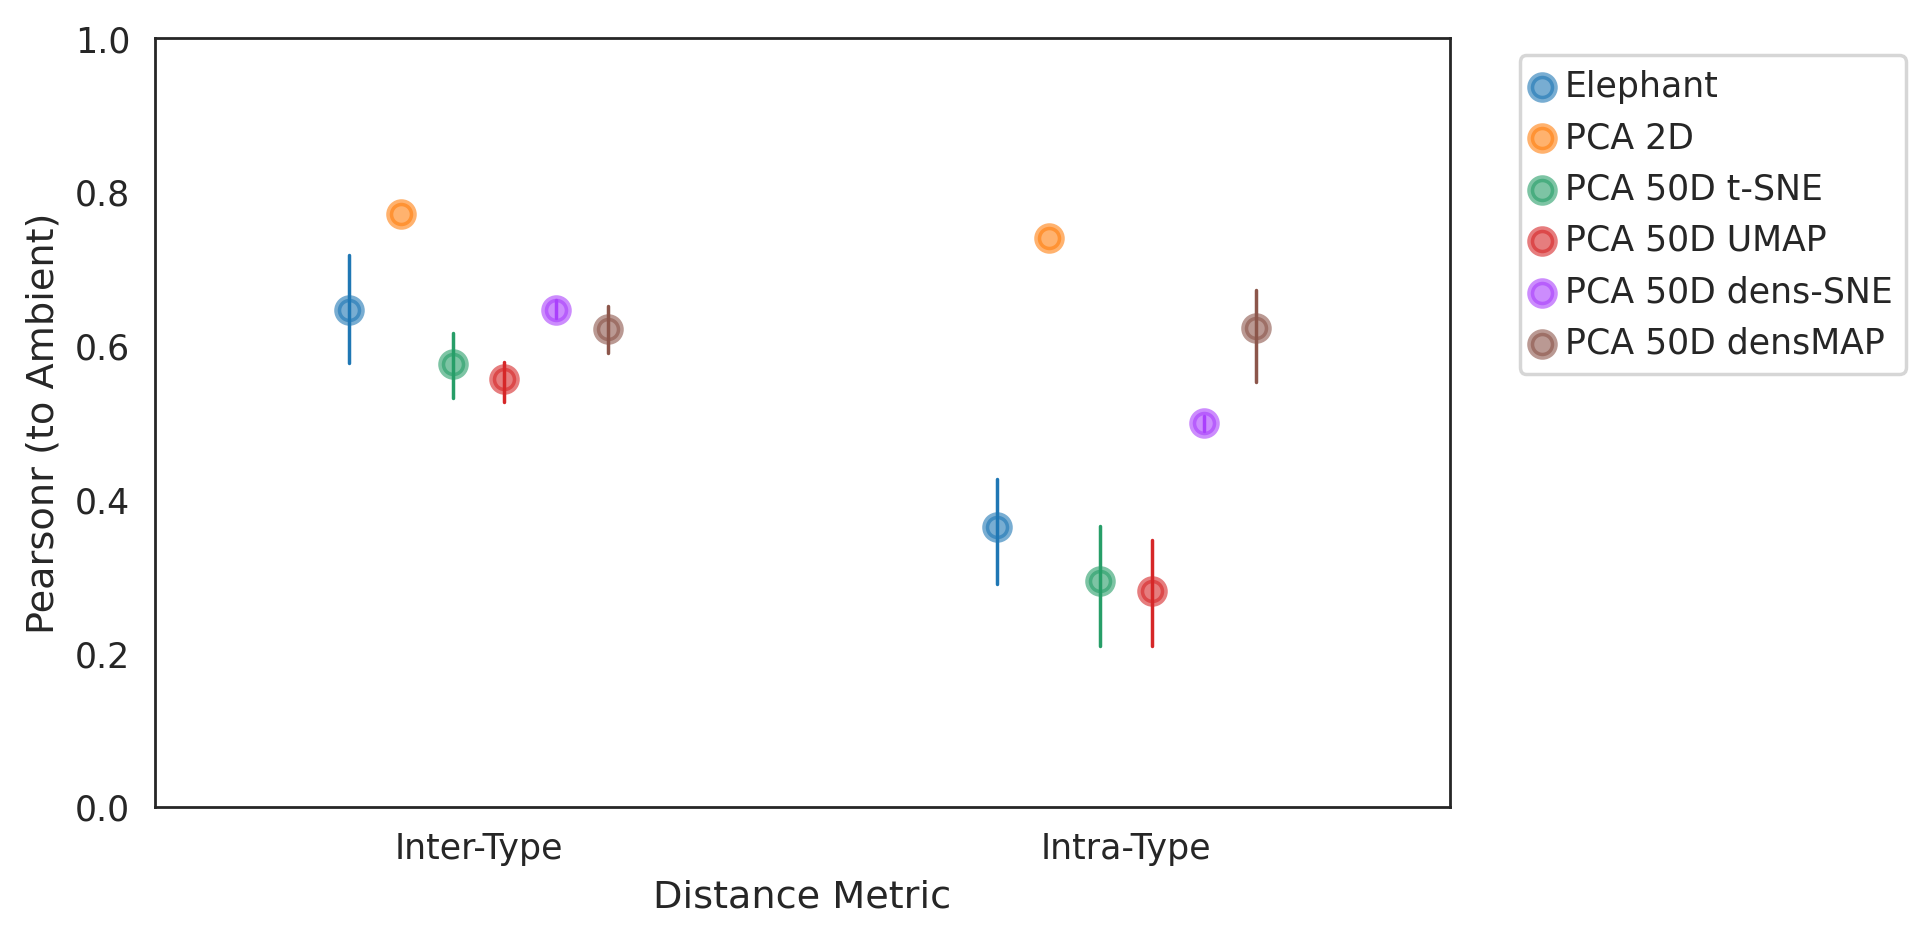

In [ ]:
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Flower','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)

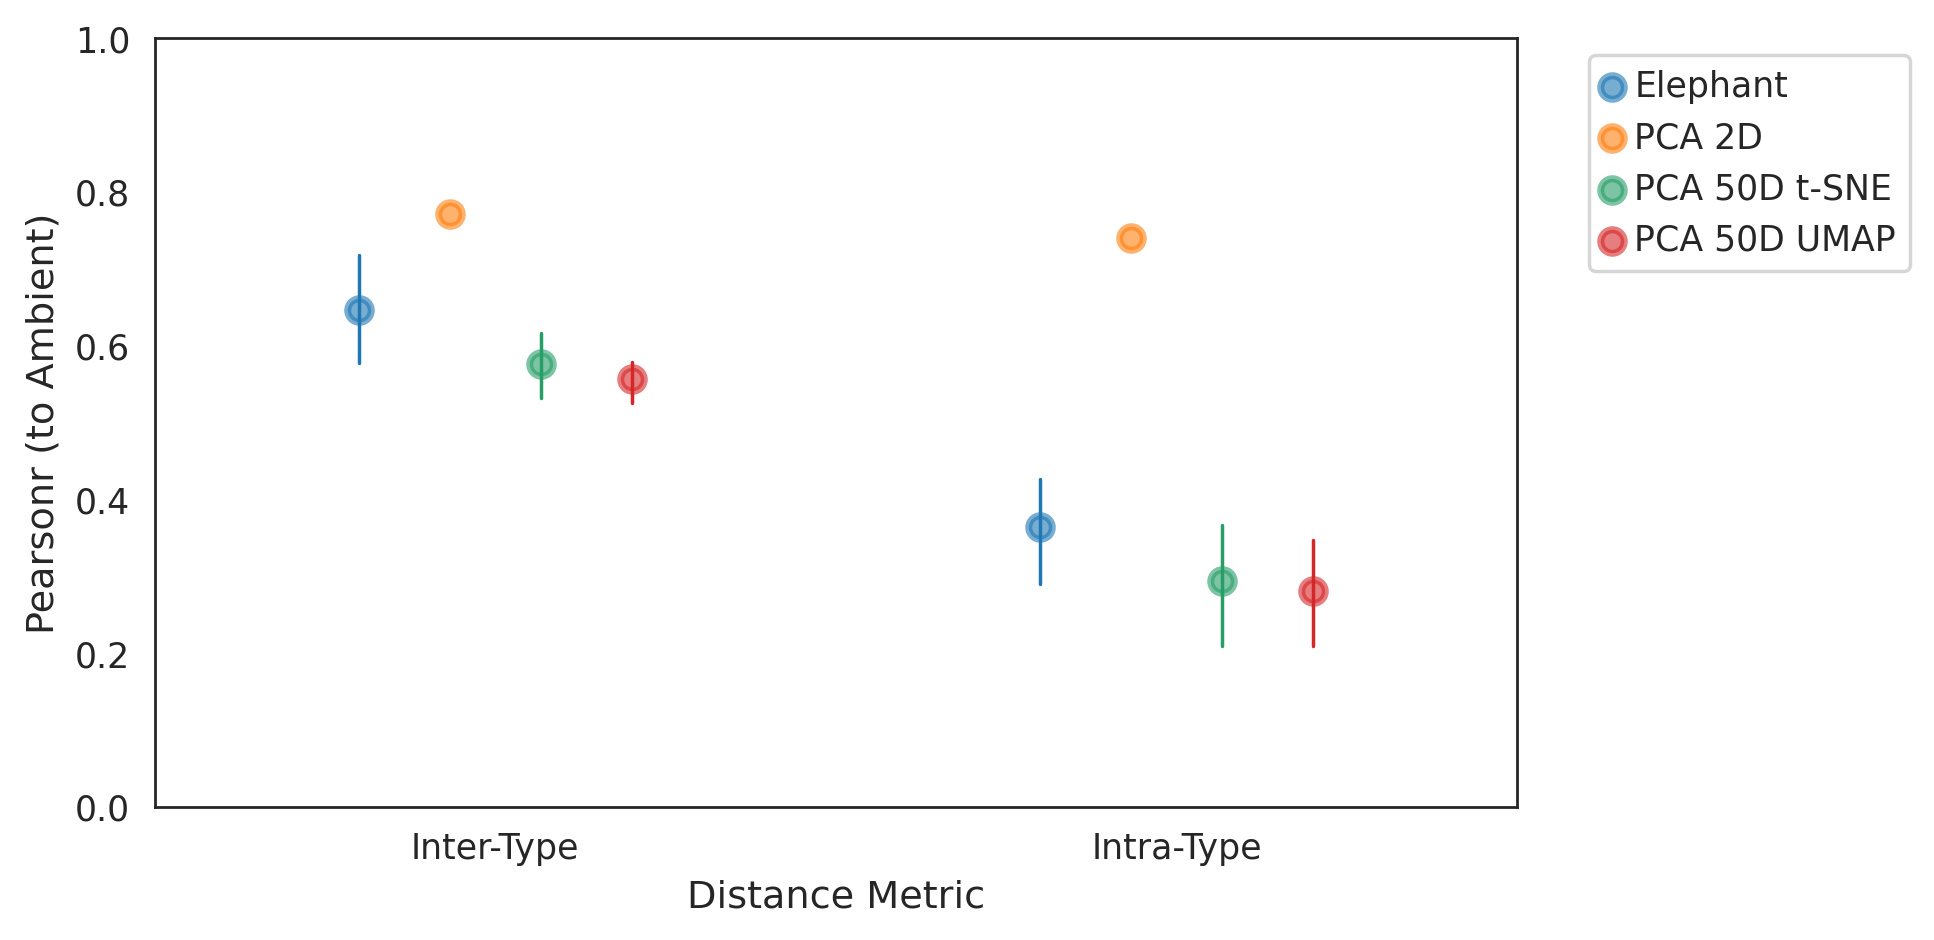

In [ ]:
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Flower','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)

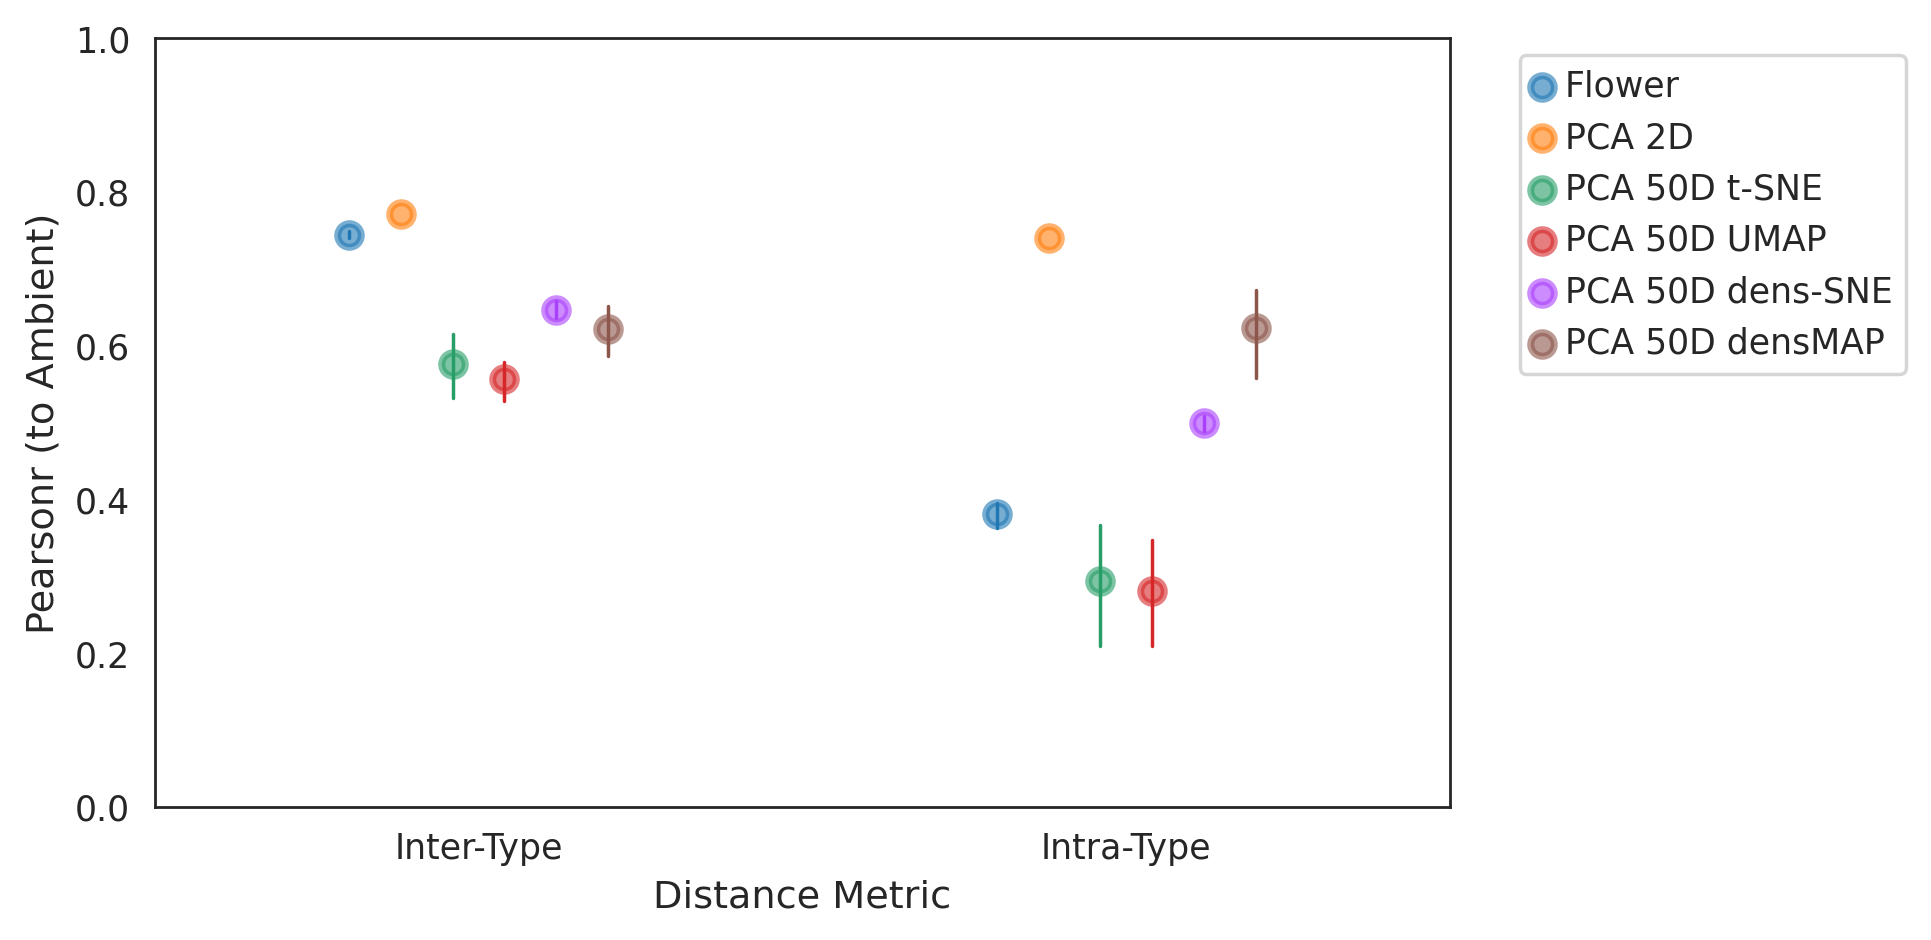

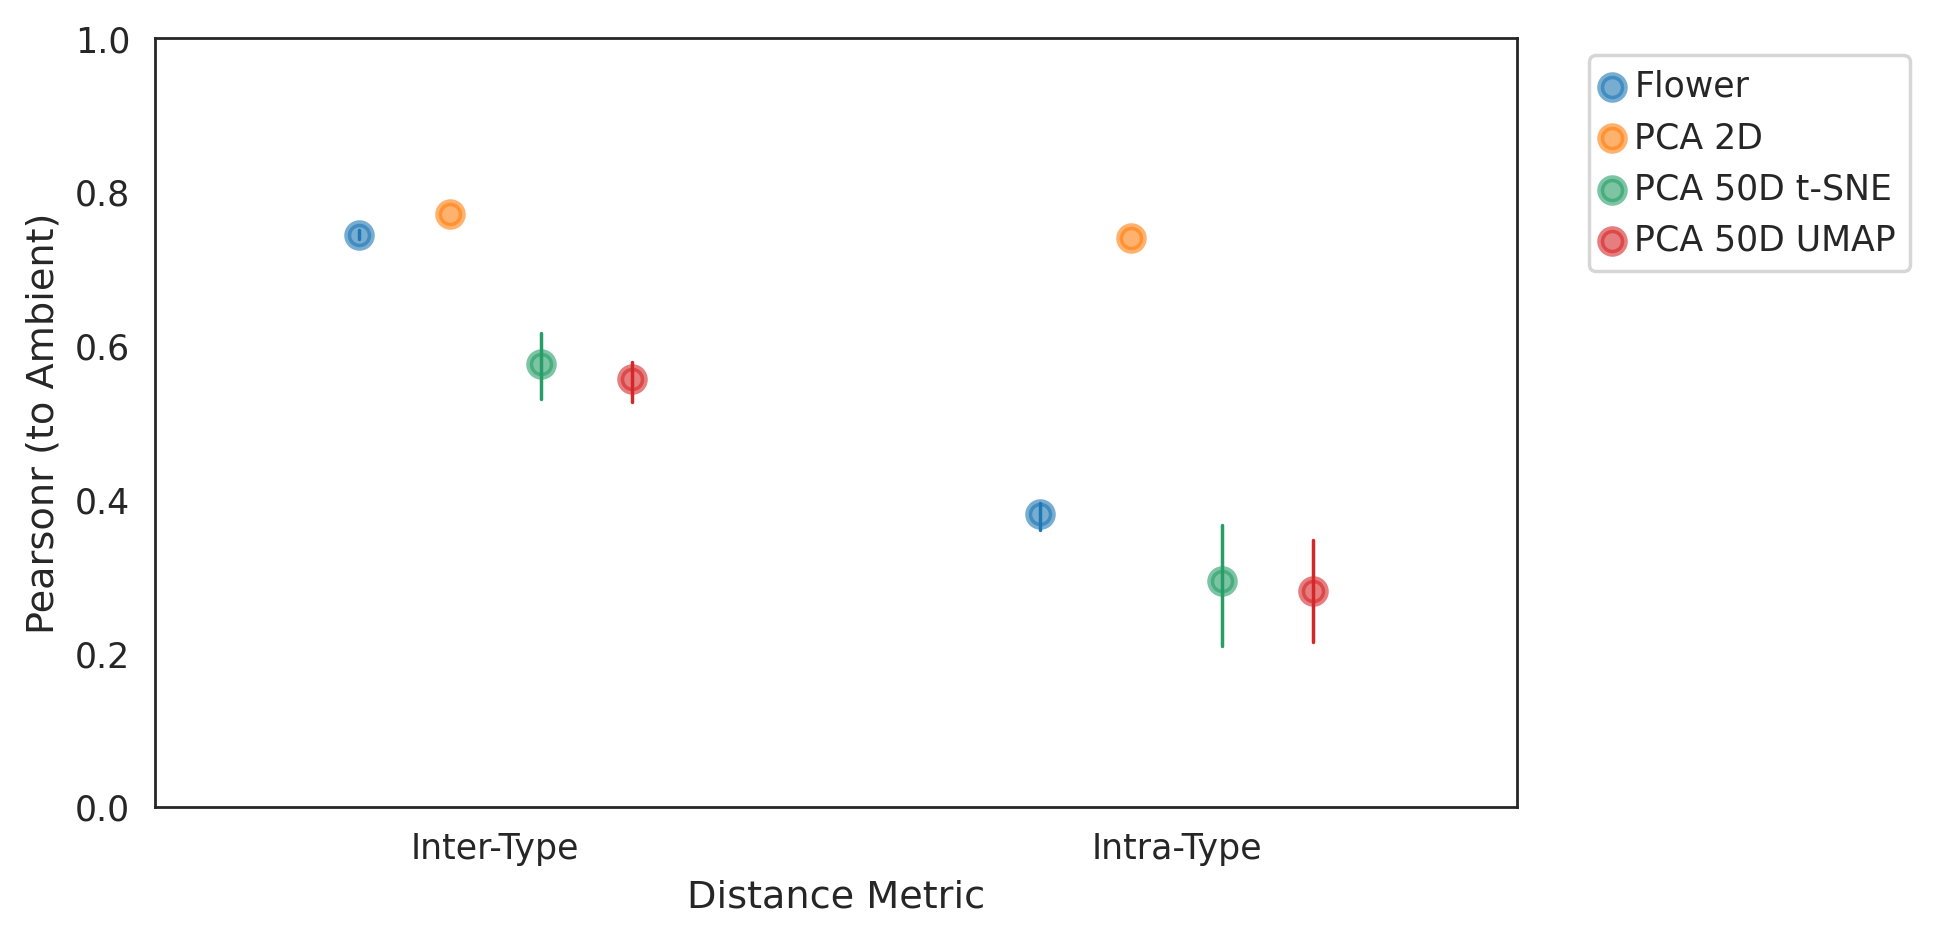

In [ ]:
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)

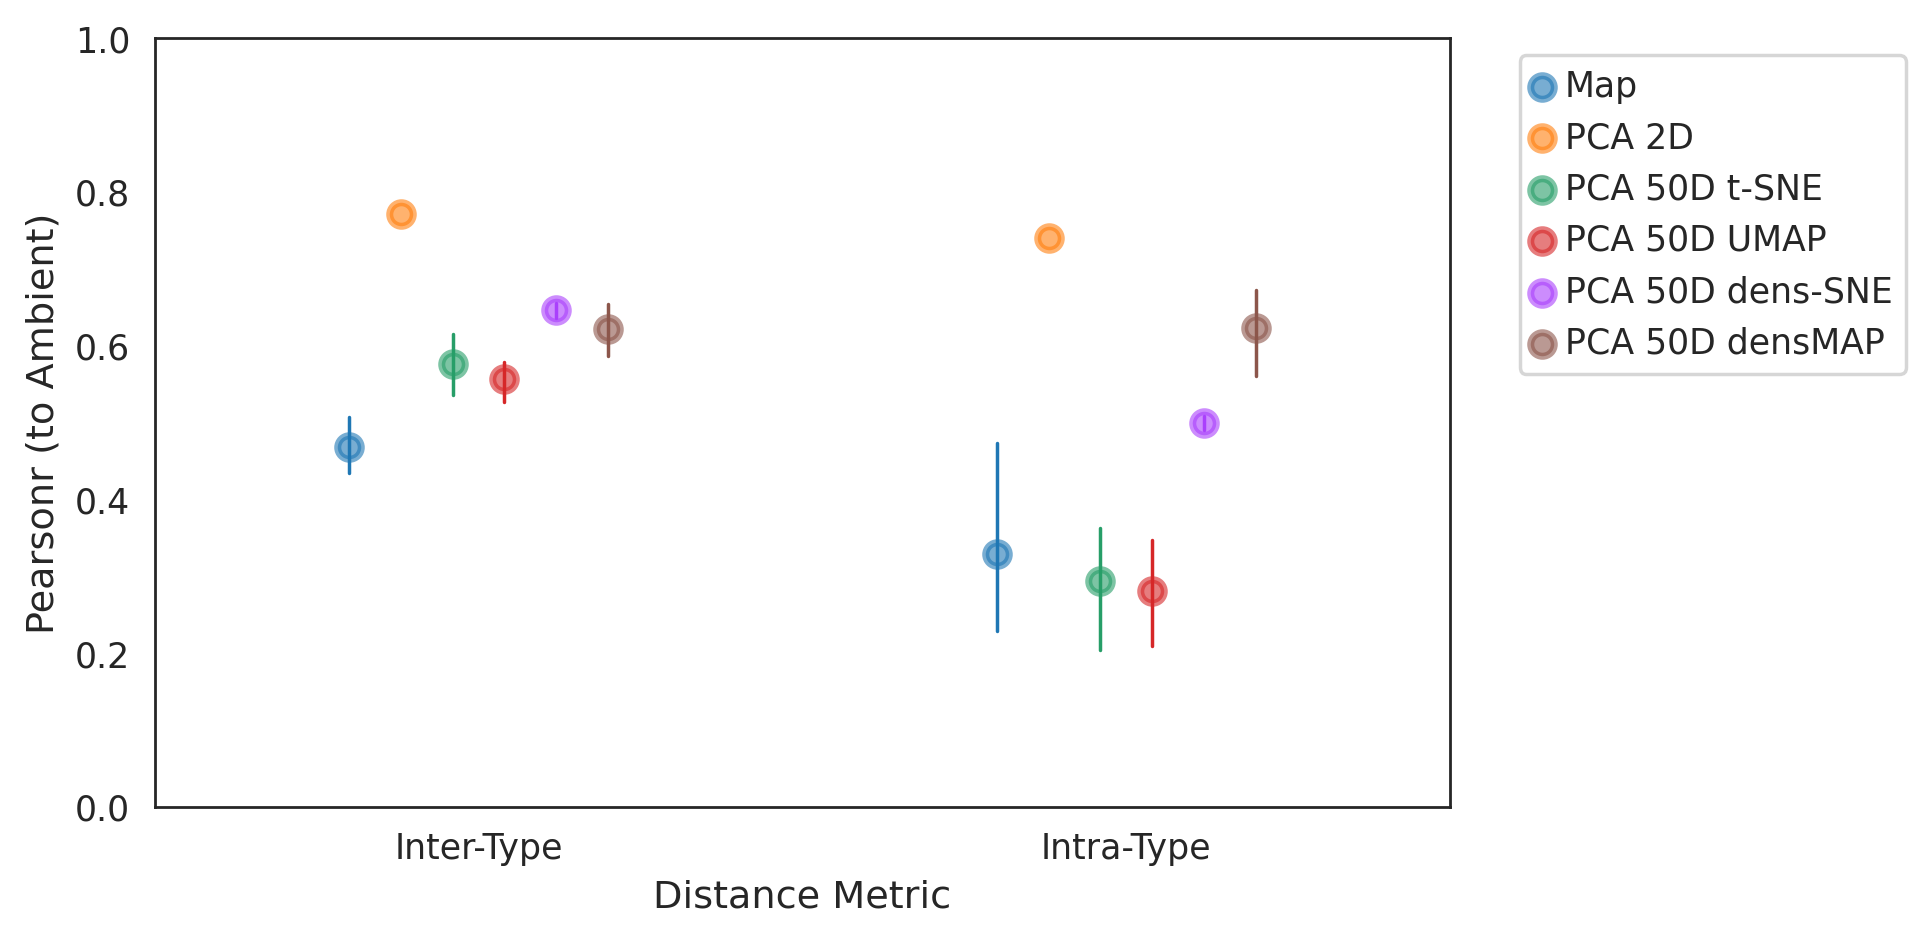

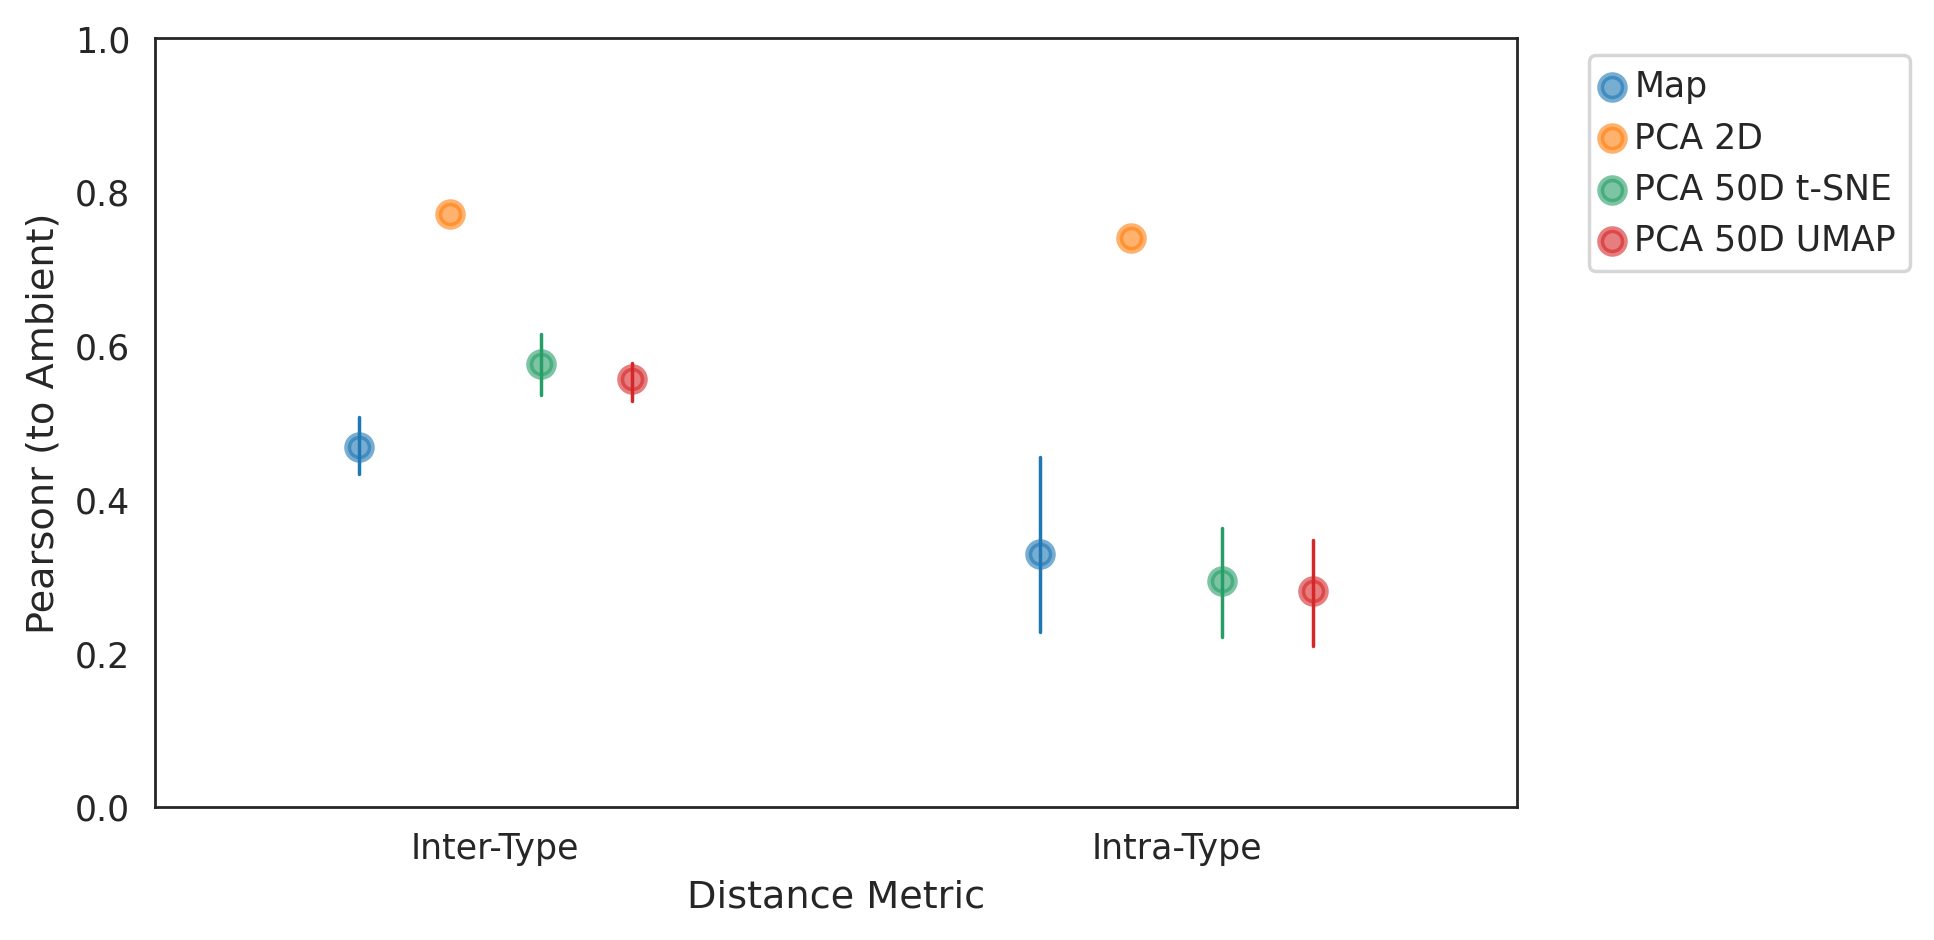

In [ ]:
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Flower','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Flower','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)

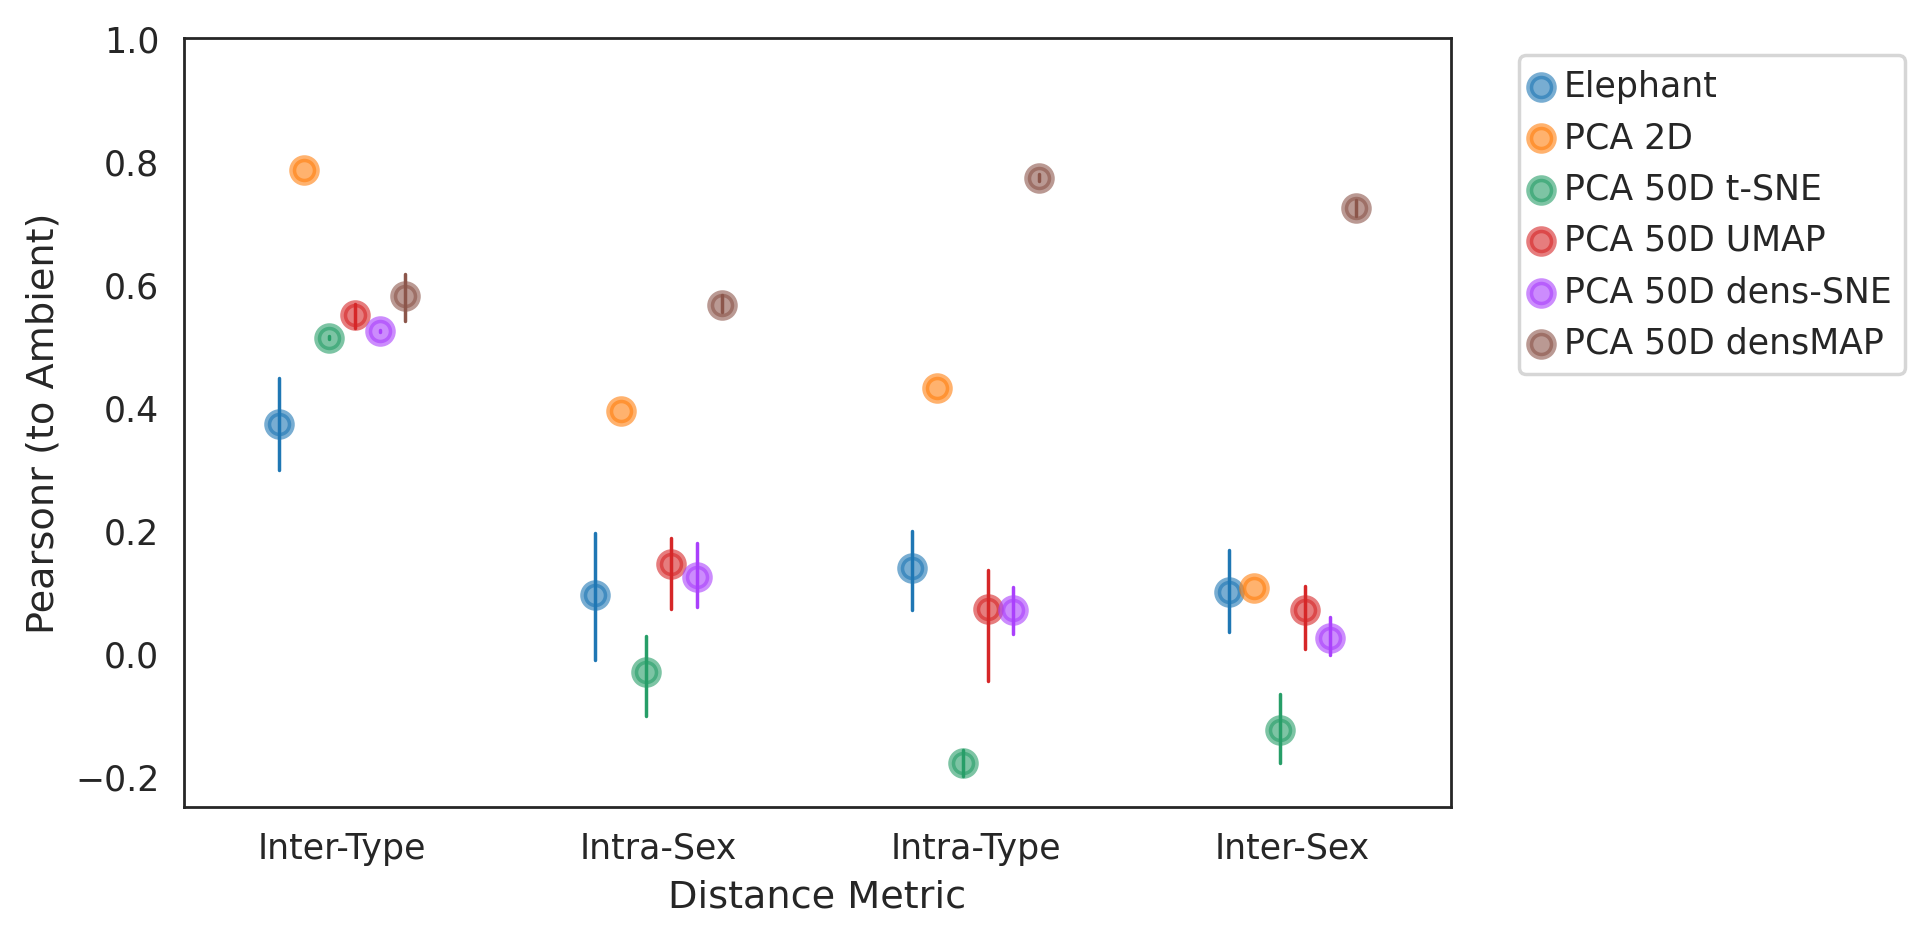

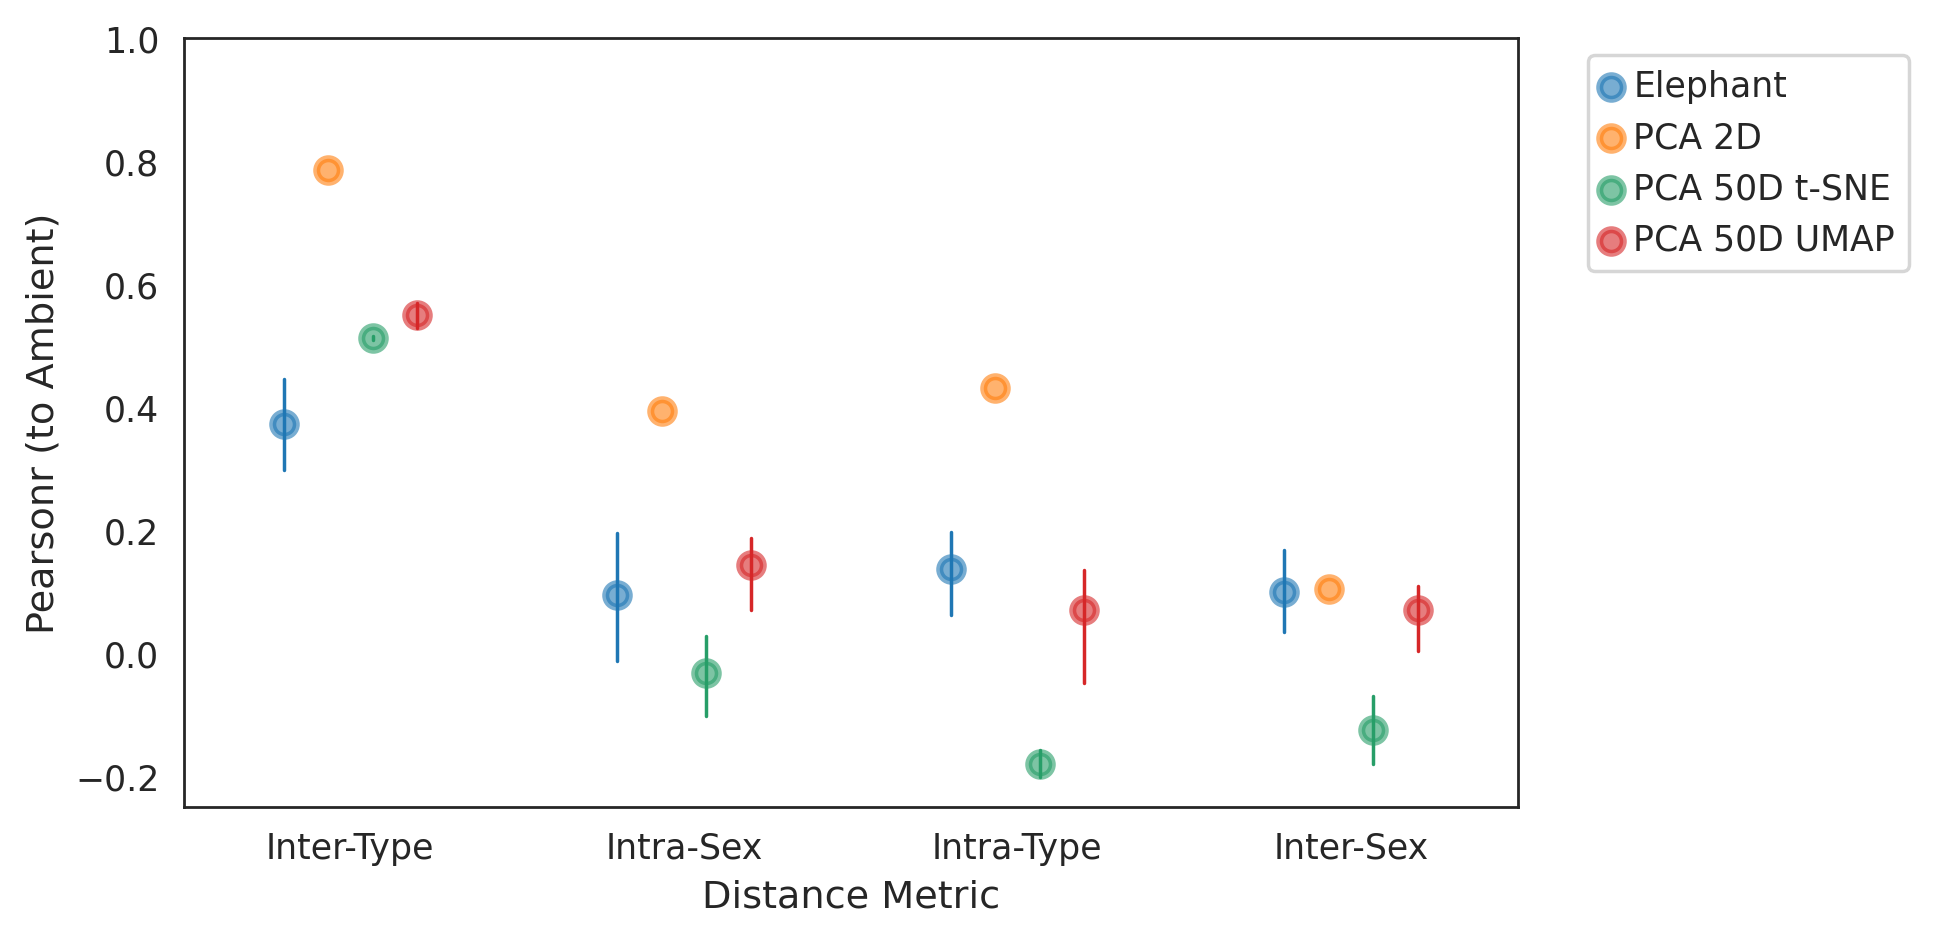

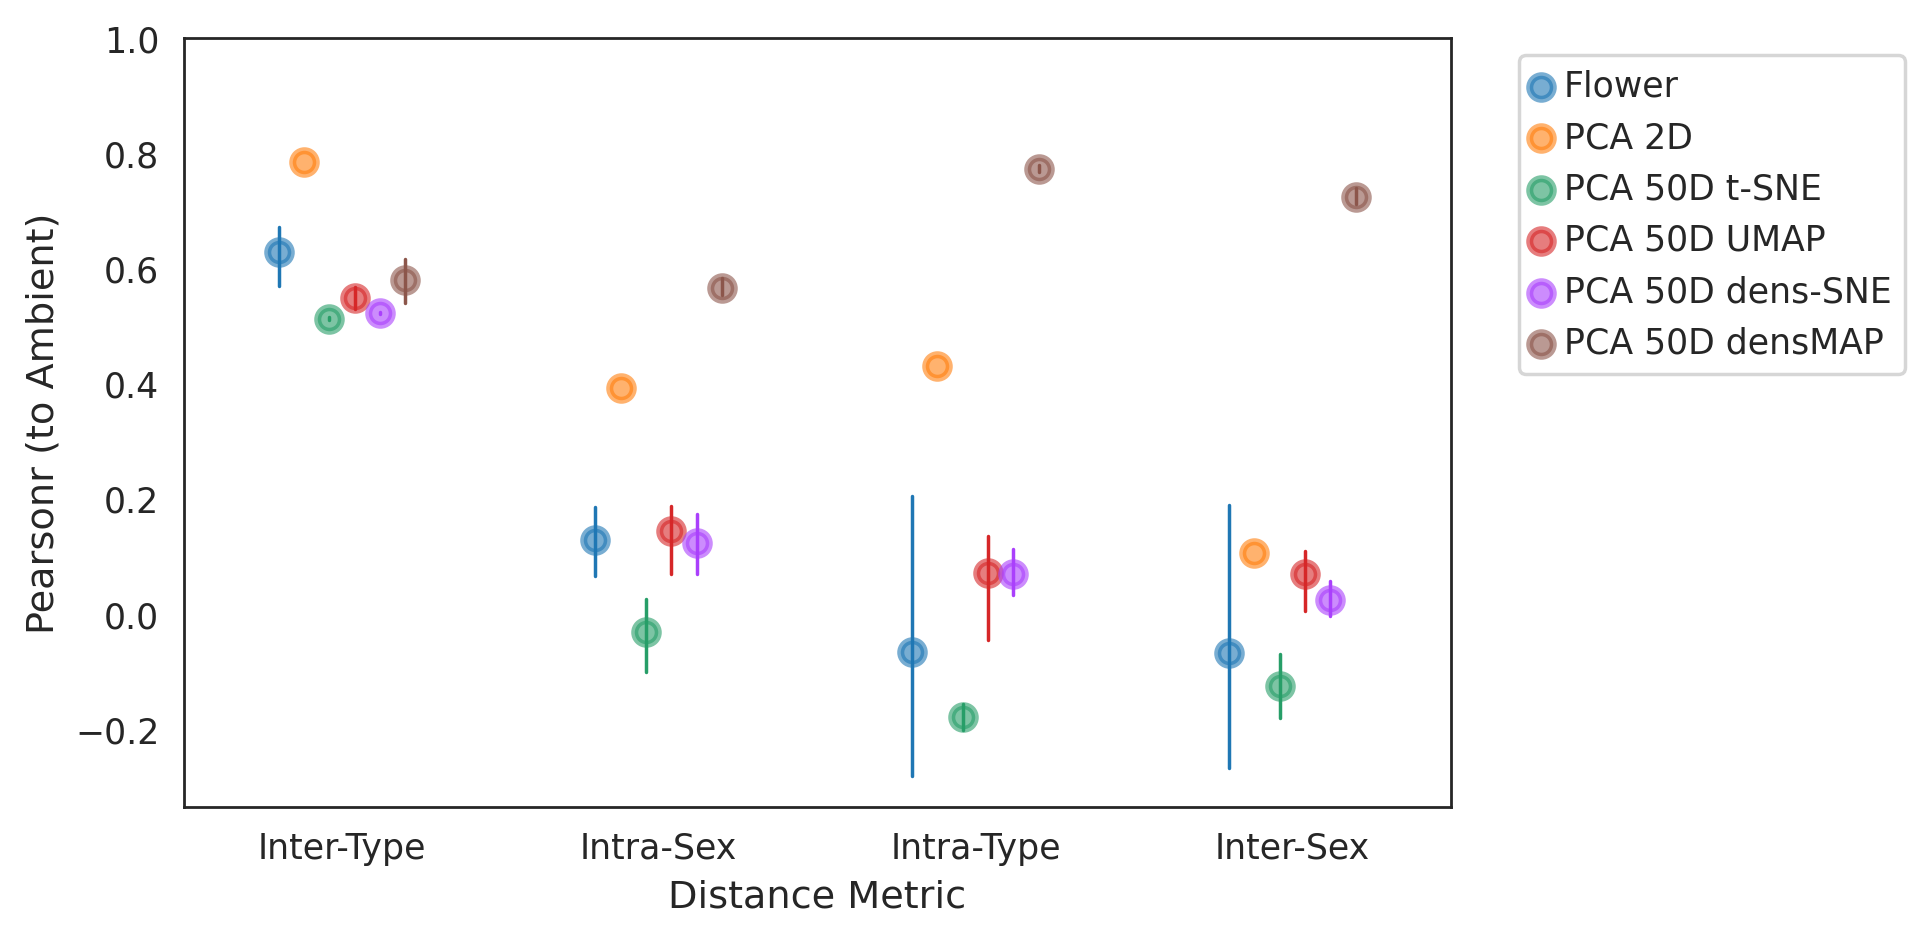

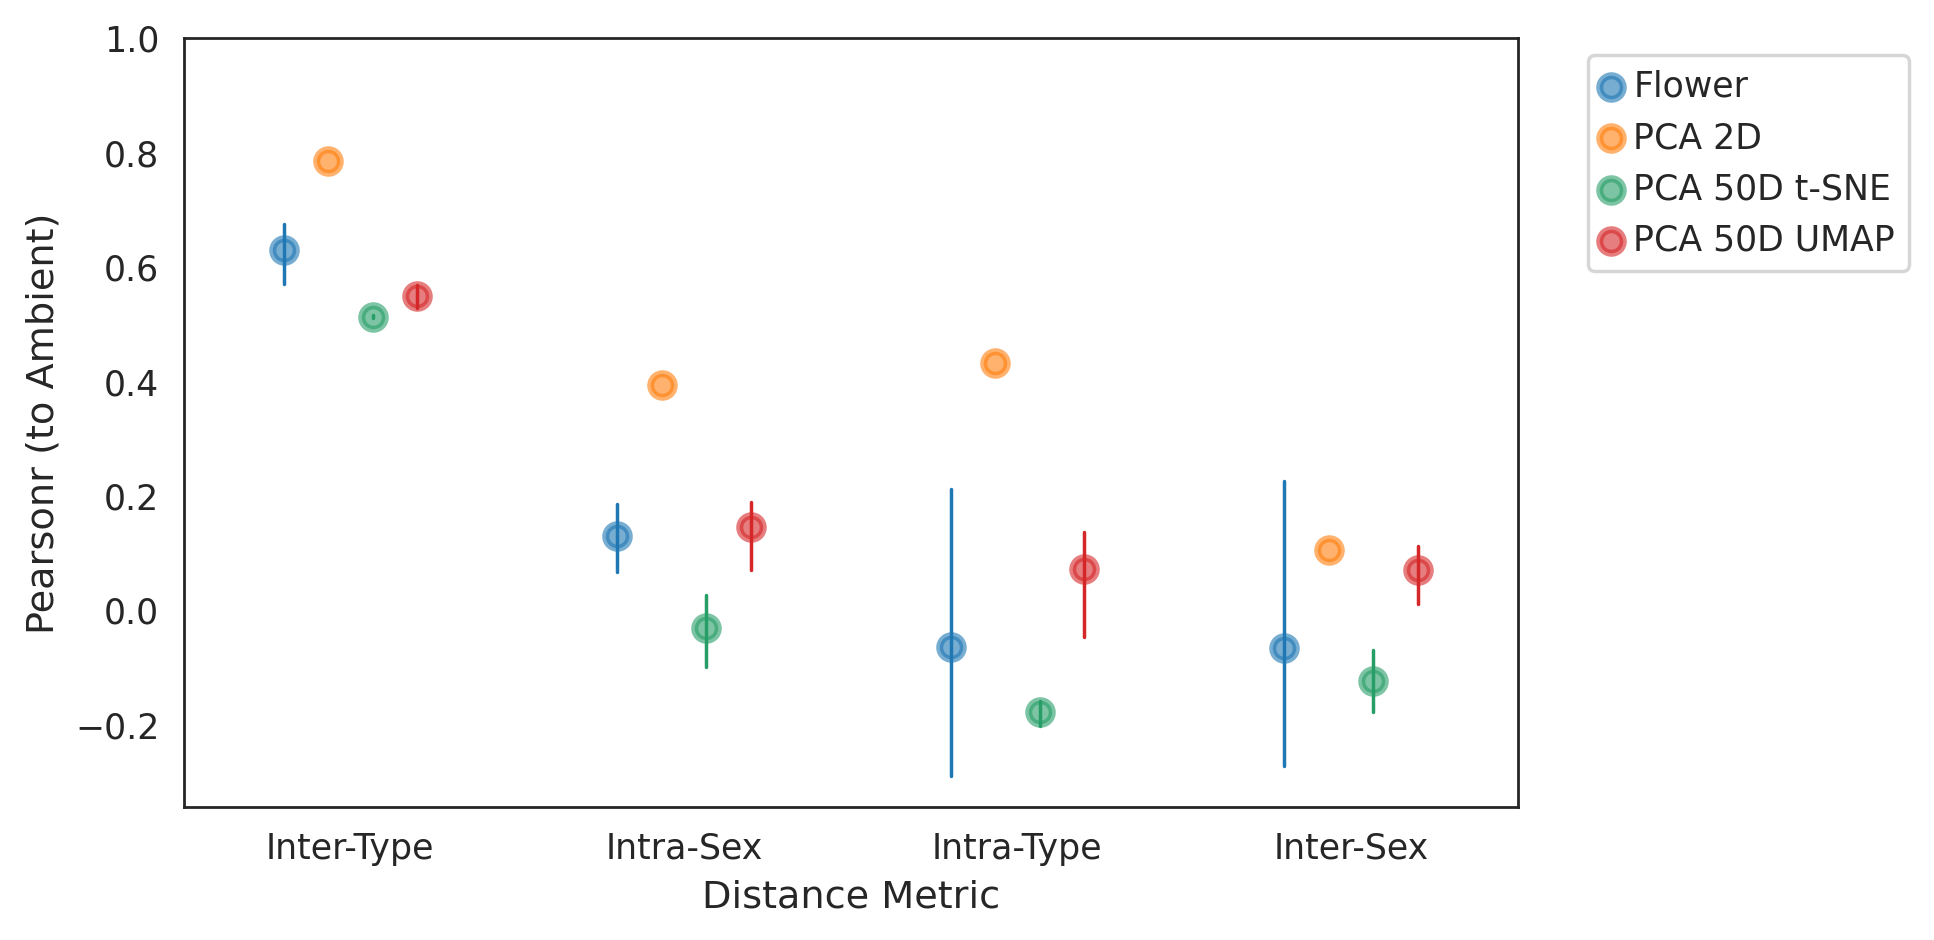

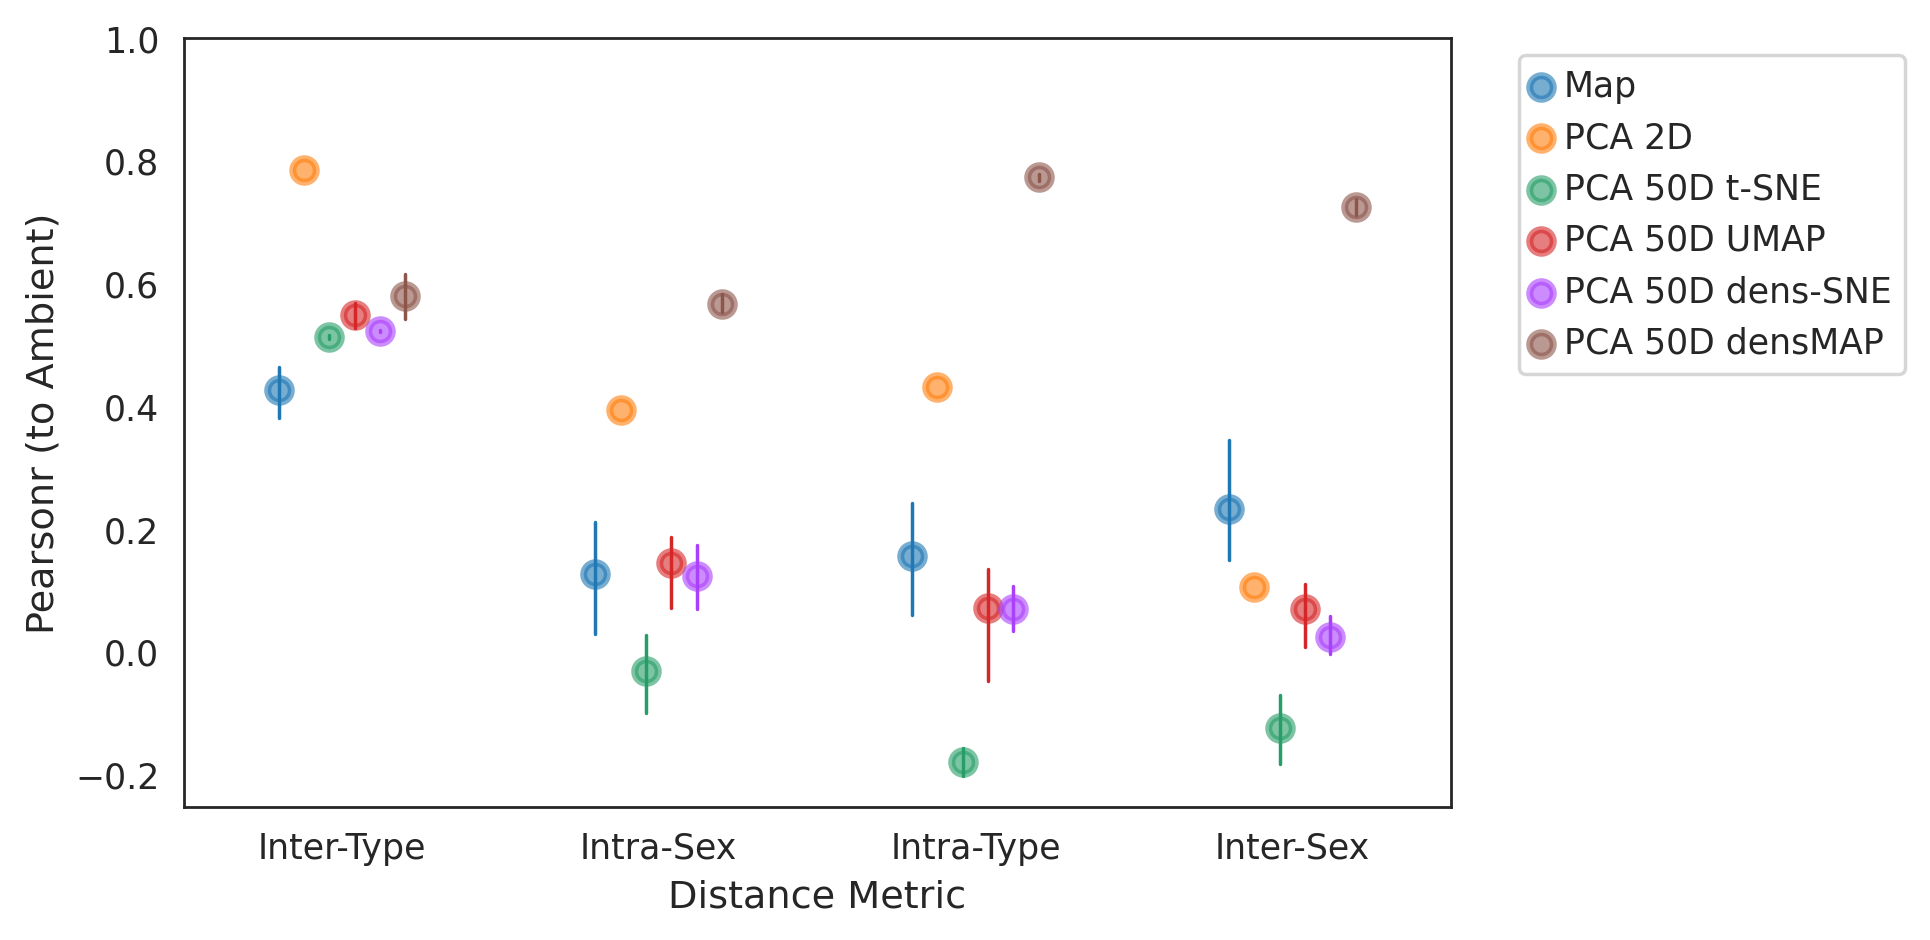

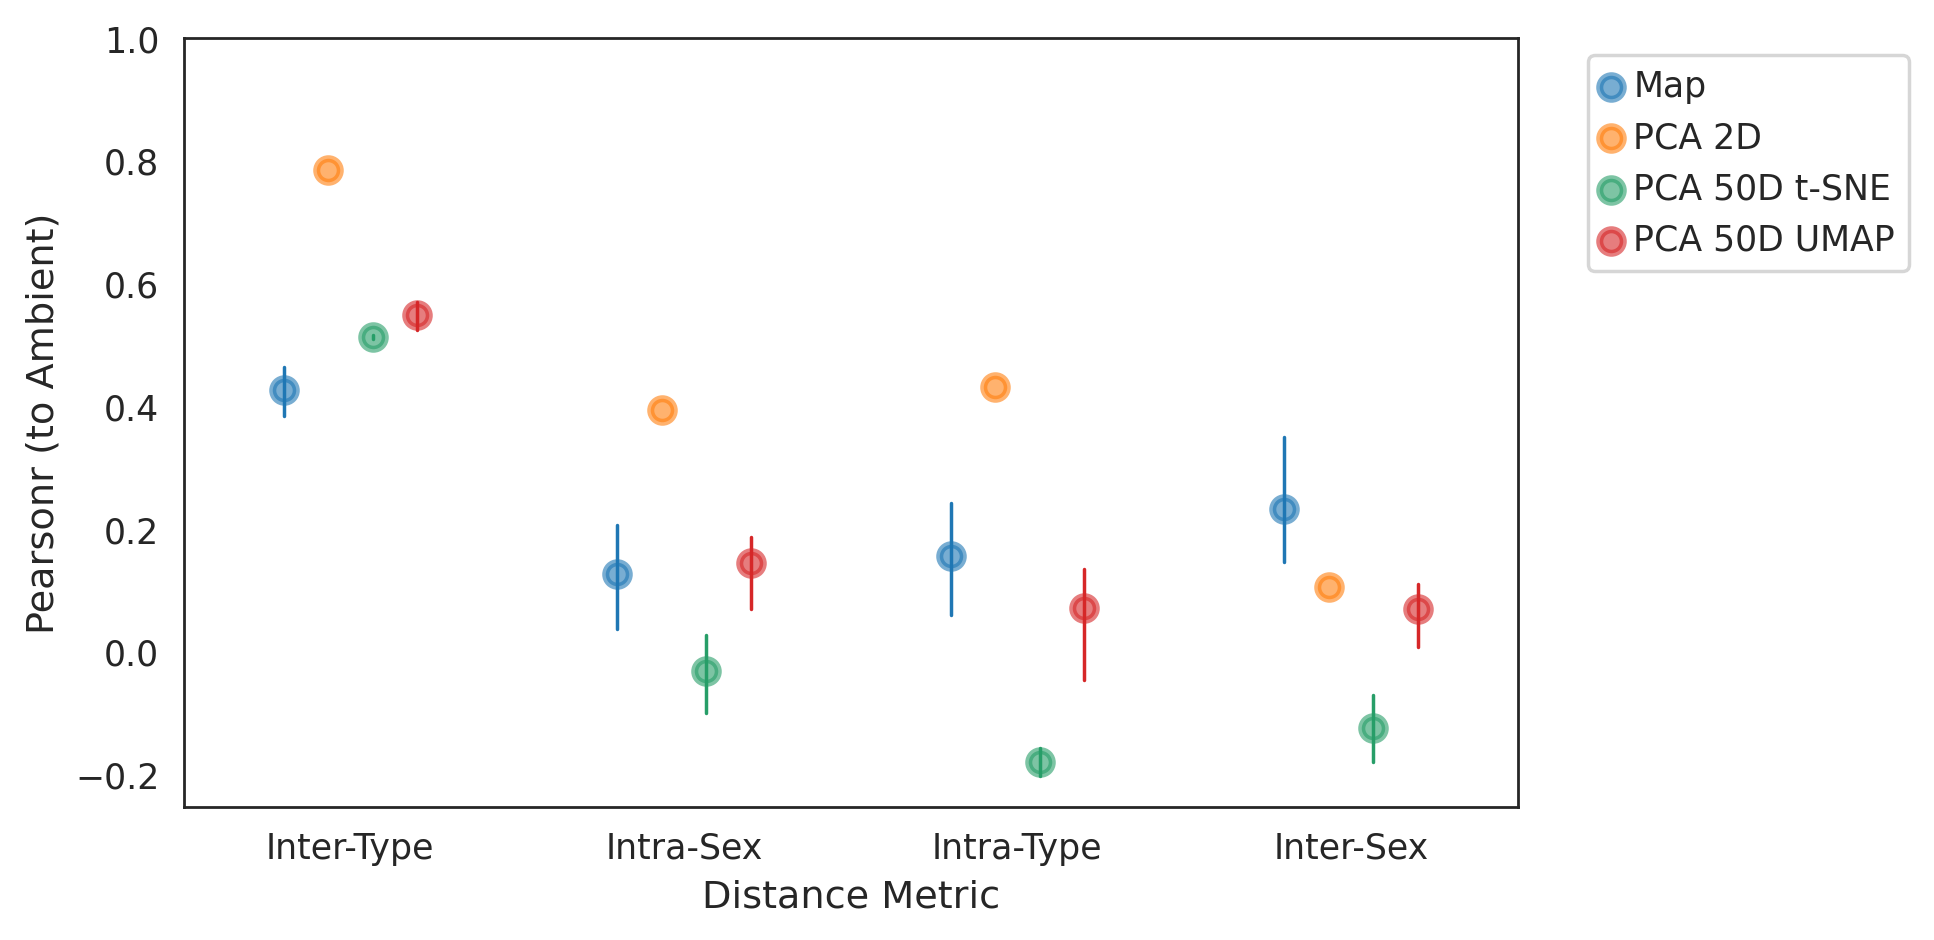

In [ ]:
#smartseq
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Flower','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Flower','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Flower','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Flower','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

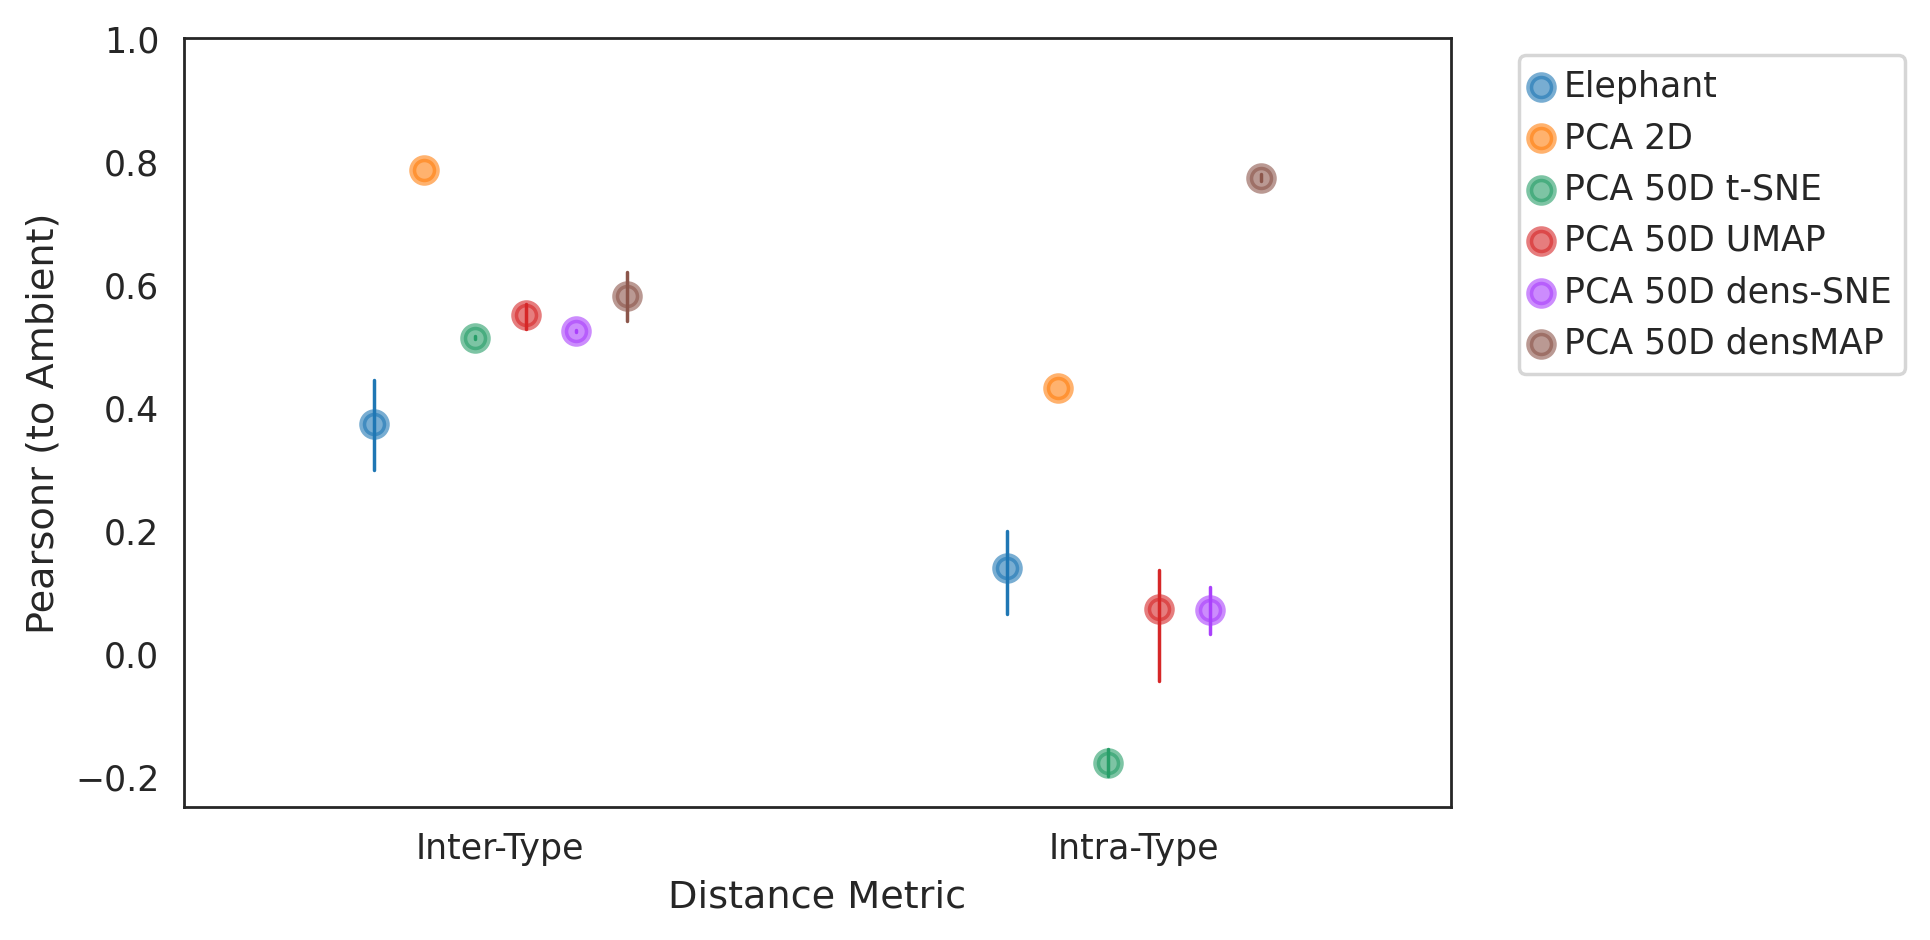

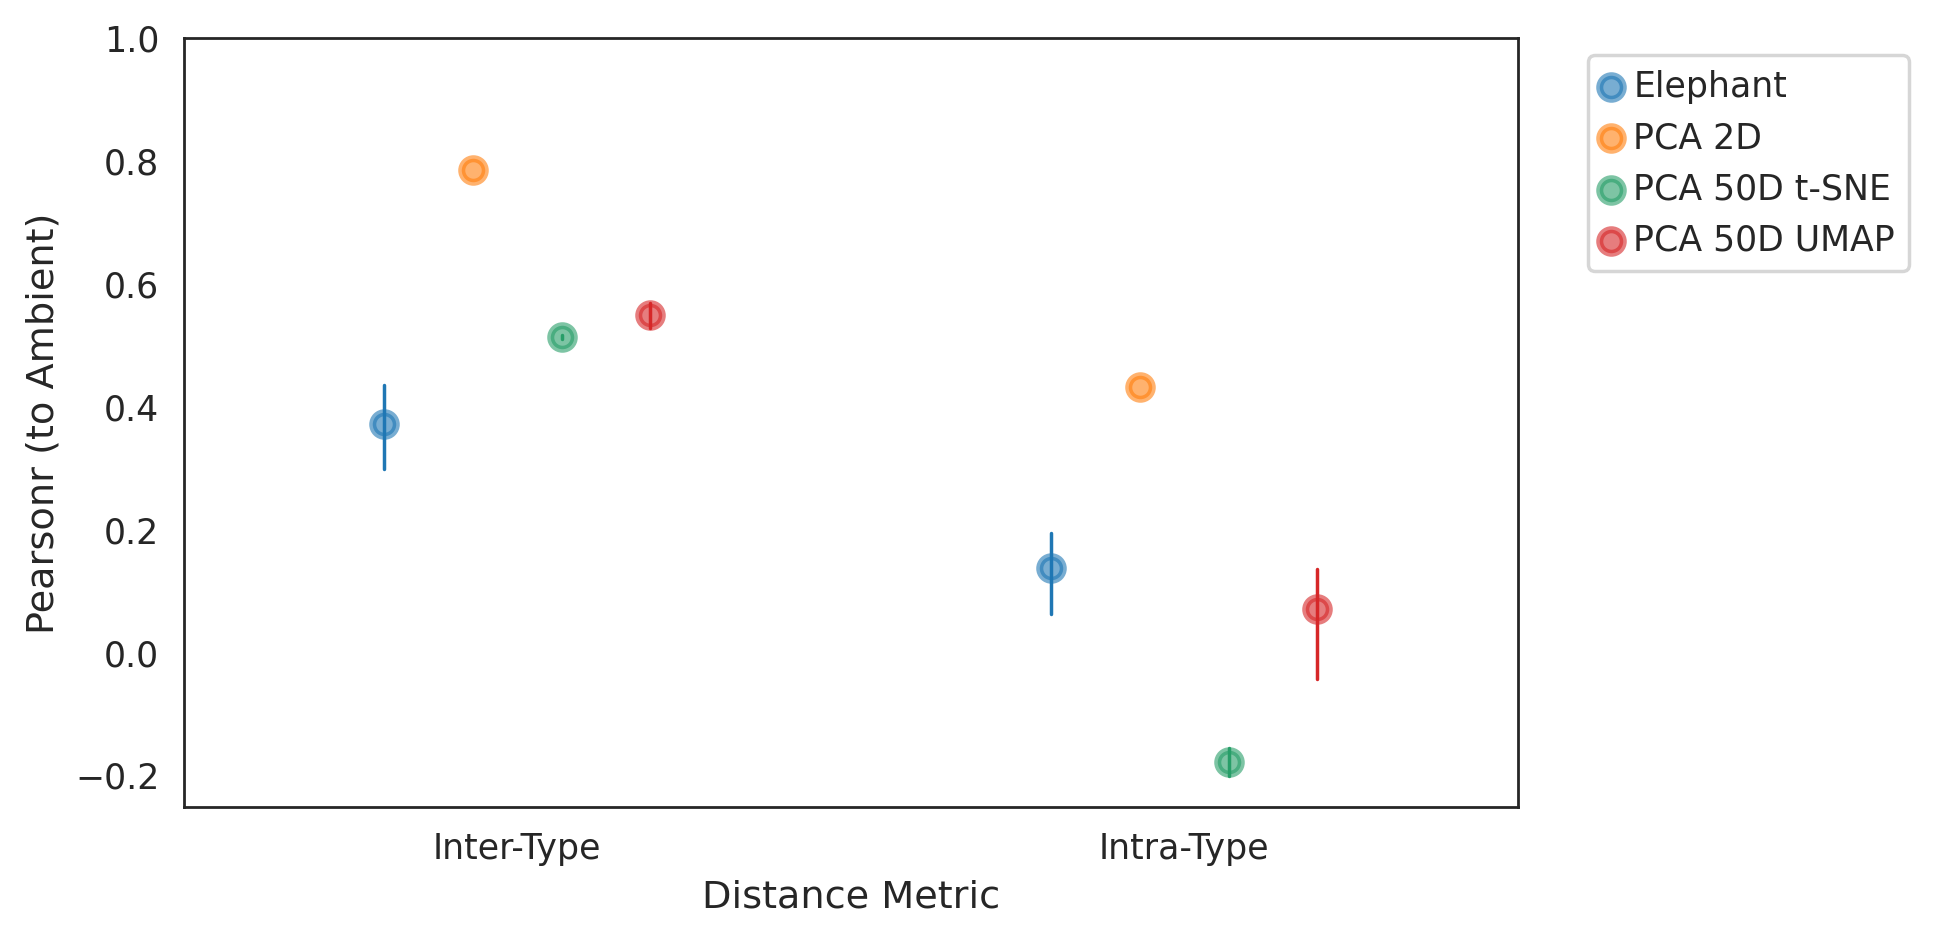

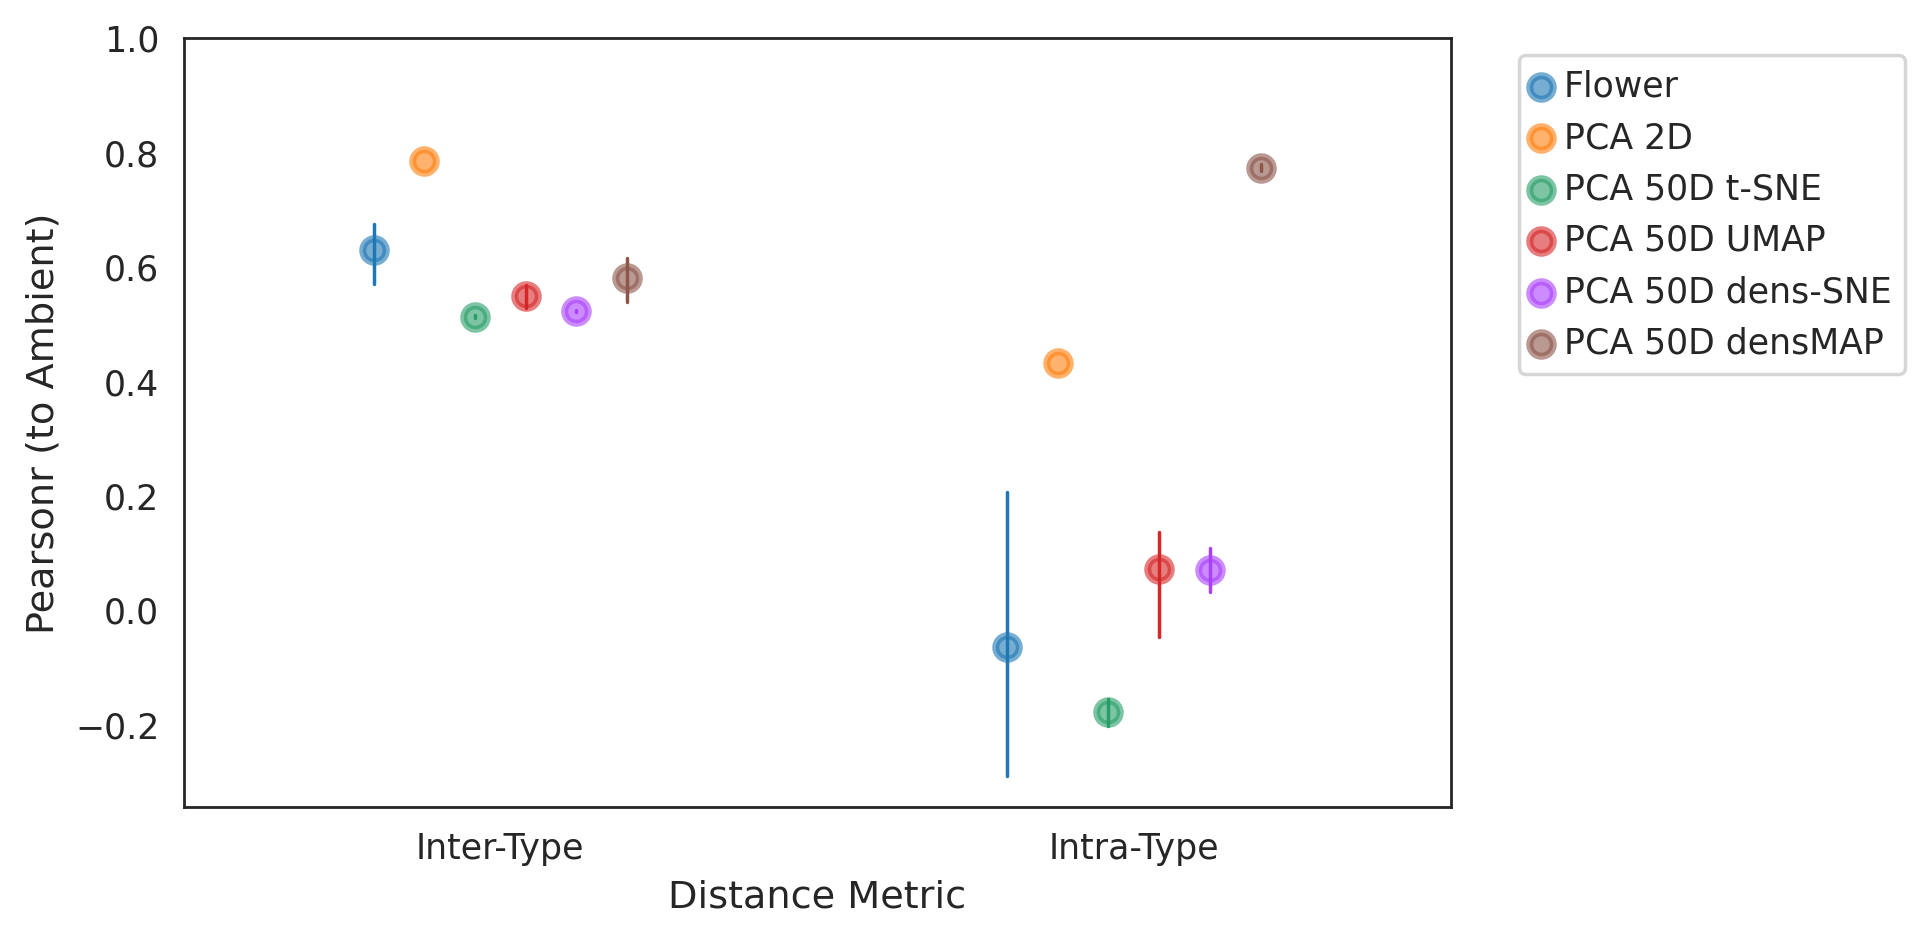

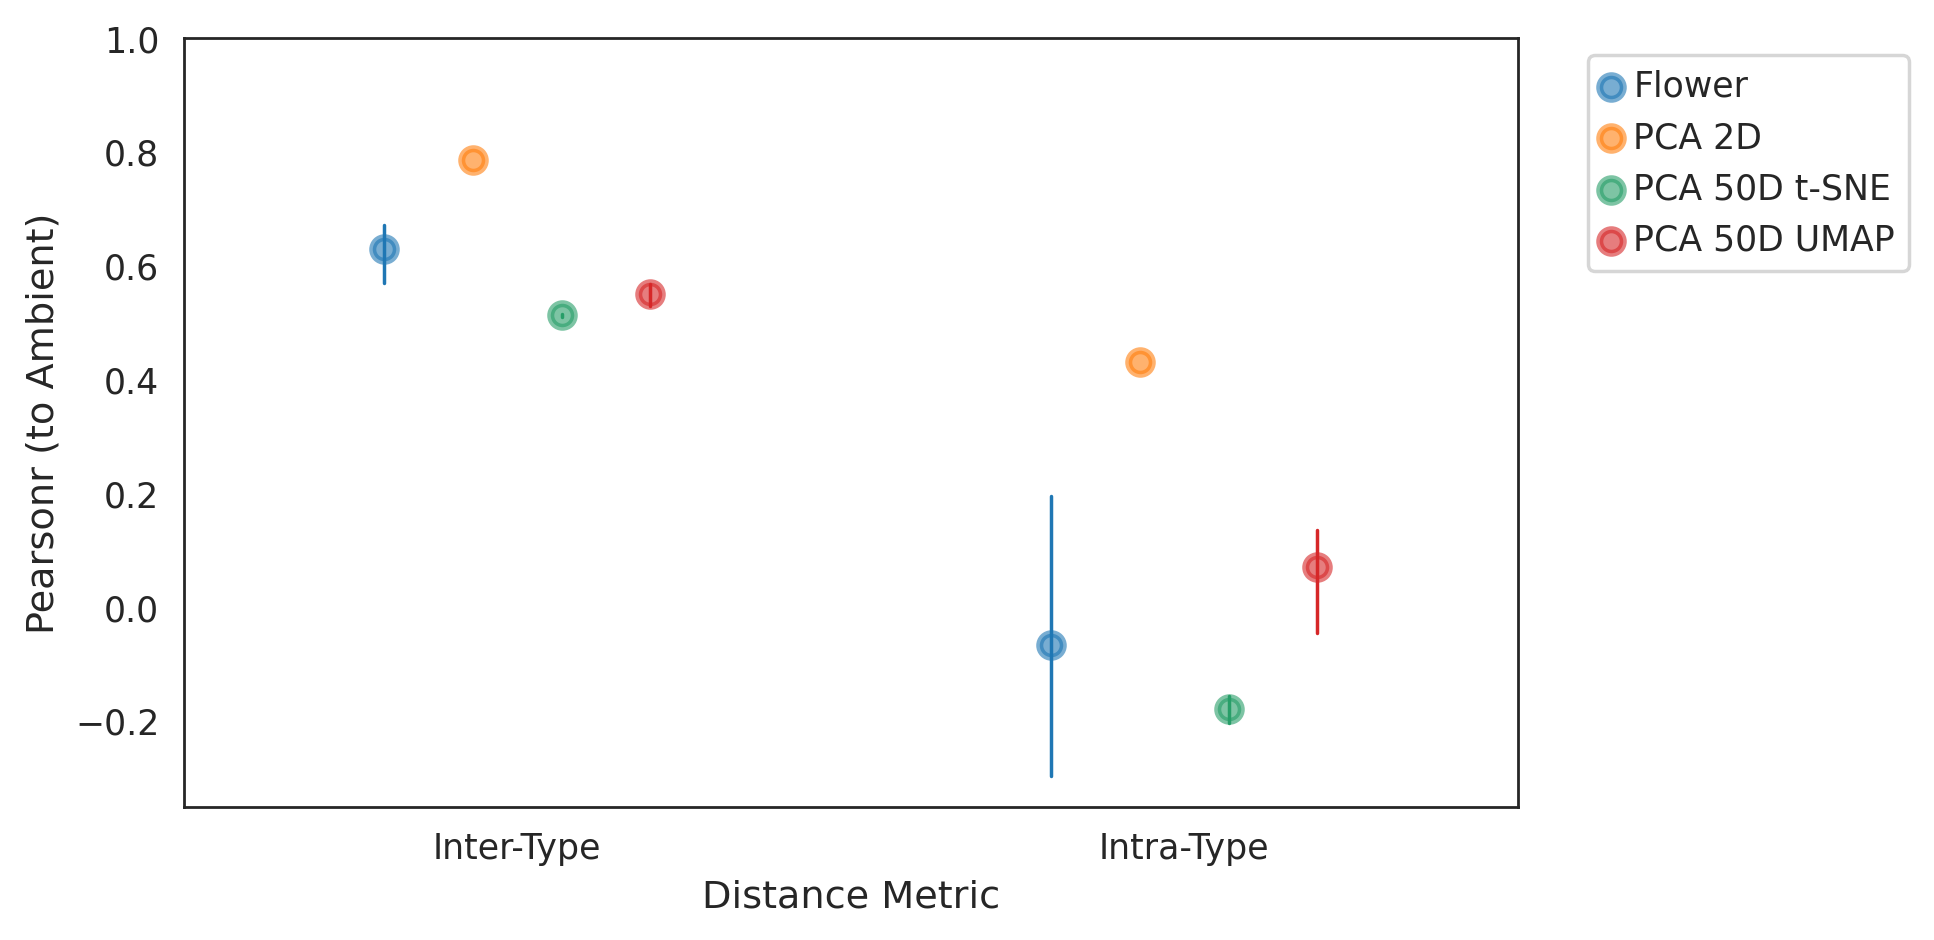

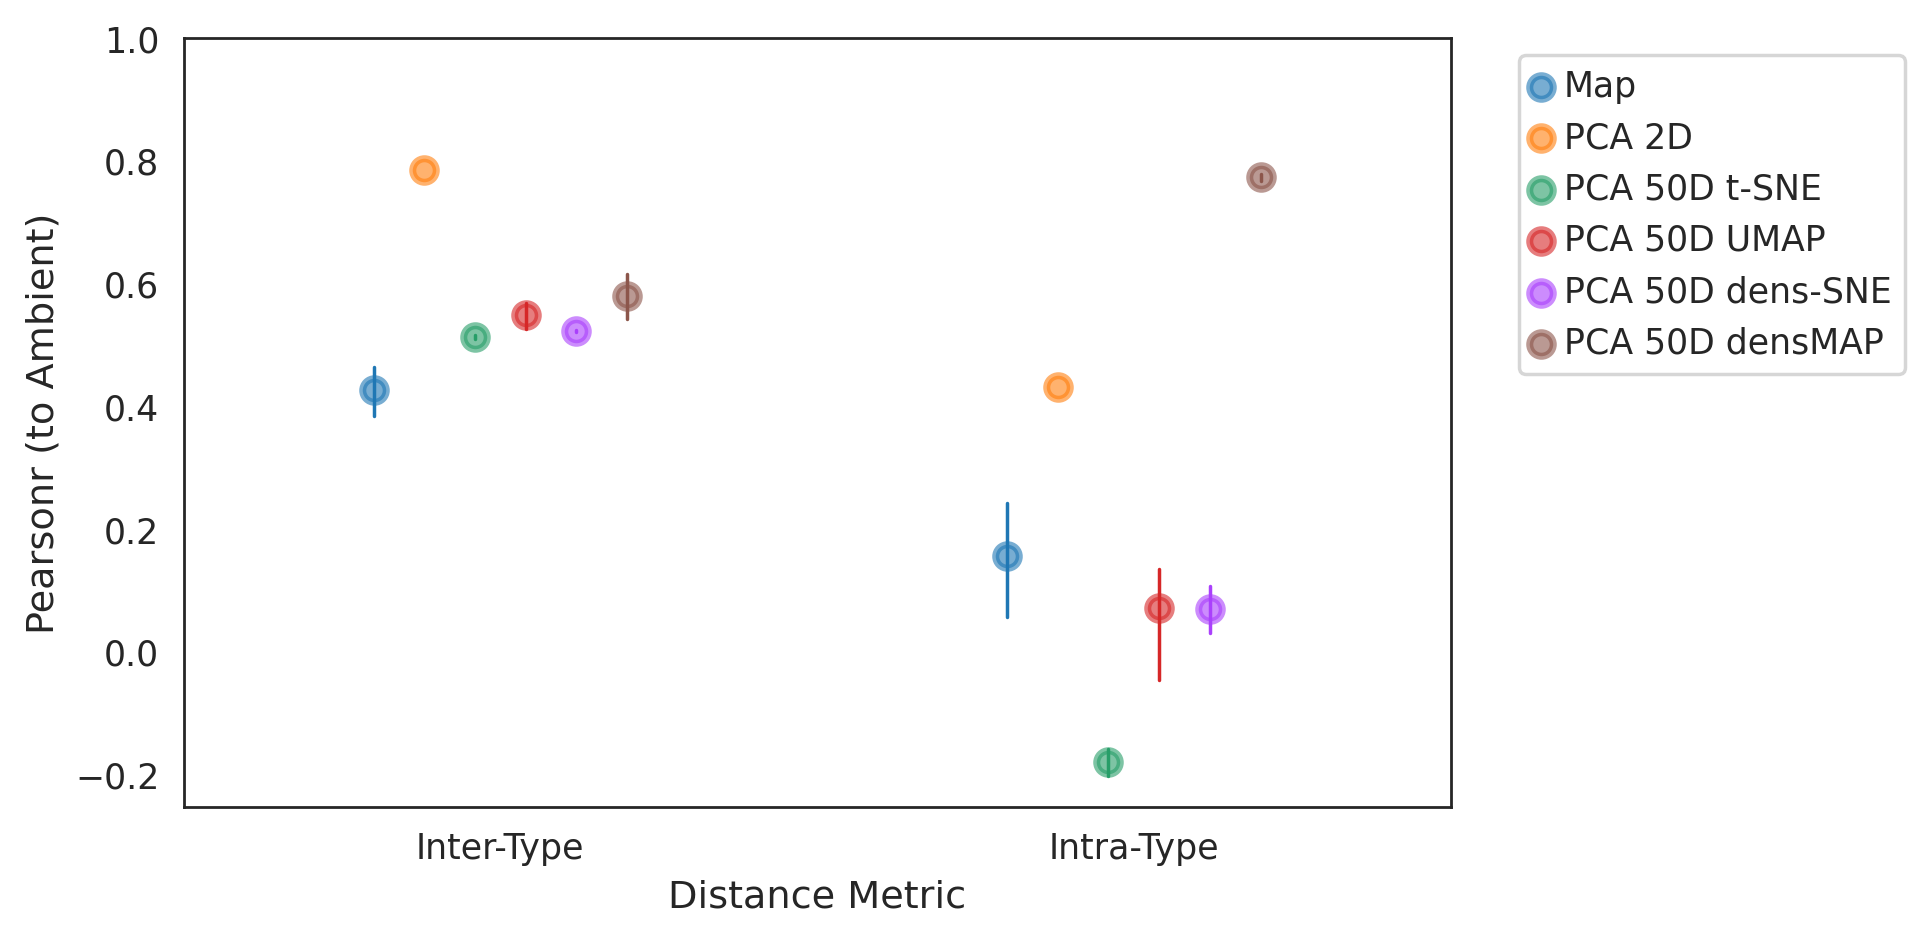

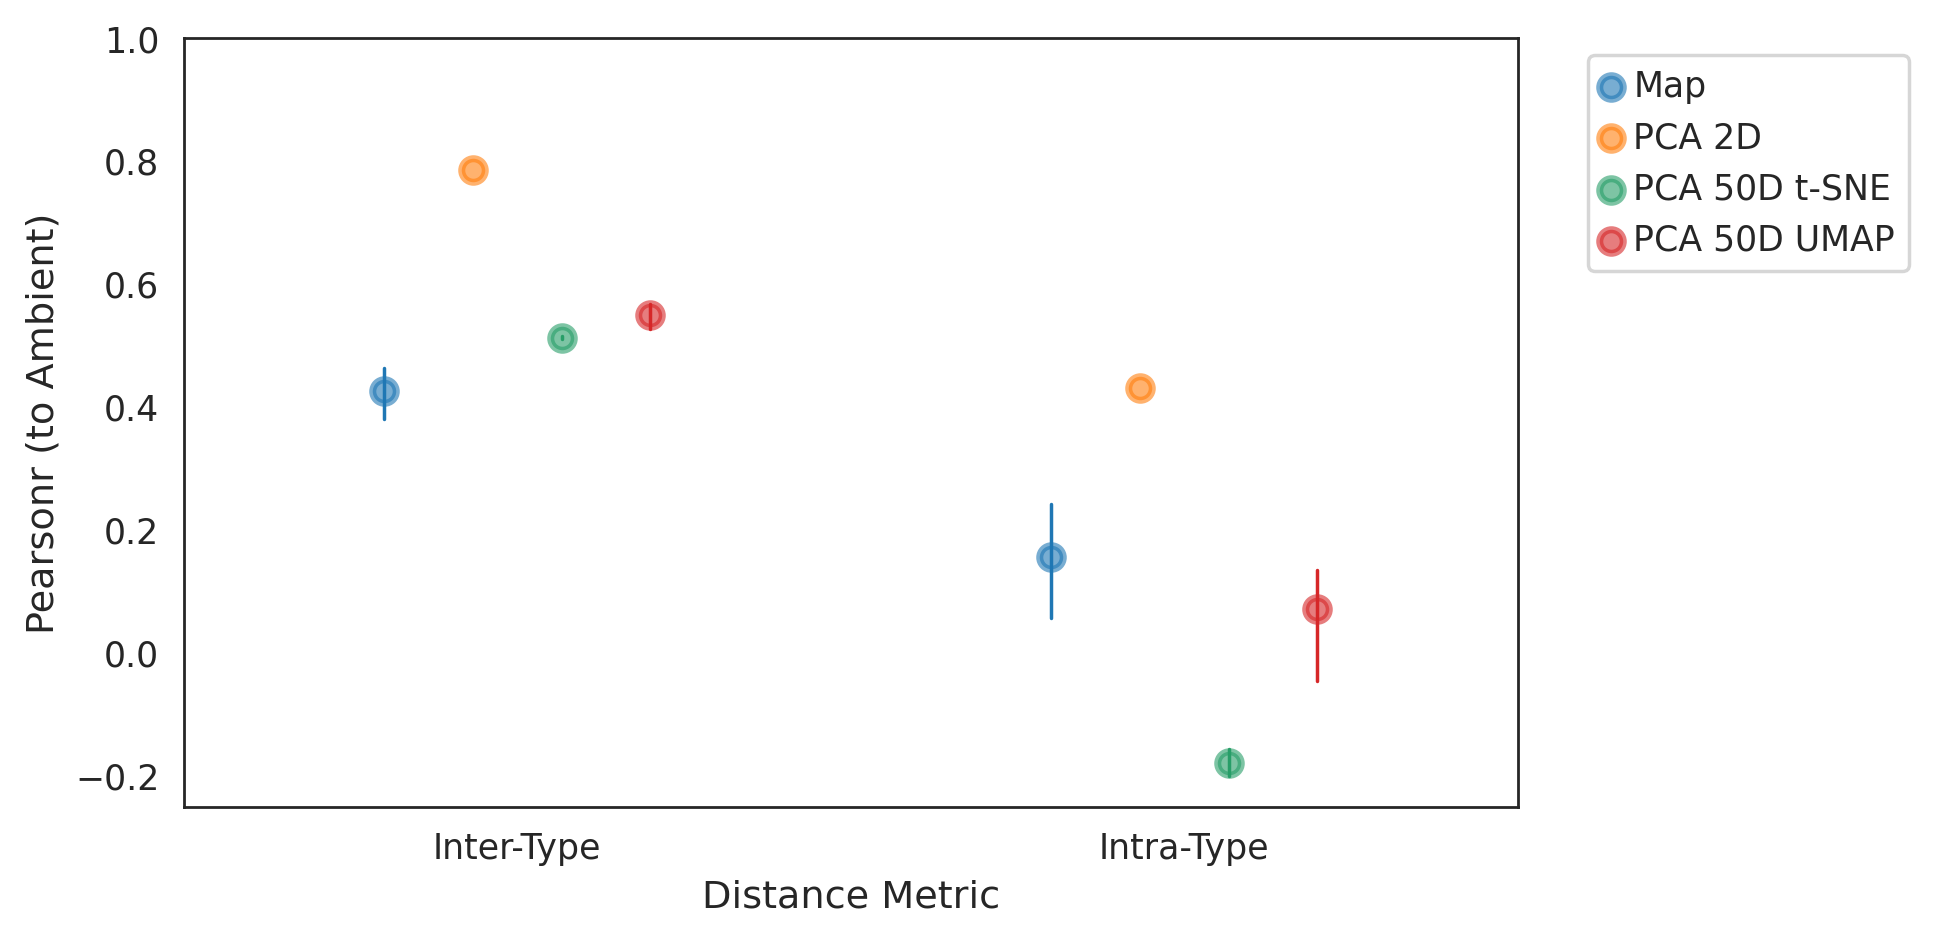

In [ ]:
#smartseq
smartCorrs = smartCorrs[~smartCorrs['Distance'].isin(['Intra-Sex','Inter-Sex'])]
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Flower','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Flower','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Flower','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Flower','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

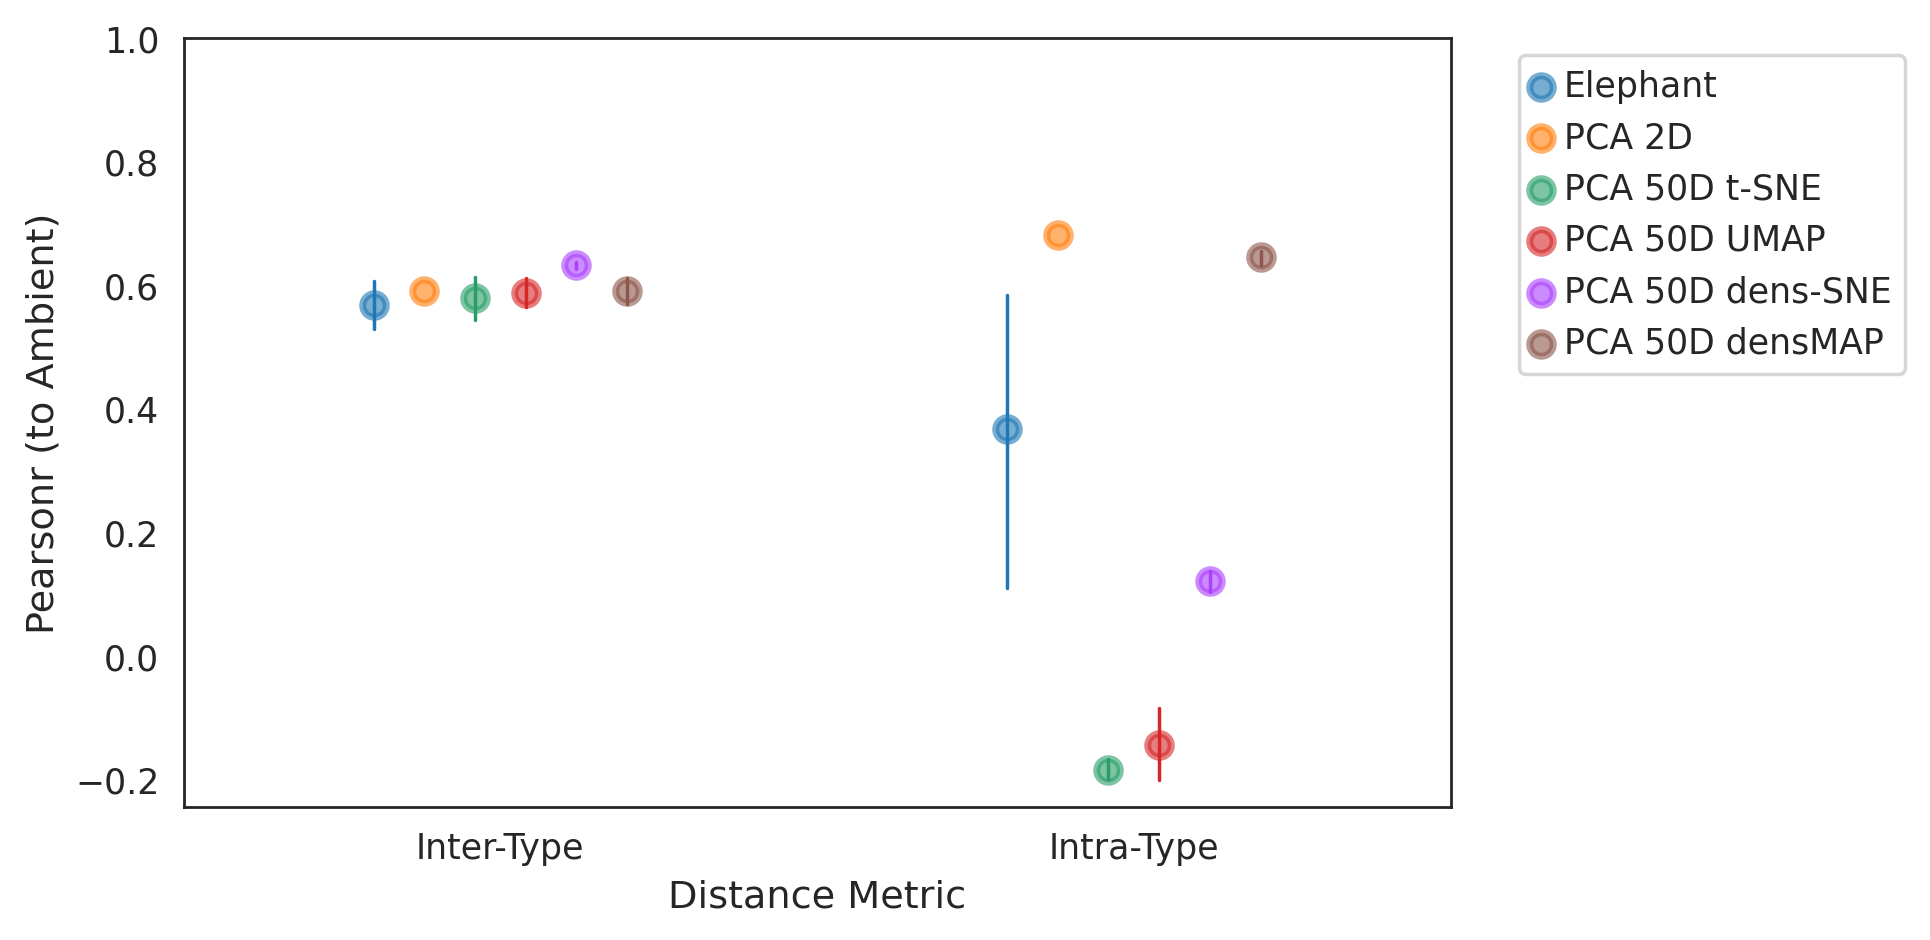

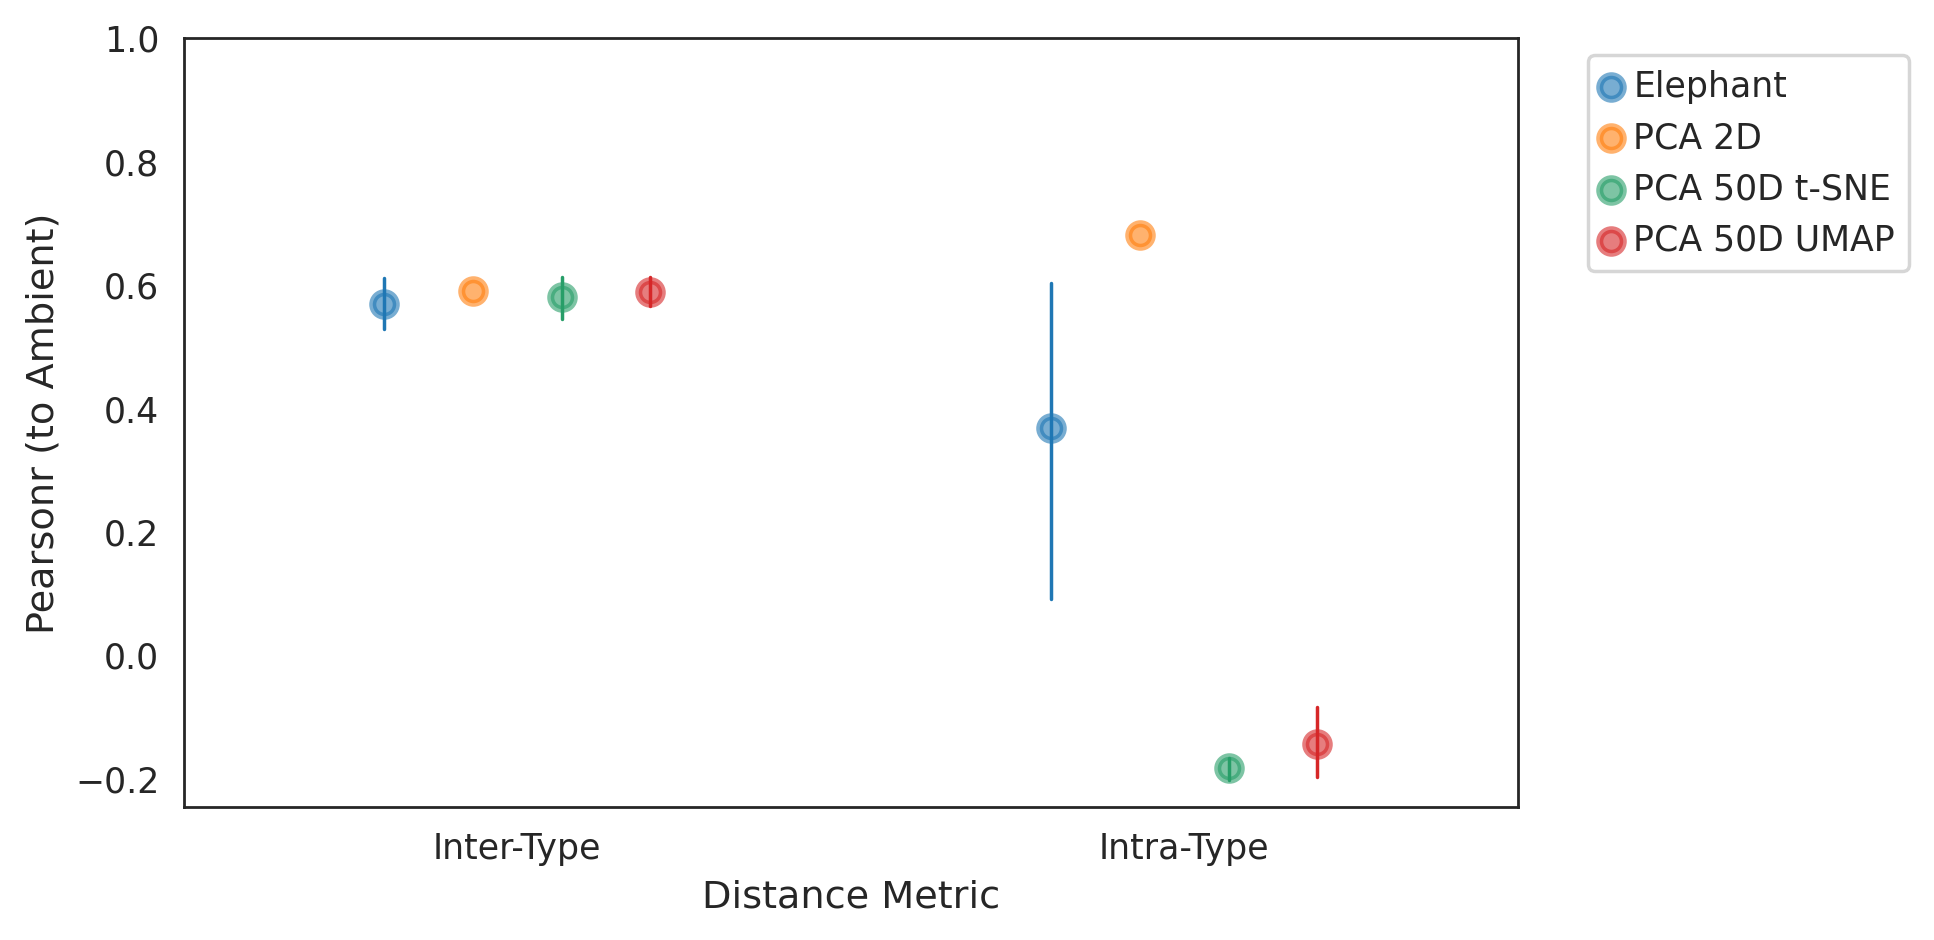

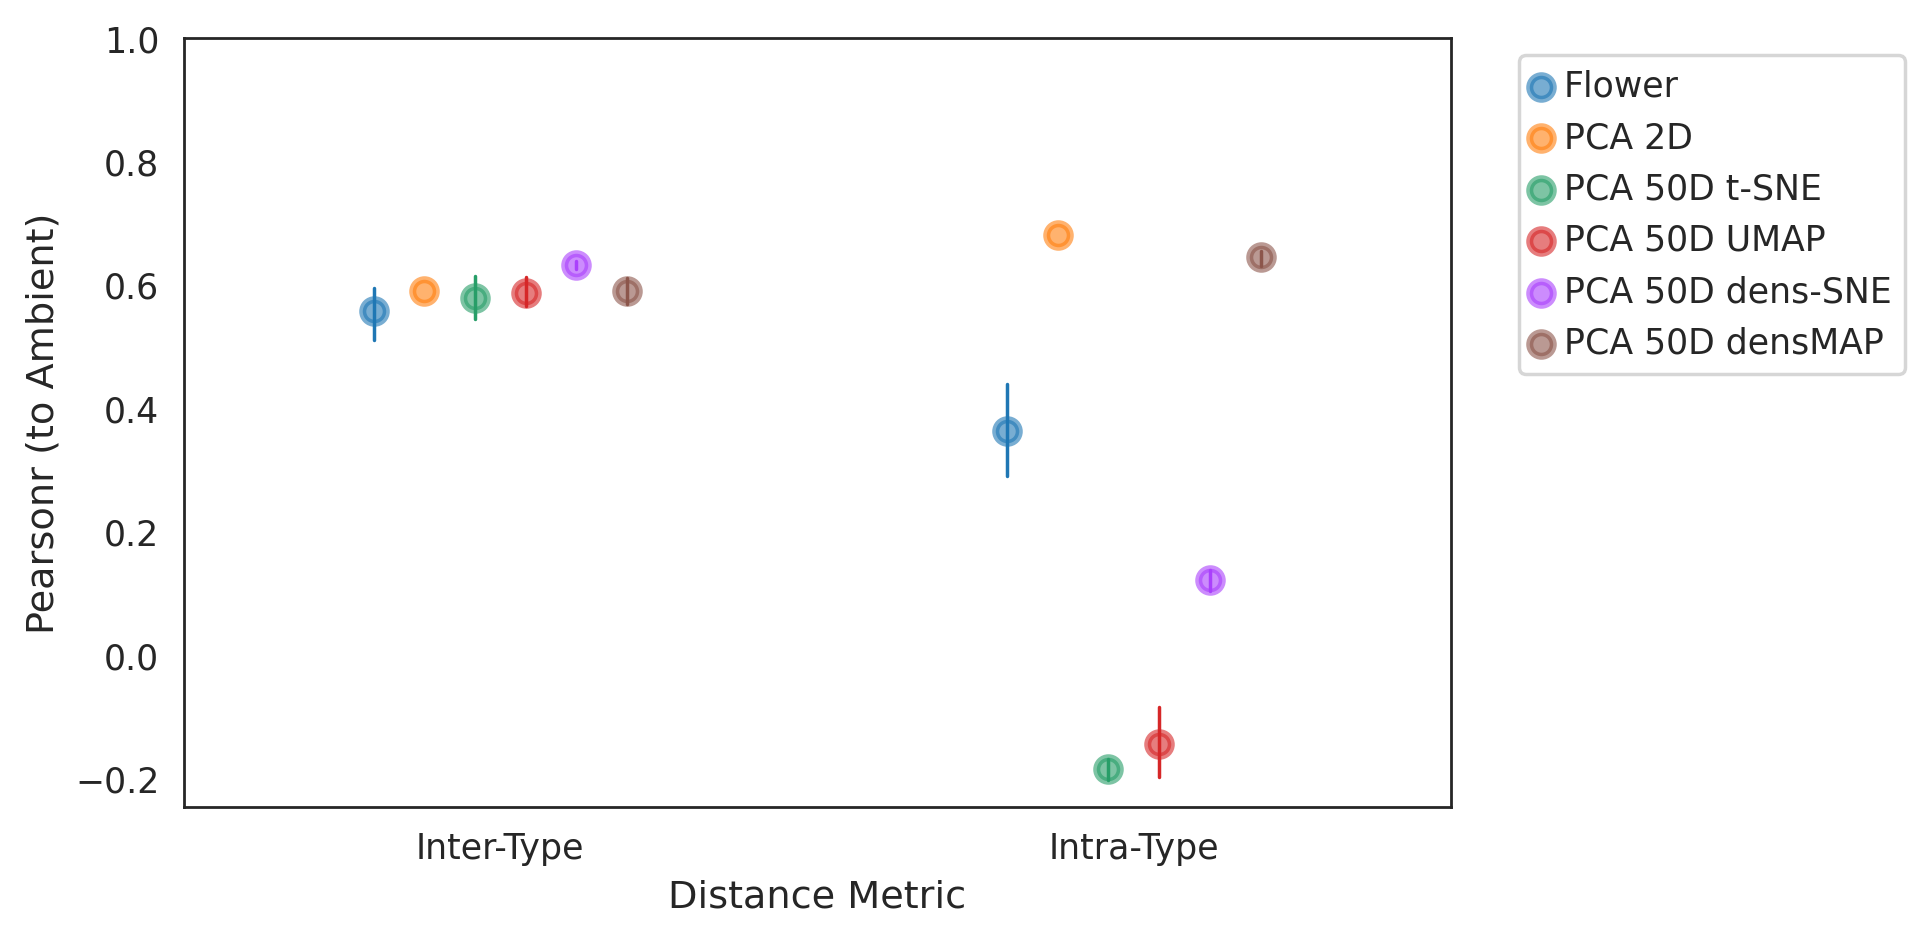

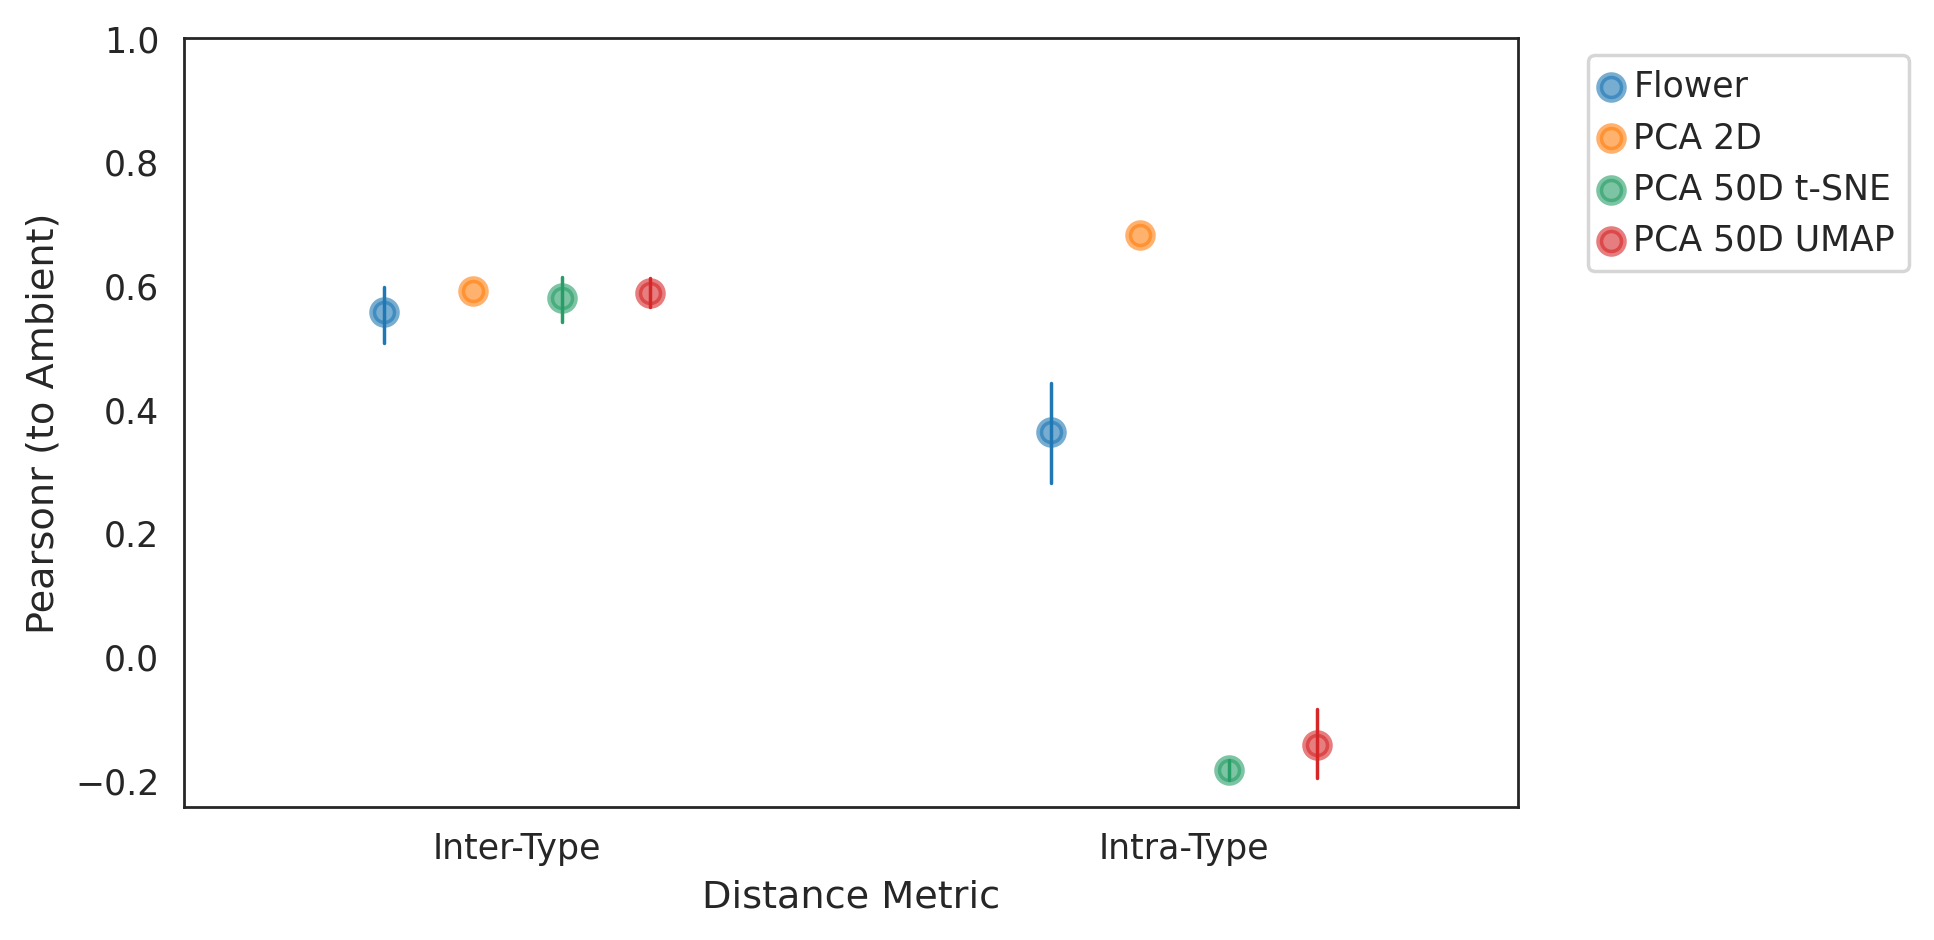

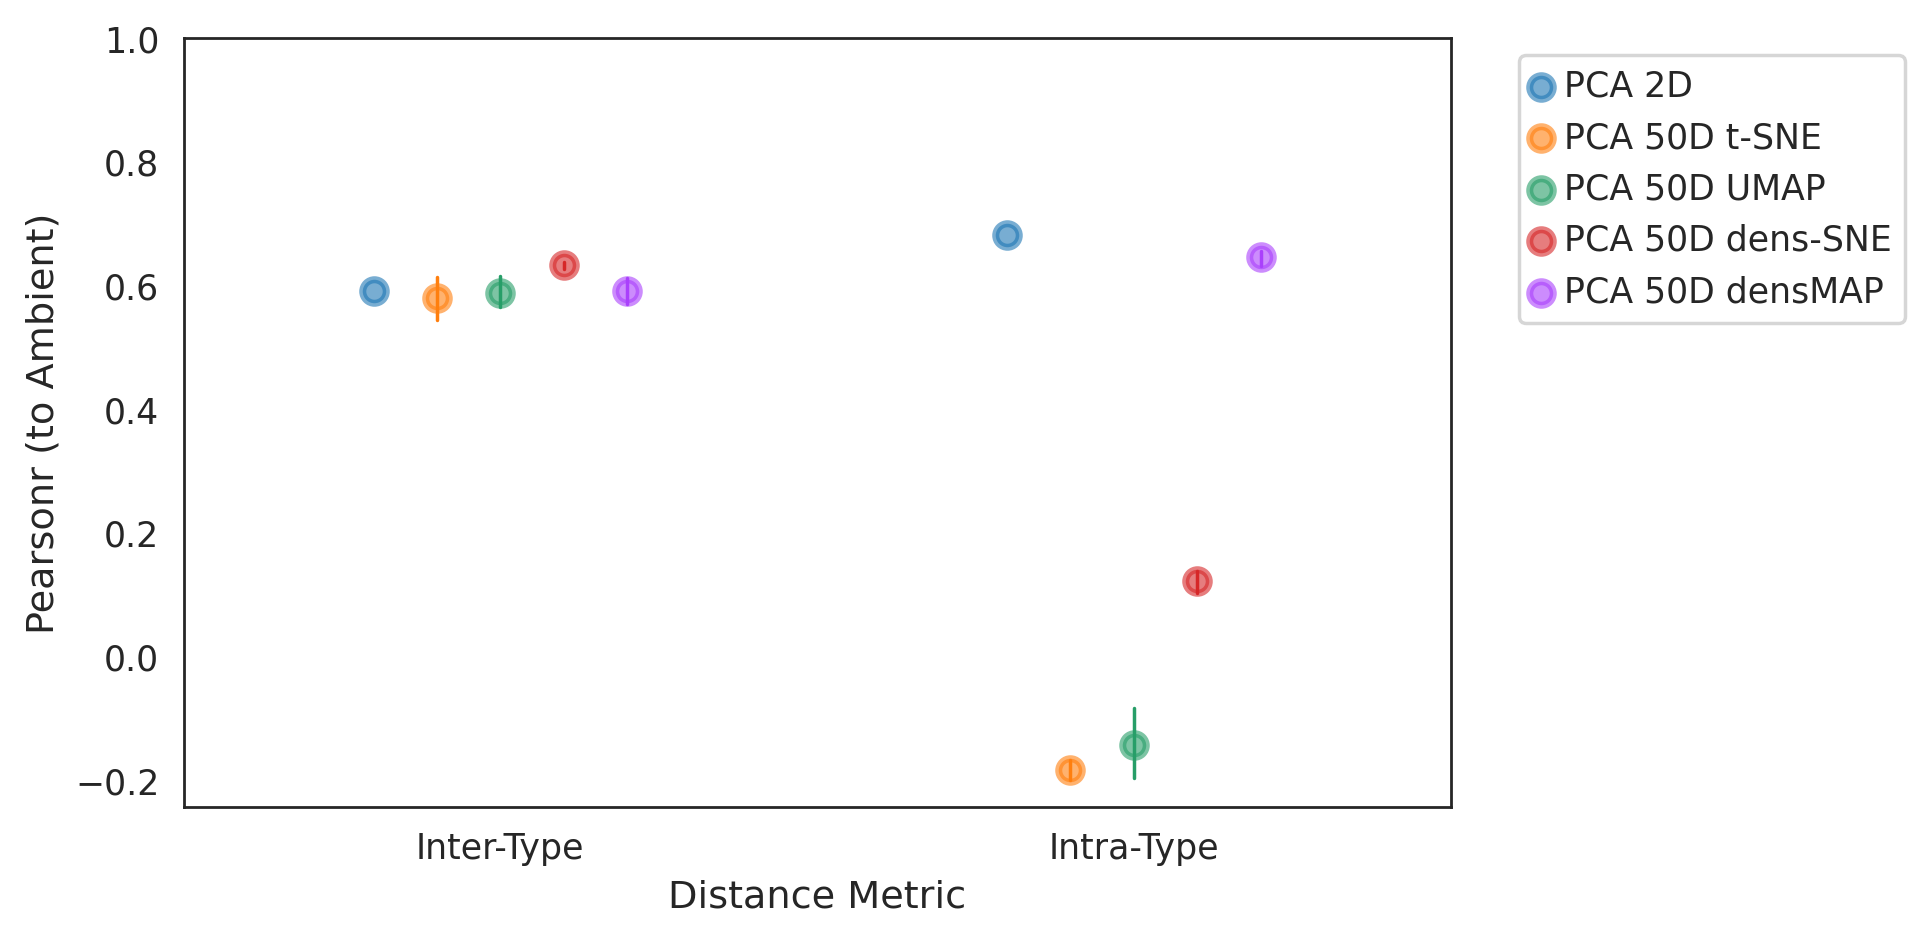

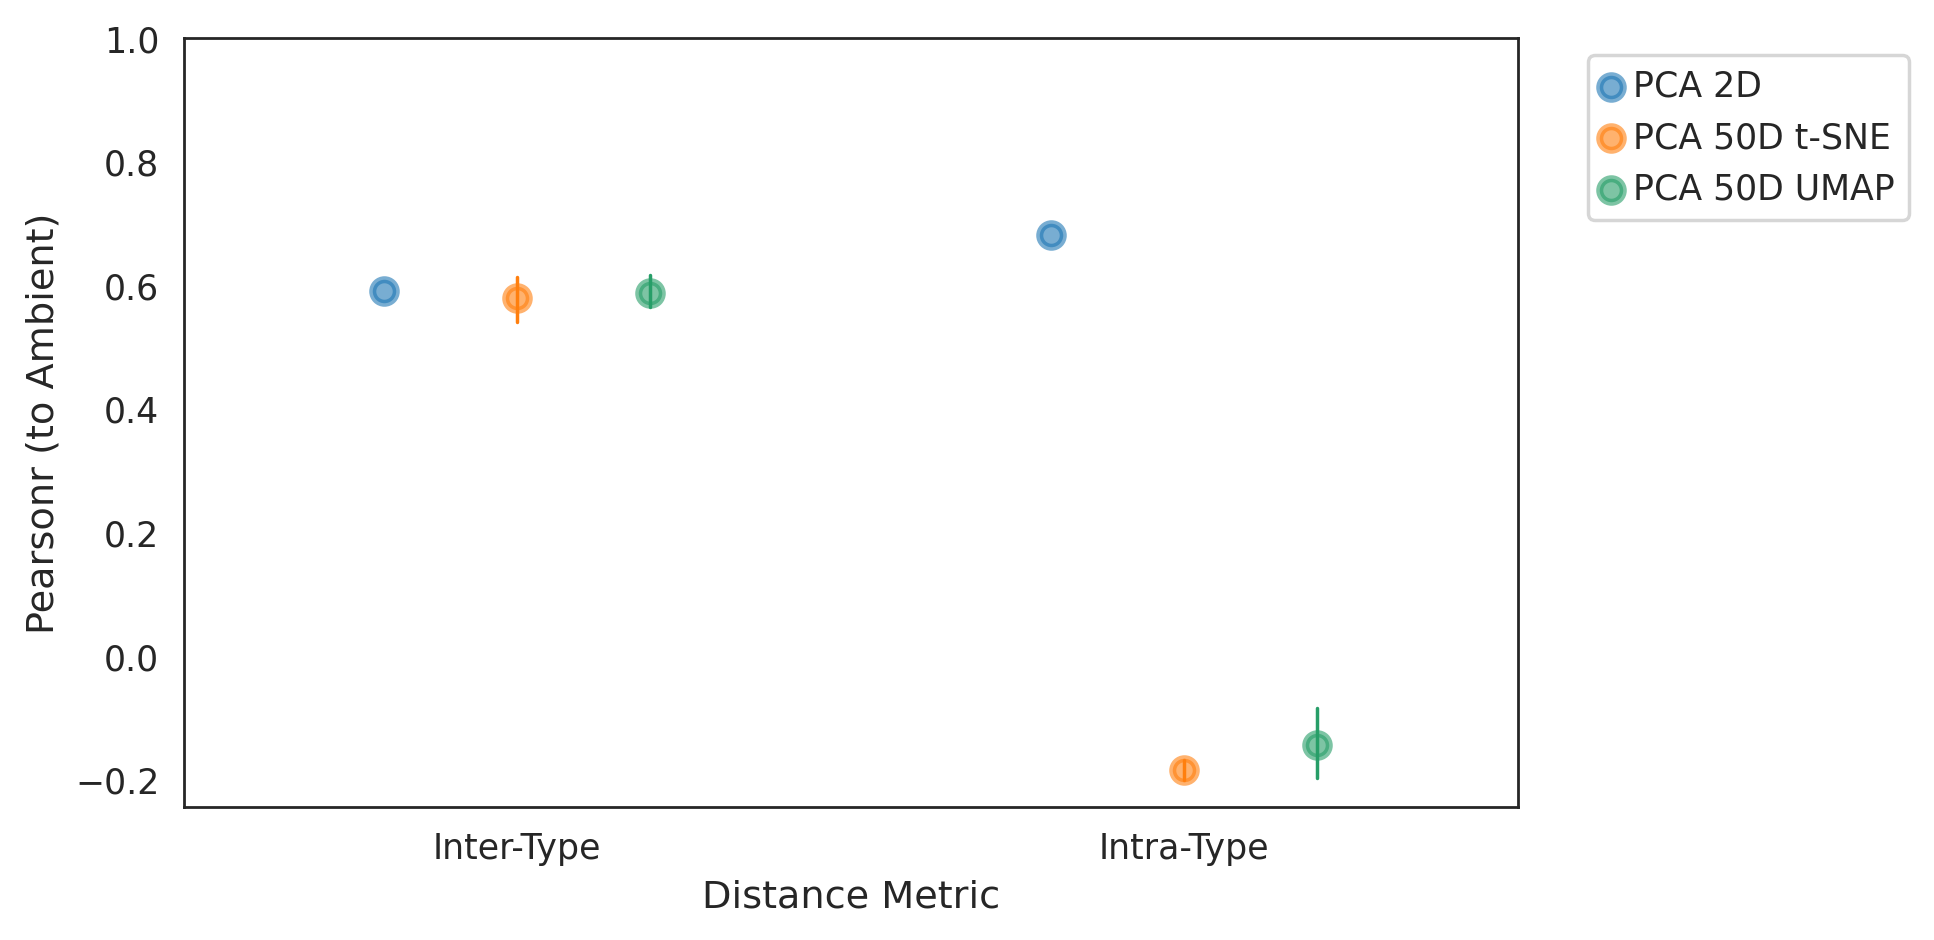

In [ ]:
#merfish

vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Flower','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Flower','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Flower','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Flower','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

L1 metrics

In [ ]:
uteroCorrs = pd.read_csv(data_path+'/exUtElMapVals.csv')
smartCorrs = pd.read_csv(data_path+'/smartSeqElVals.csv')
merCorrs = pd.read_csv(data_path+'/merfishElVals.csv') 
smartCorrs.head()

Unnamed: 0    Latent    Distance  Pearsonr Dimension
0           0  Elephant  Inter-Type  0.407403   MCML 2D
1           1  Elephant   Intra-Sex -0.113936   MCML 2D
2           2  Elephant  Intra-Type -0.192708   MCML 2D
3           3  Elephant   Inter-Sex -0.008465   MCML 2D
4           4  Elephant  Inter-Type  0.361200   MCML 2D

In [ ]:
for obj in [uteroCorrs,smartCorrs,merCorrs]:

  obj['Latent'] = [x.replace('PCA UMAP', 'PCA 50D UMAP') for x in obj['Latent']]
  obj['Latent'] = [x.replace('PCA TSNE', 'PCA 50D t-SNE') for x in obj['Latent']]
  obj['Latent'] = [x.replace('PCA densMAP', 'PCA 50D densMAP') for x in obj['Latent']]
  obj['Latent'] = [x.replace('PCA densSNE', 'PCA 50D dens-SNE') for x in obj['Latent']]

In [ ]:
axisFontSize = 11
tickFontSize = 10
errwidth=1
figsize =(8,4)
dodge=0.4

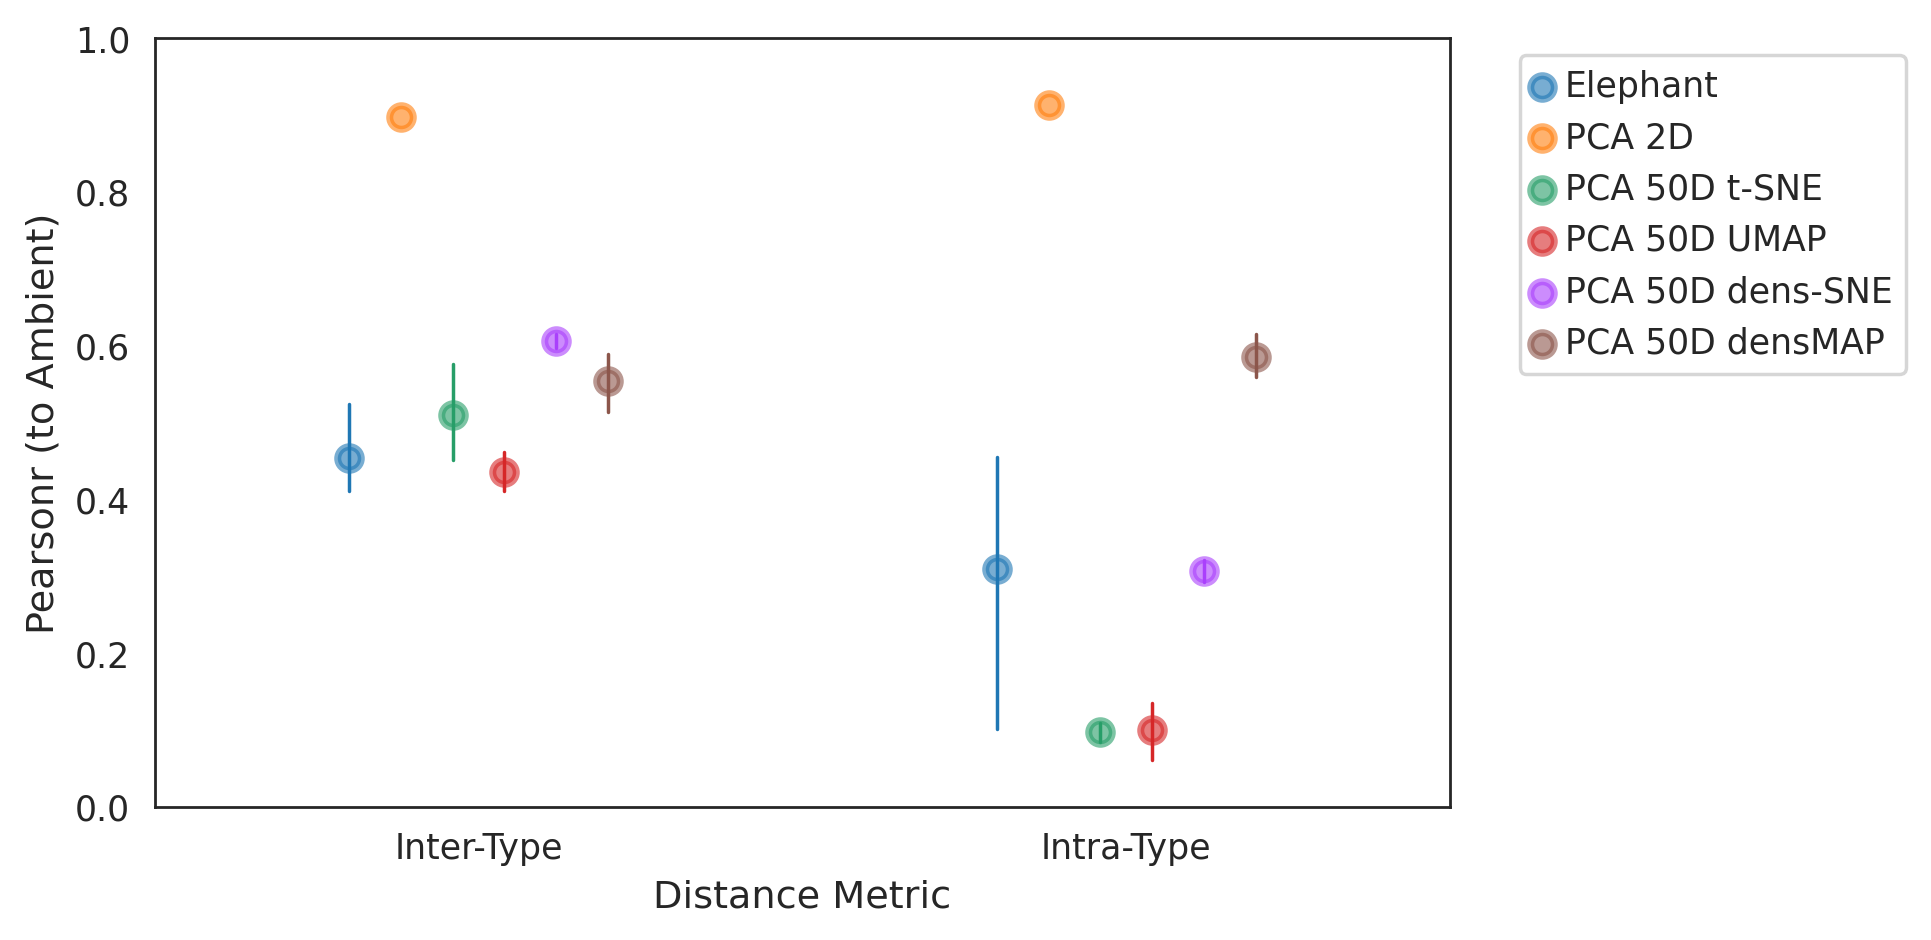

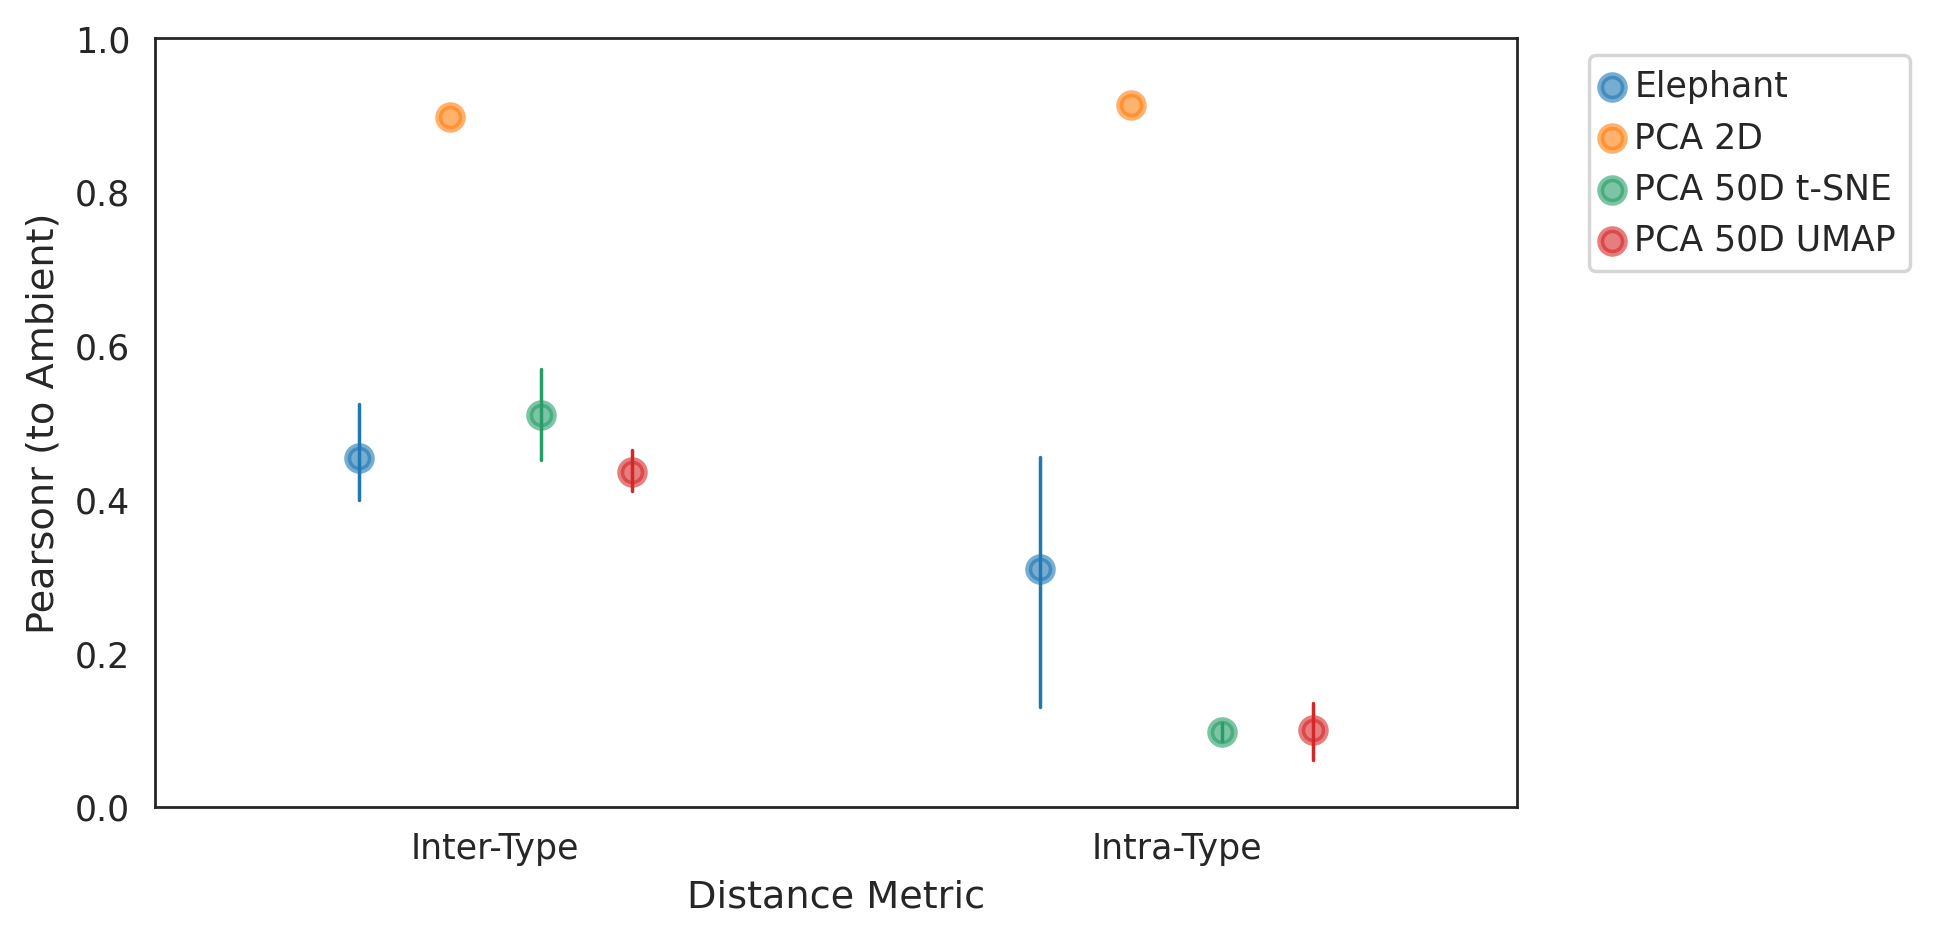

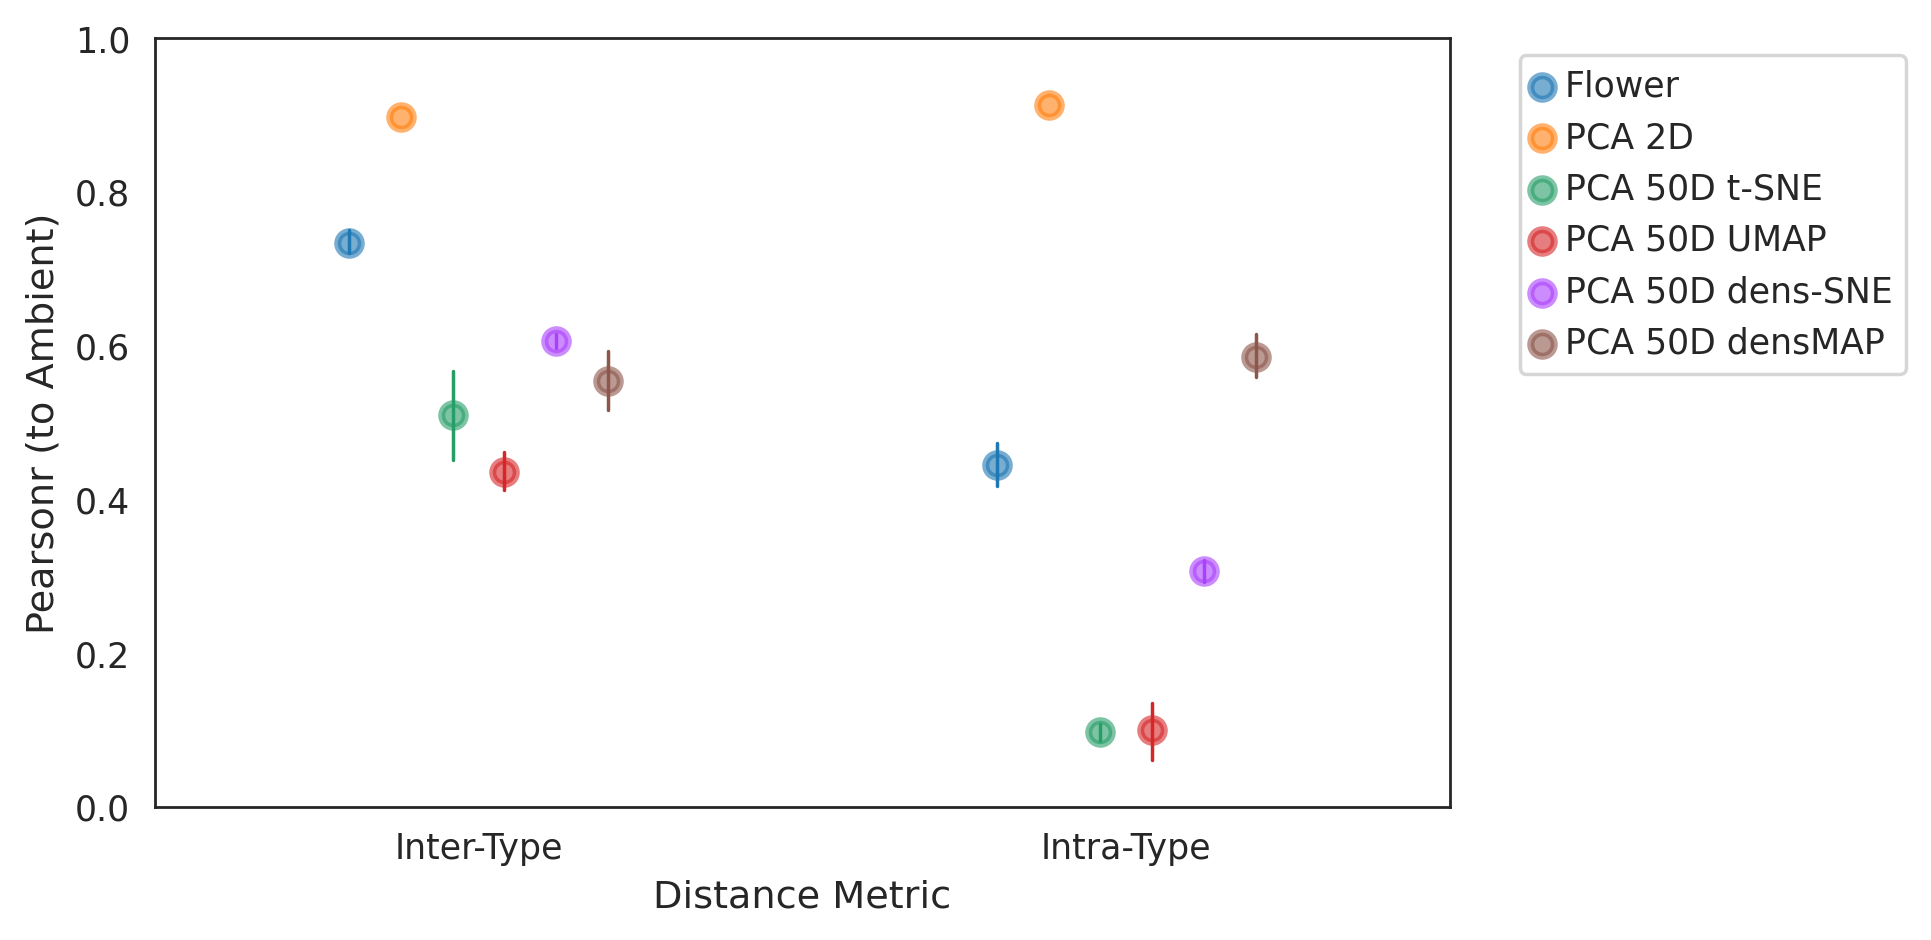

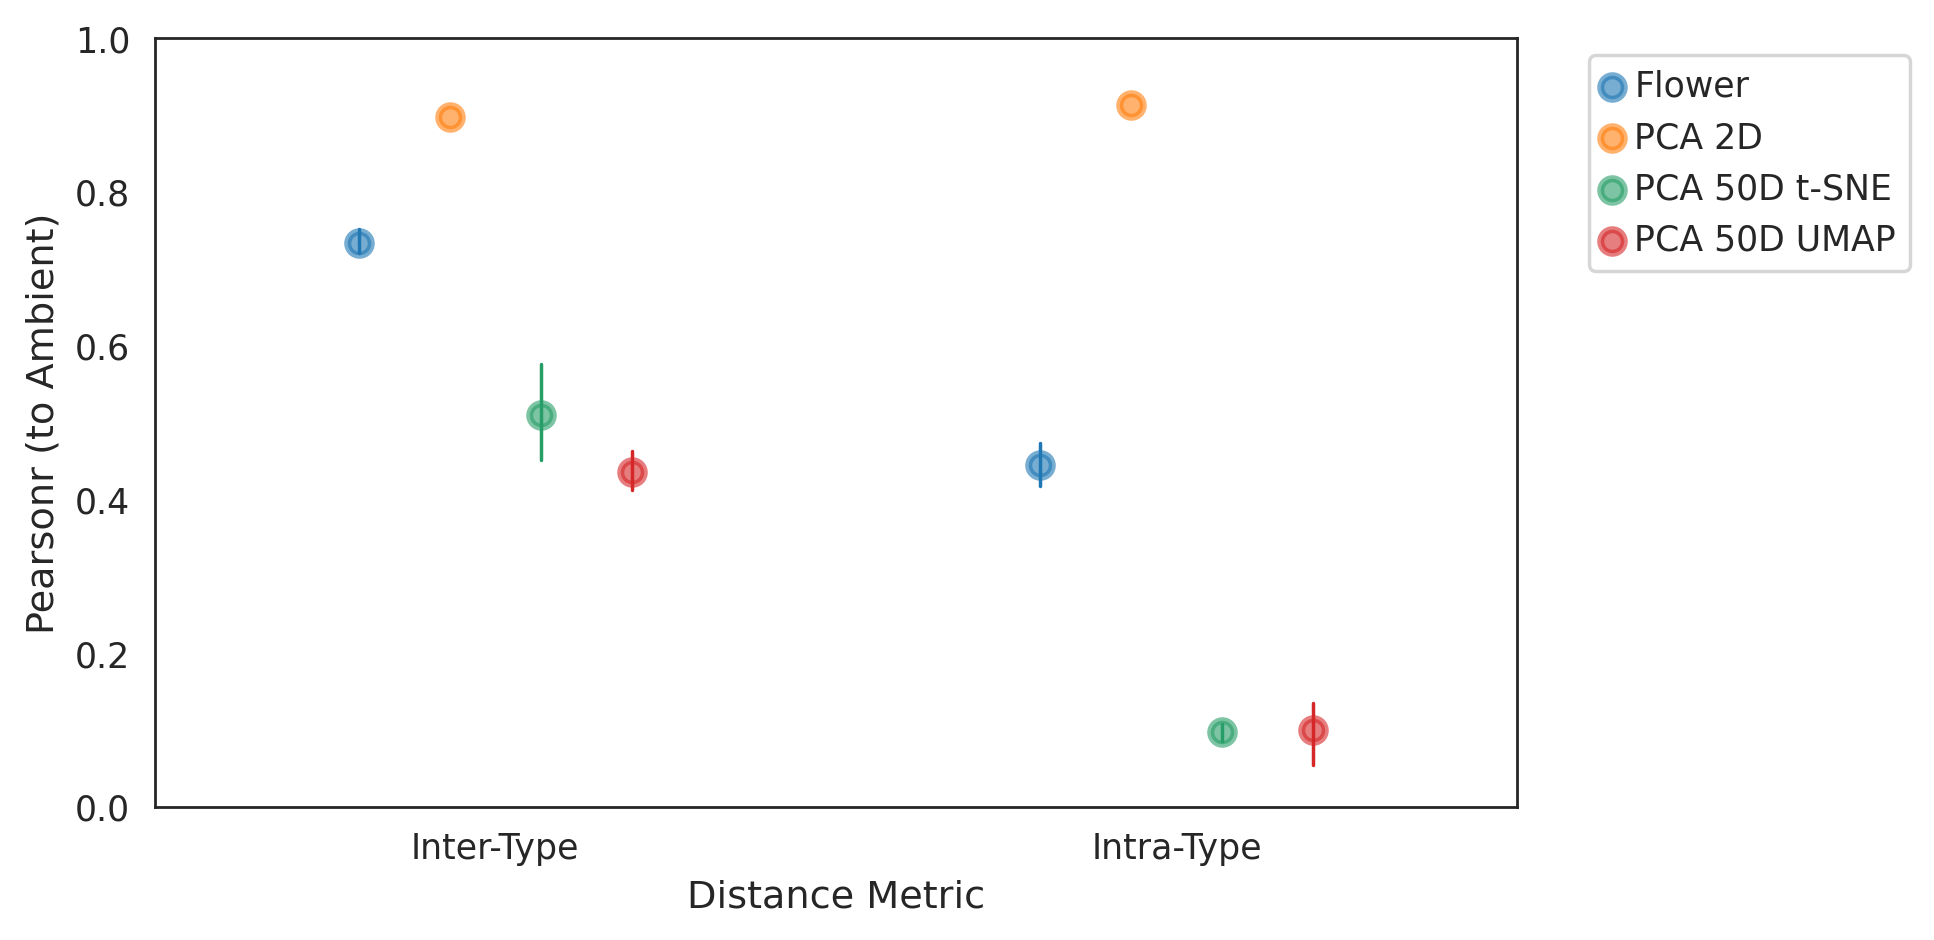

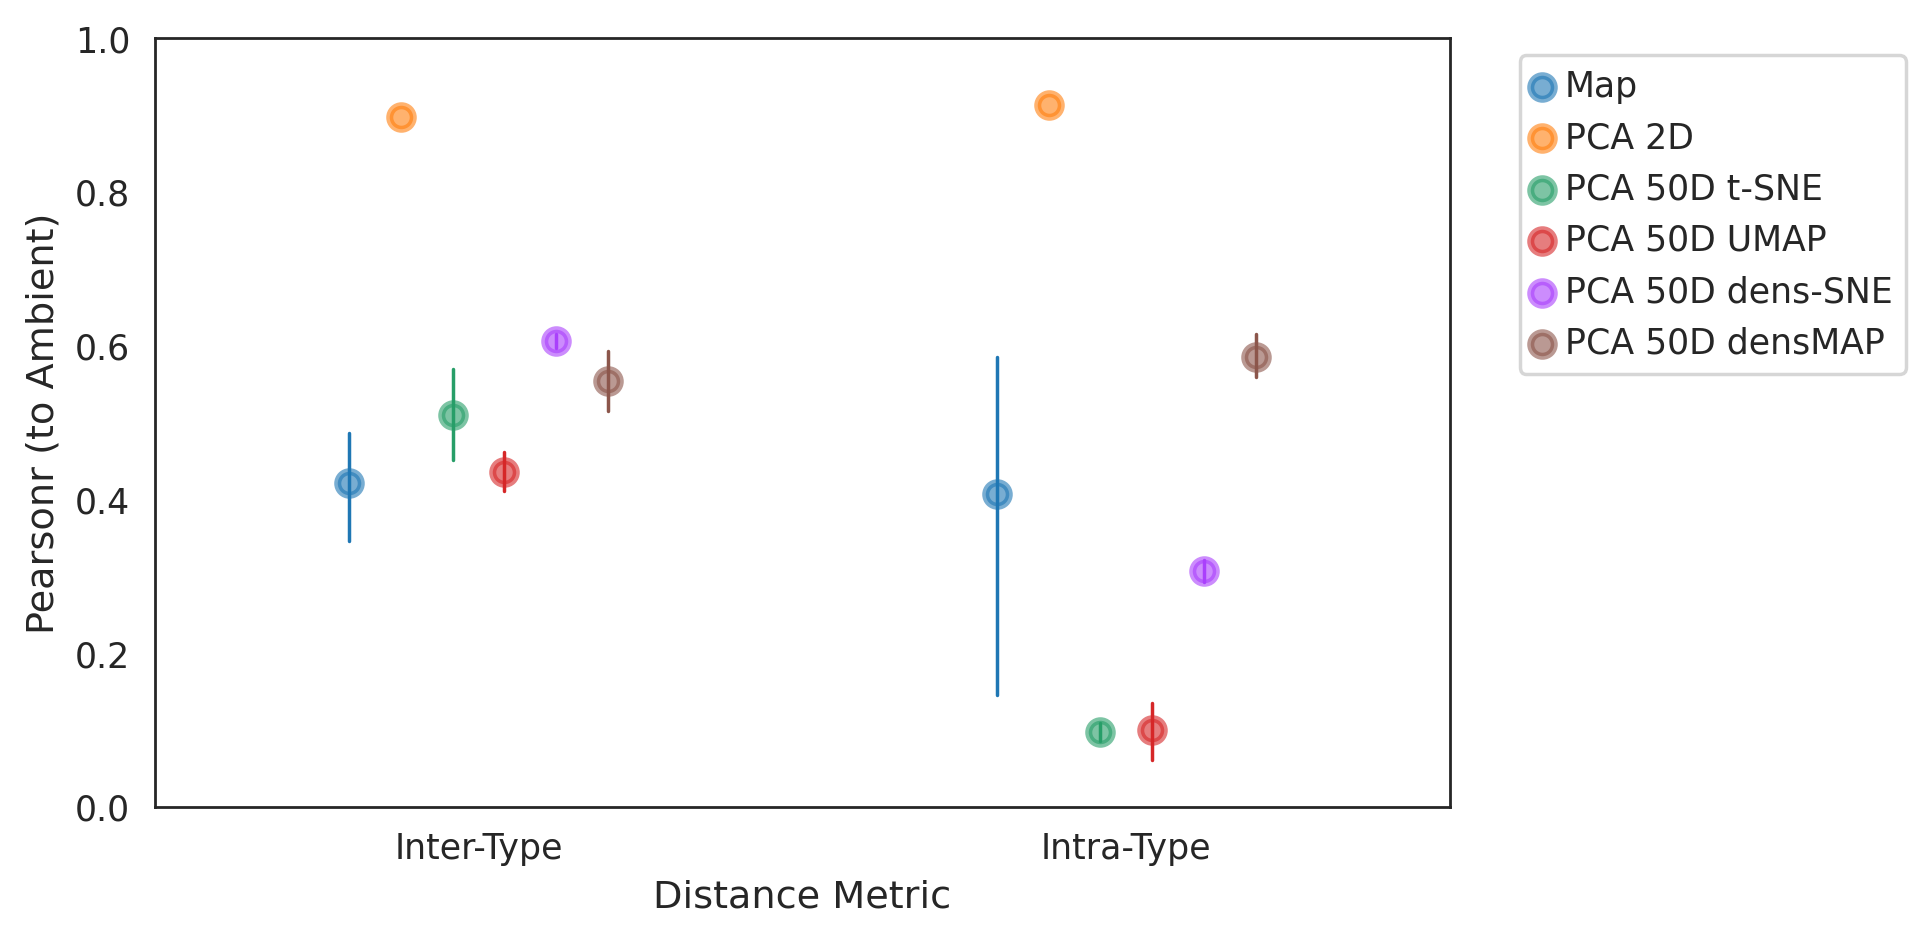

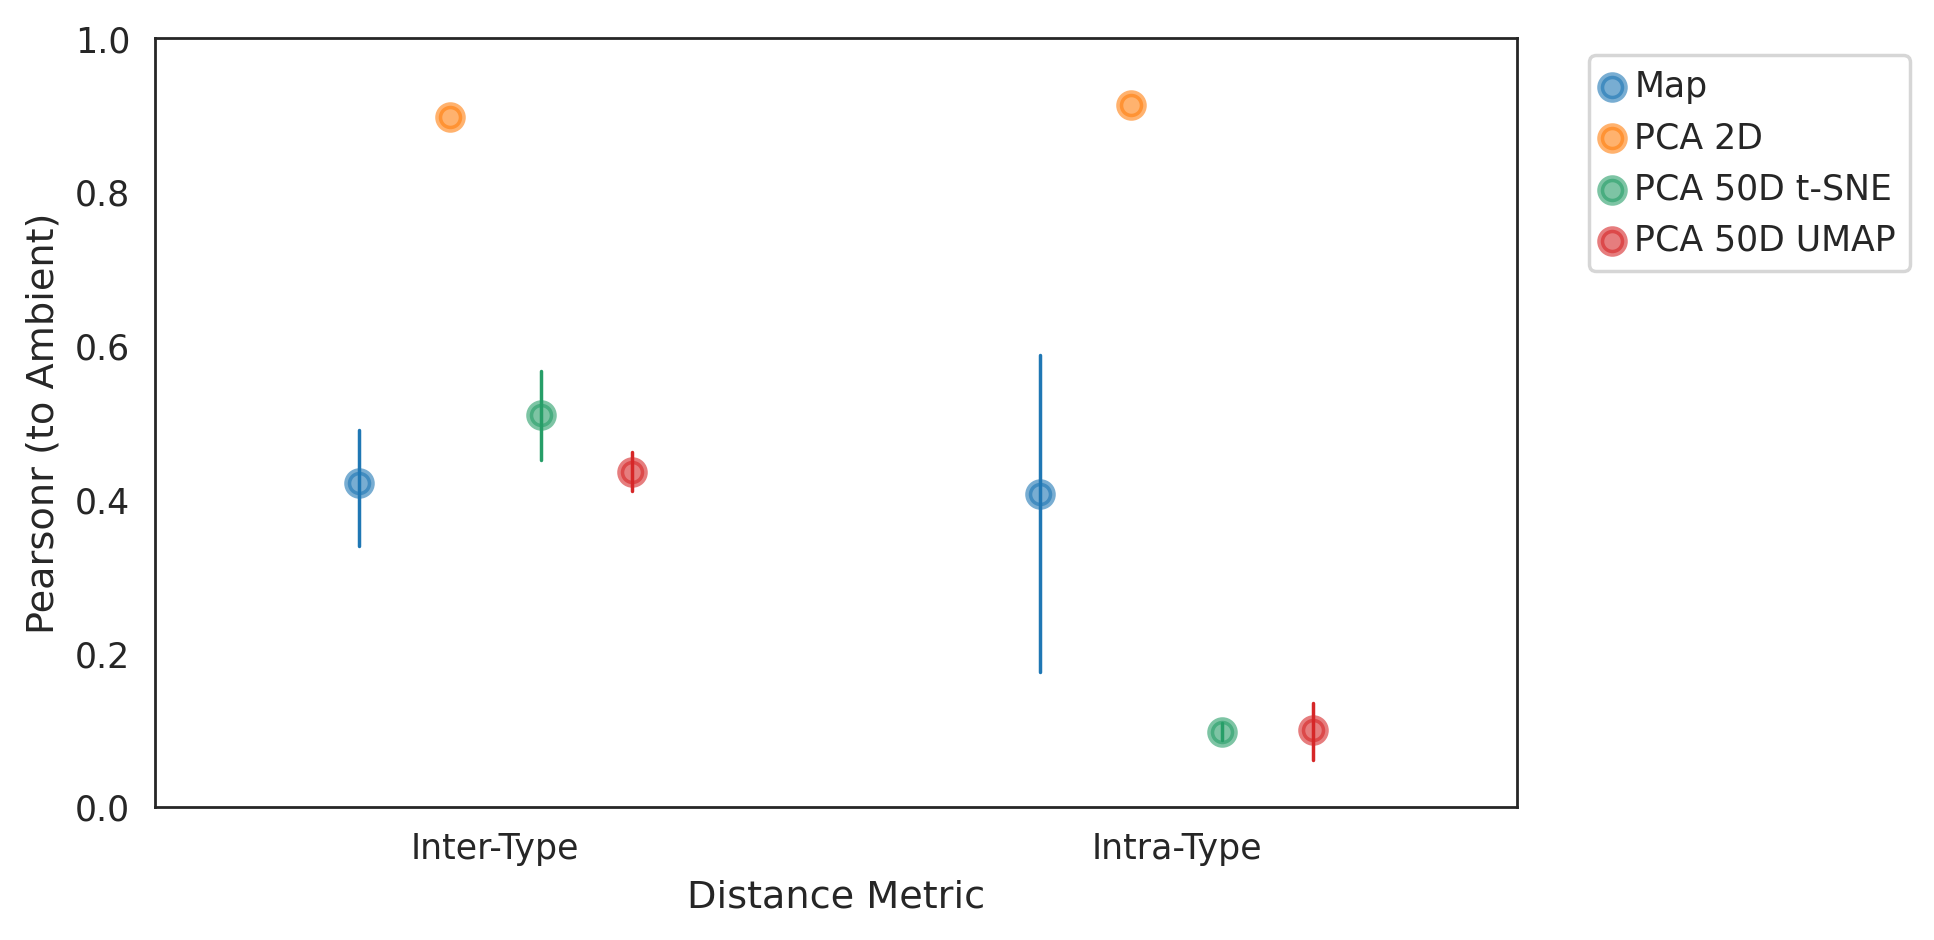

In [ ]:
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Flower','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Flower','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Flower','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)
vis.plotLatentStats(uteroCorrs[~uteroCorrs['Latent'].isin(['Elephant','Flower','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymin=0,ymax=1)

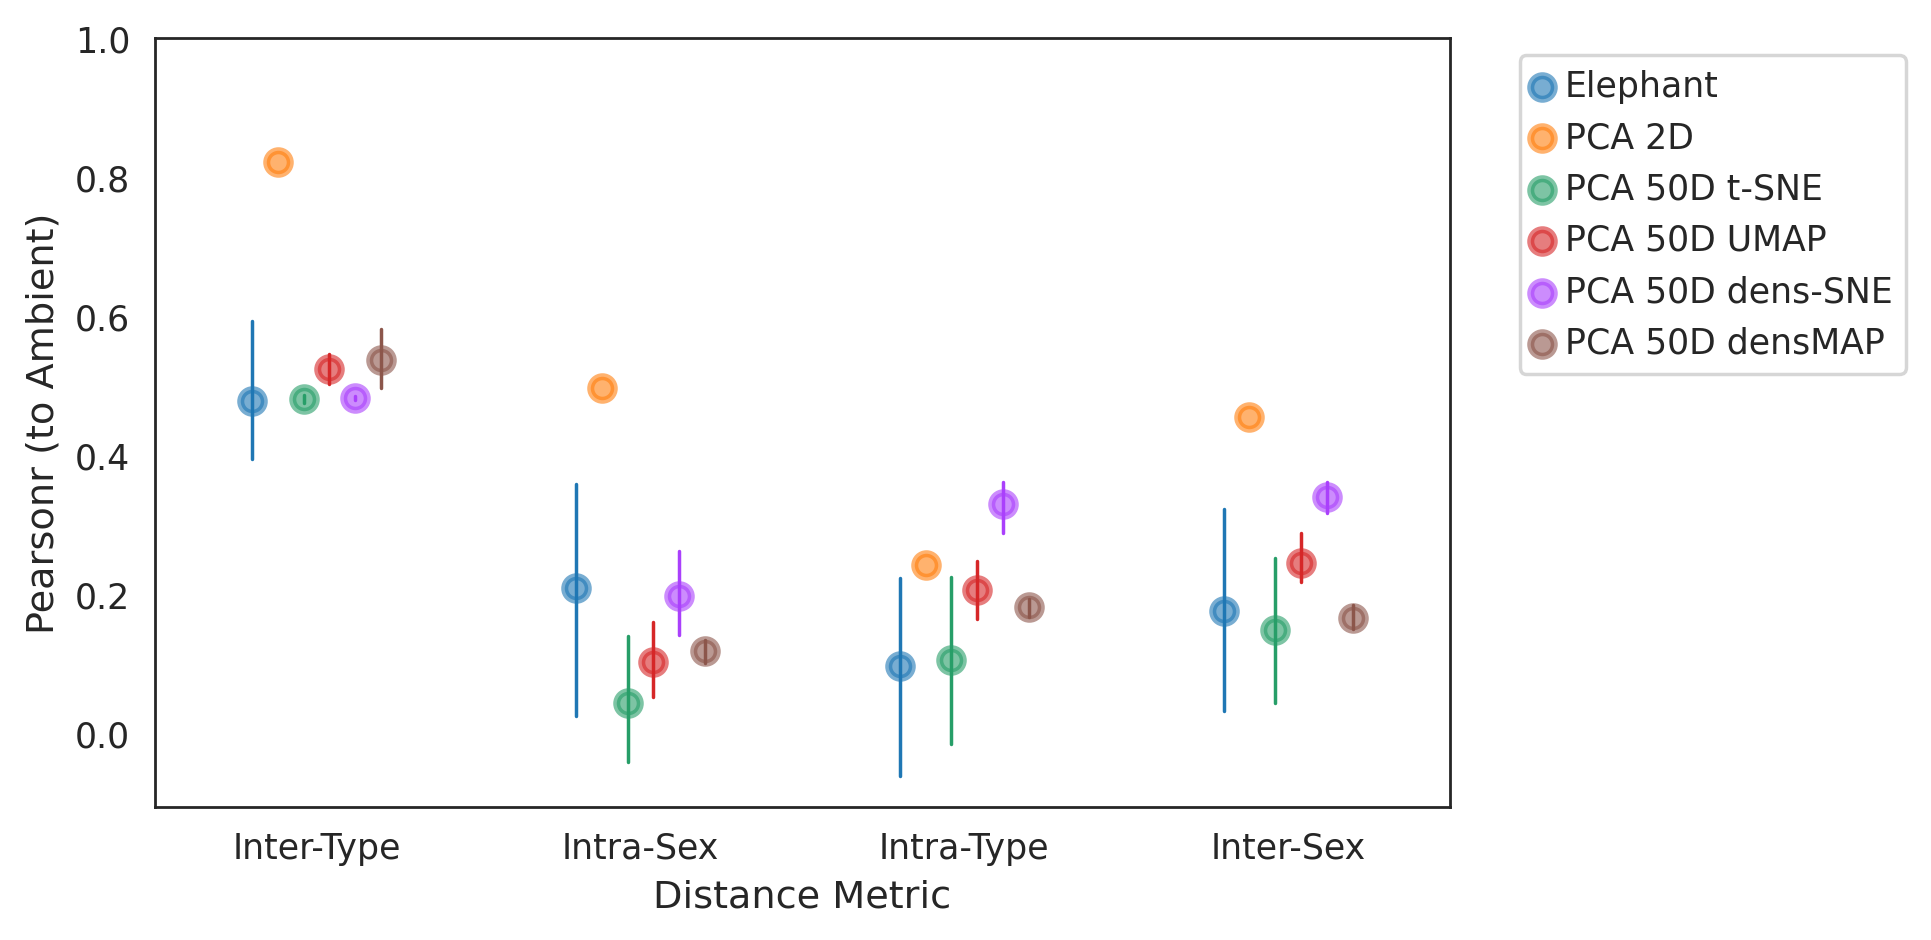

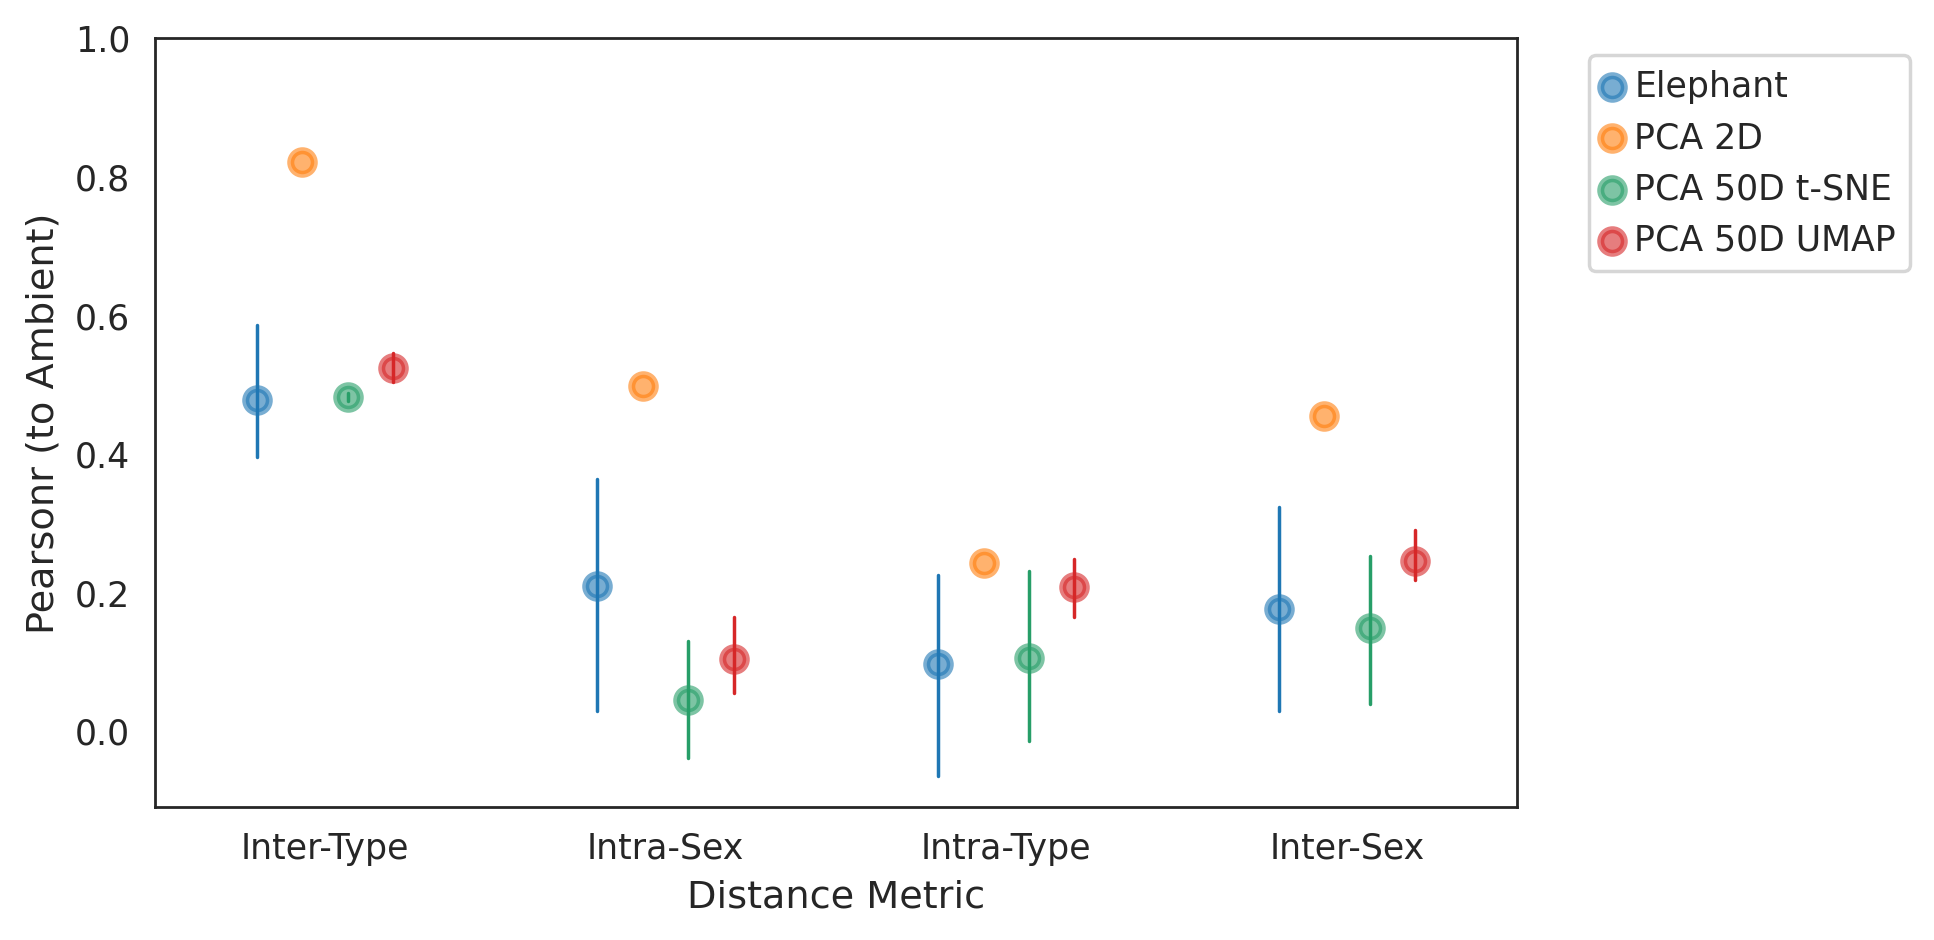

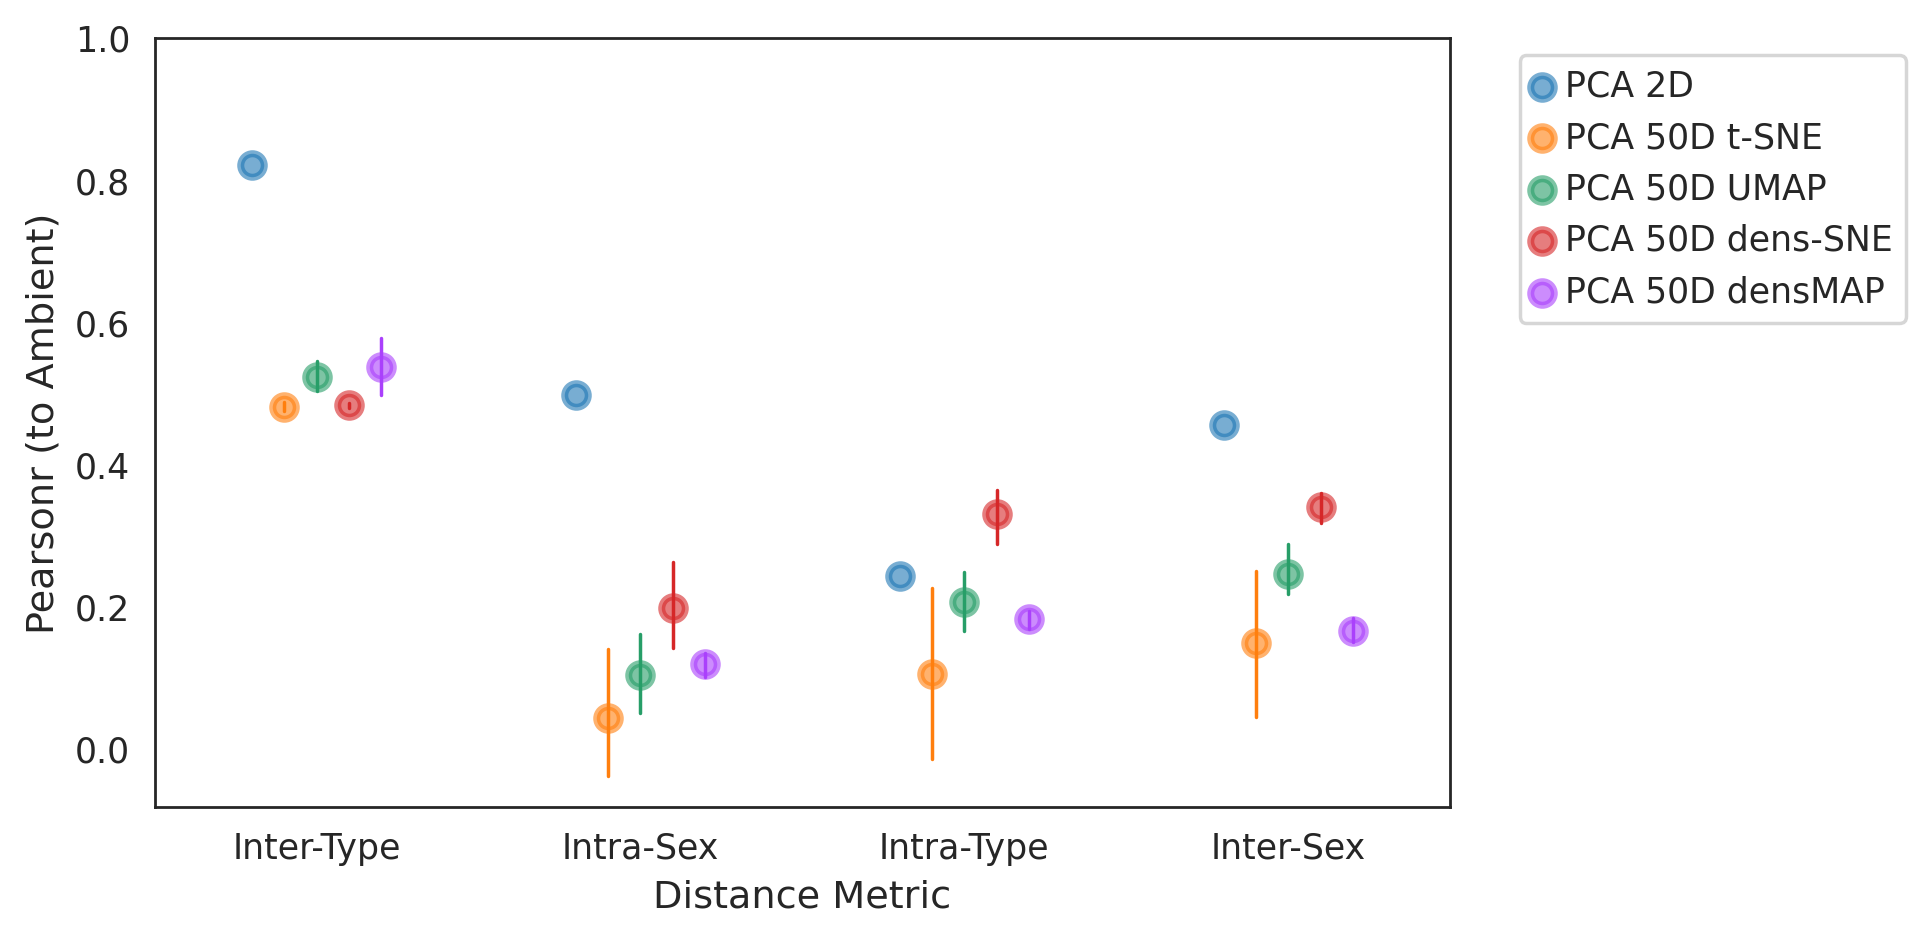

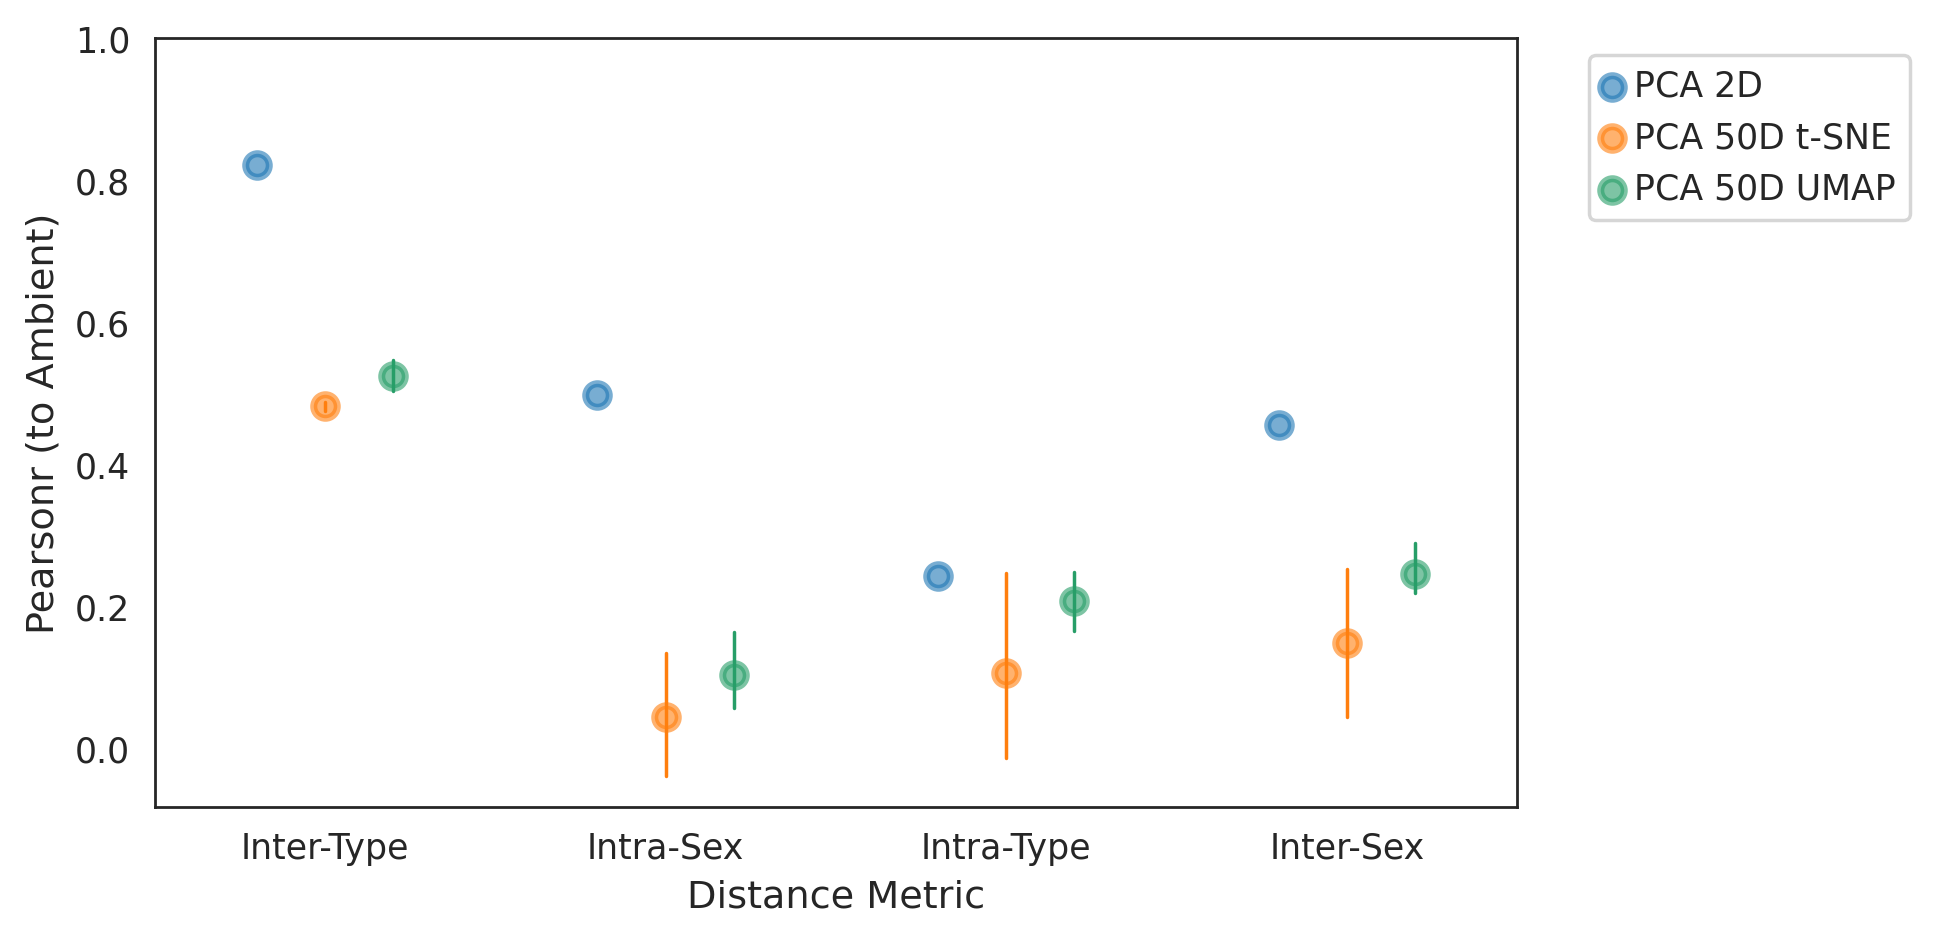

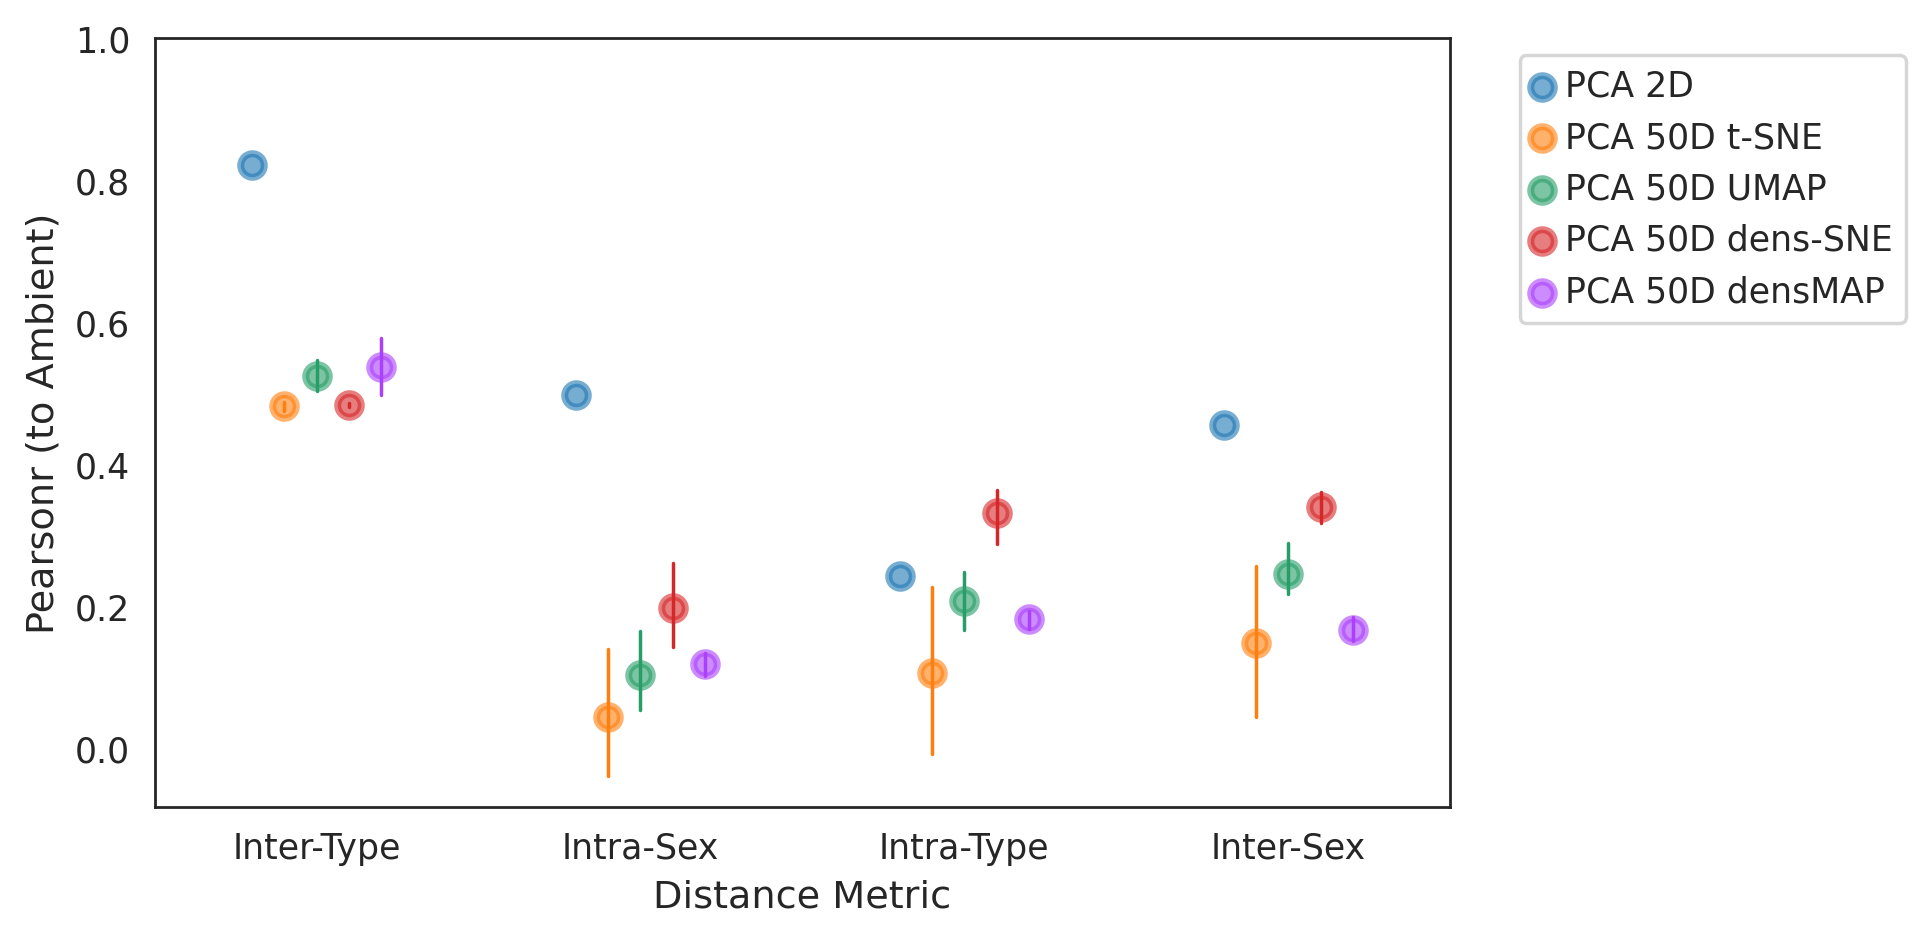

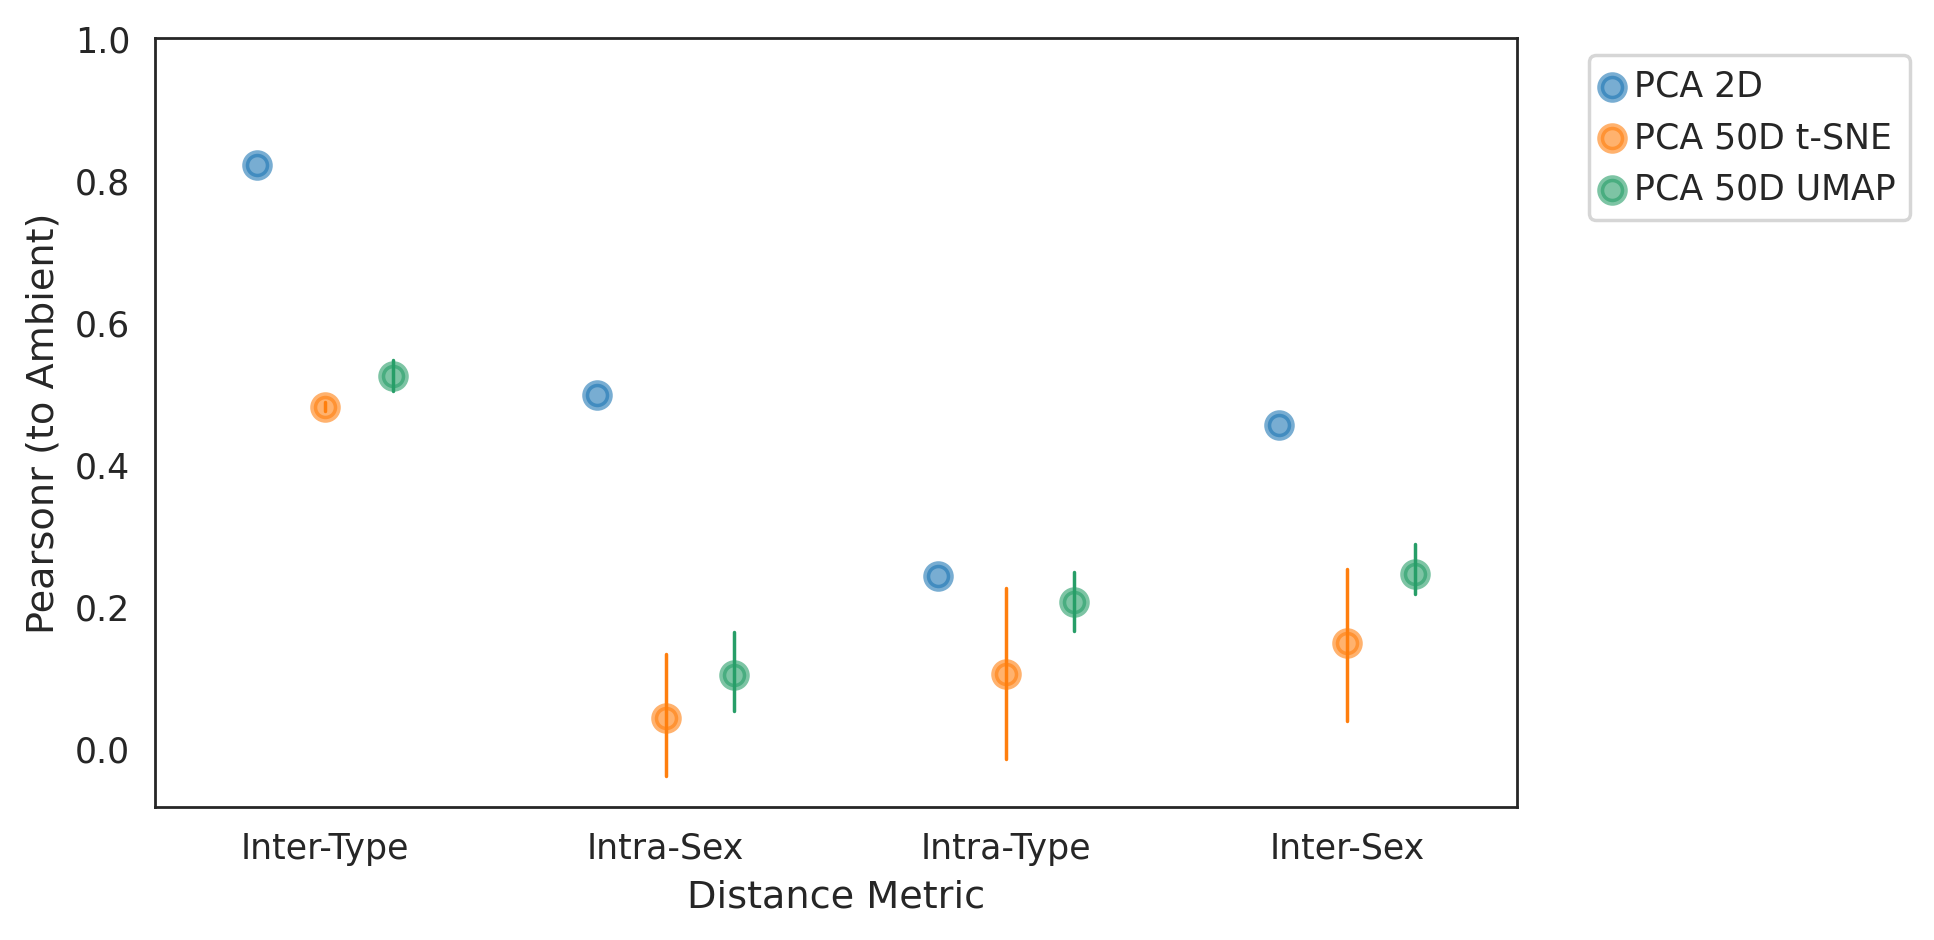

In [ ]:
#smartseq
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Flower','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Flower','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Flower','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(smartCorrs[~smartCorrs['Latent'].isin(['Elephant','Flower','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

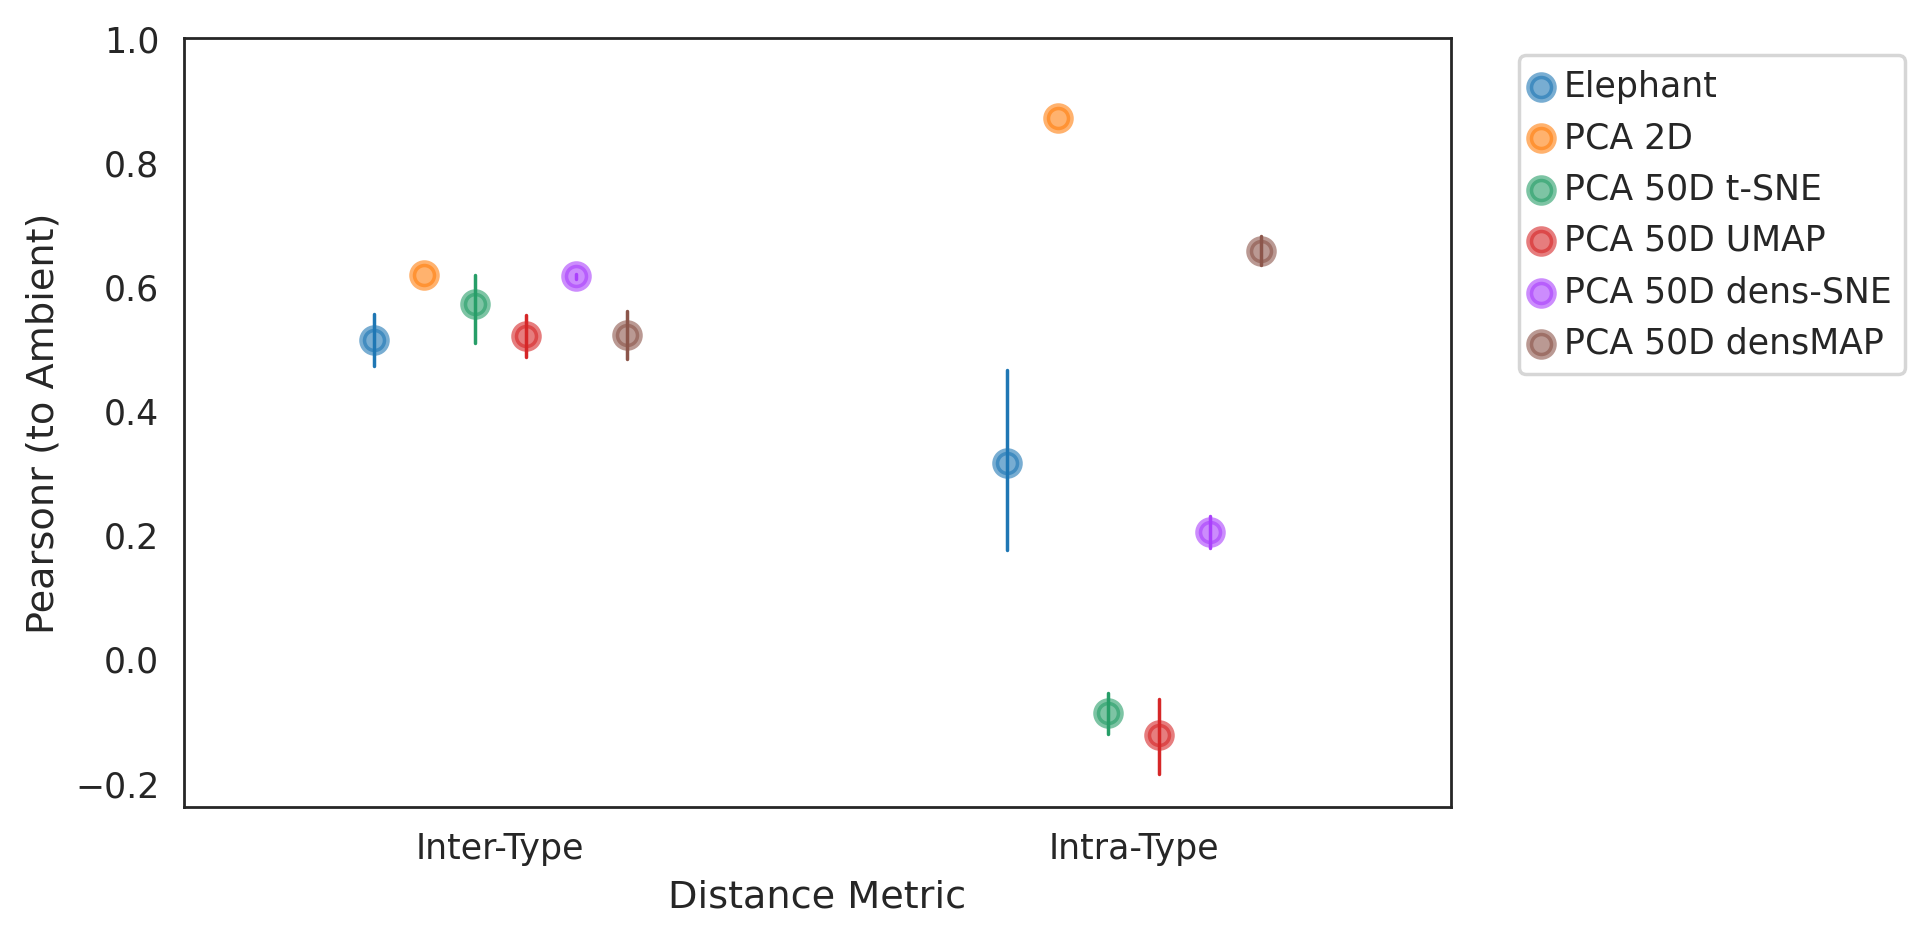

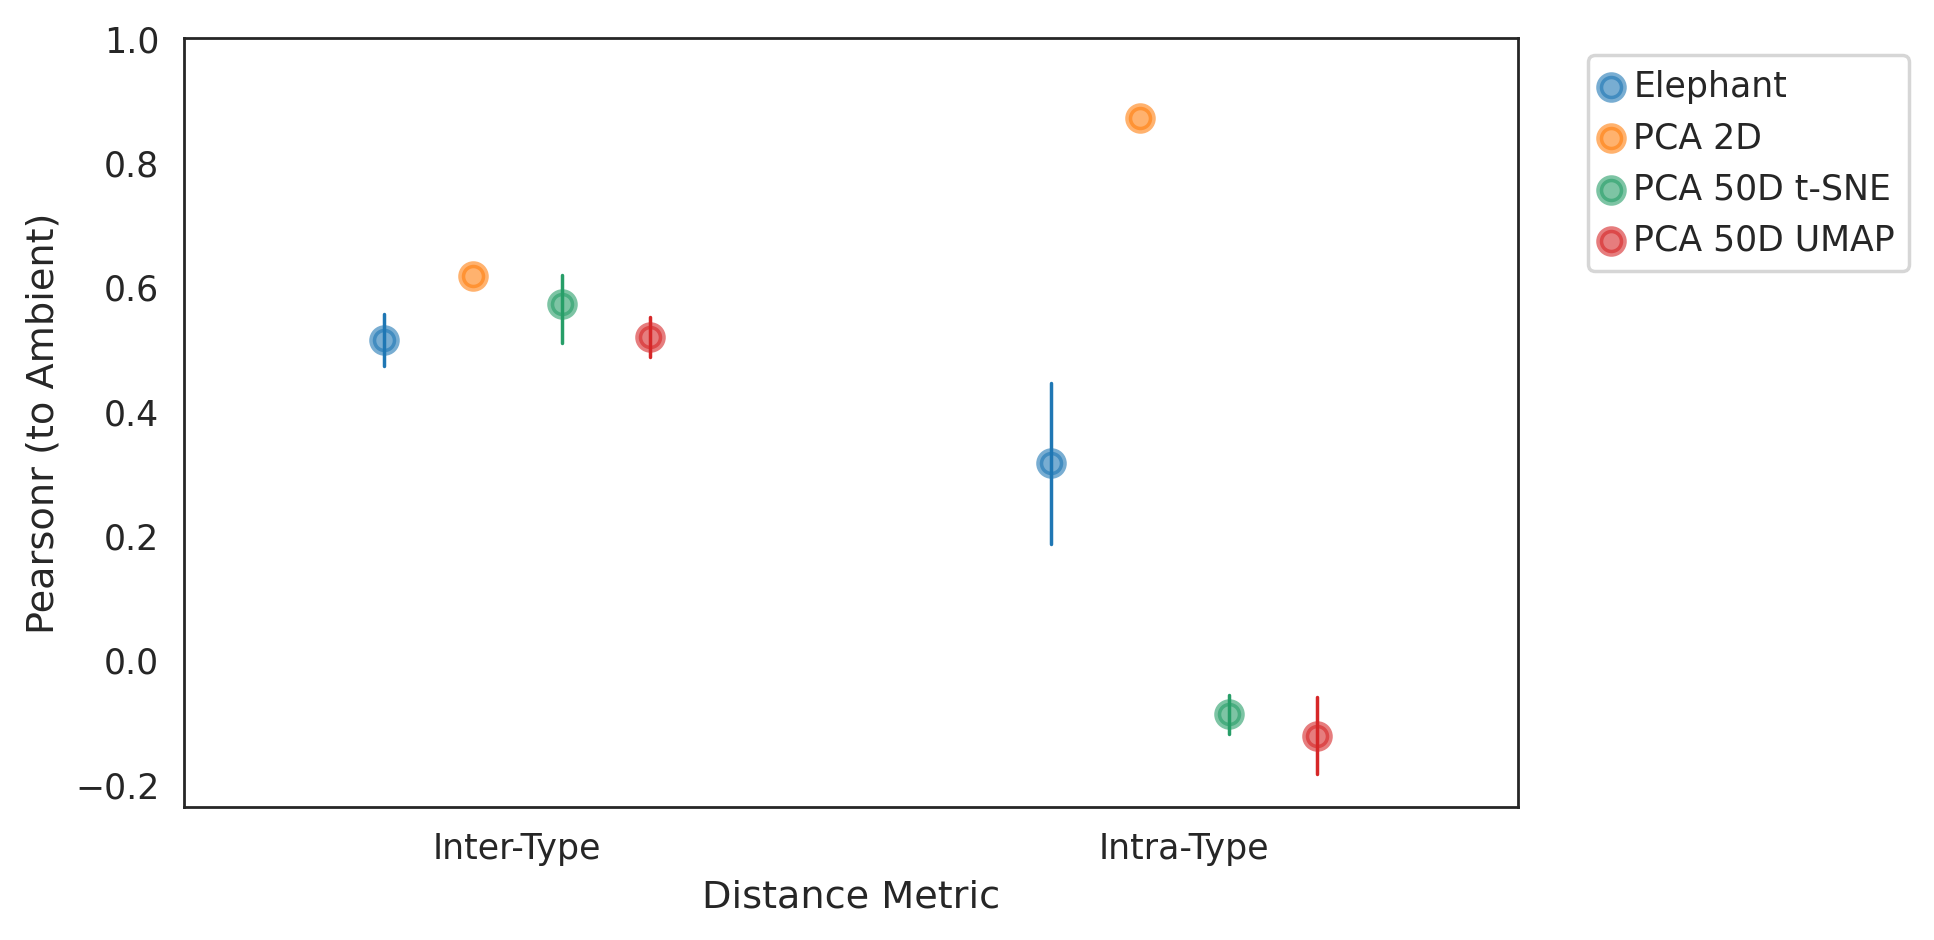

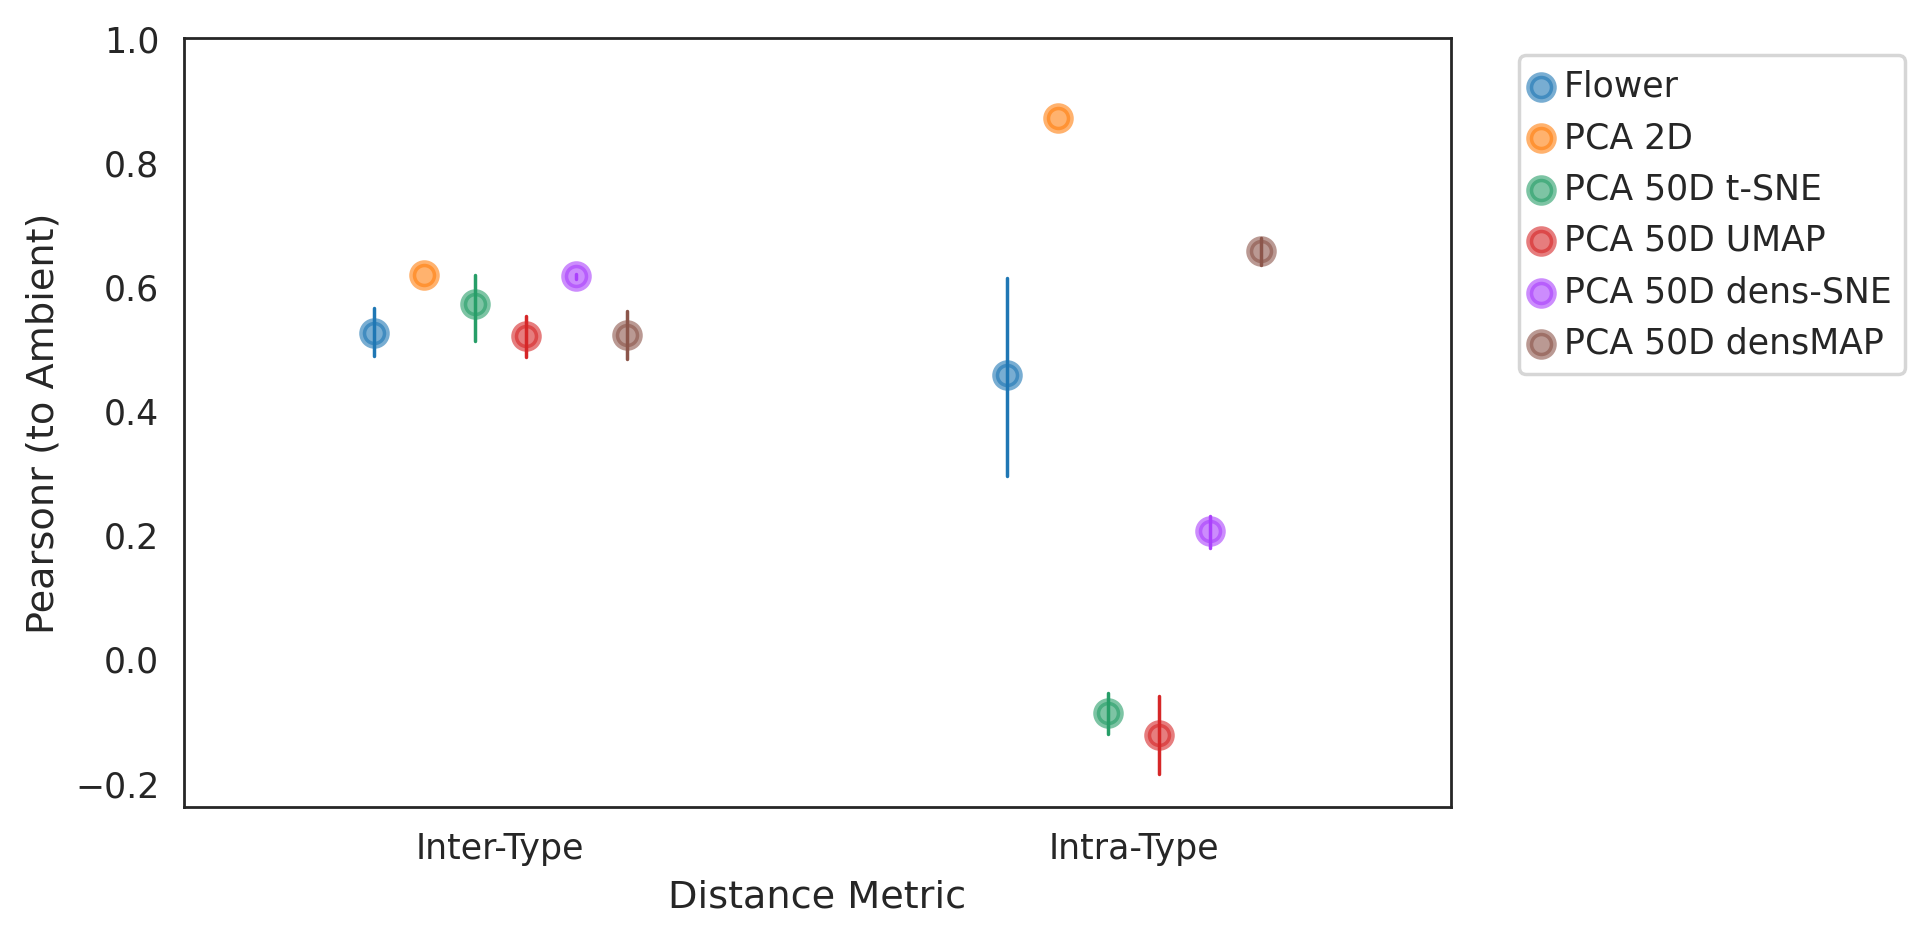

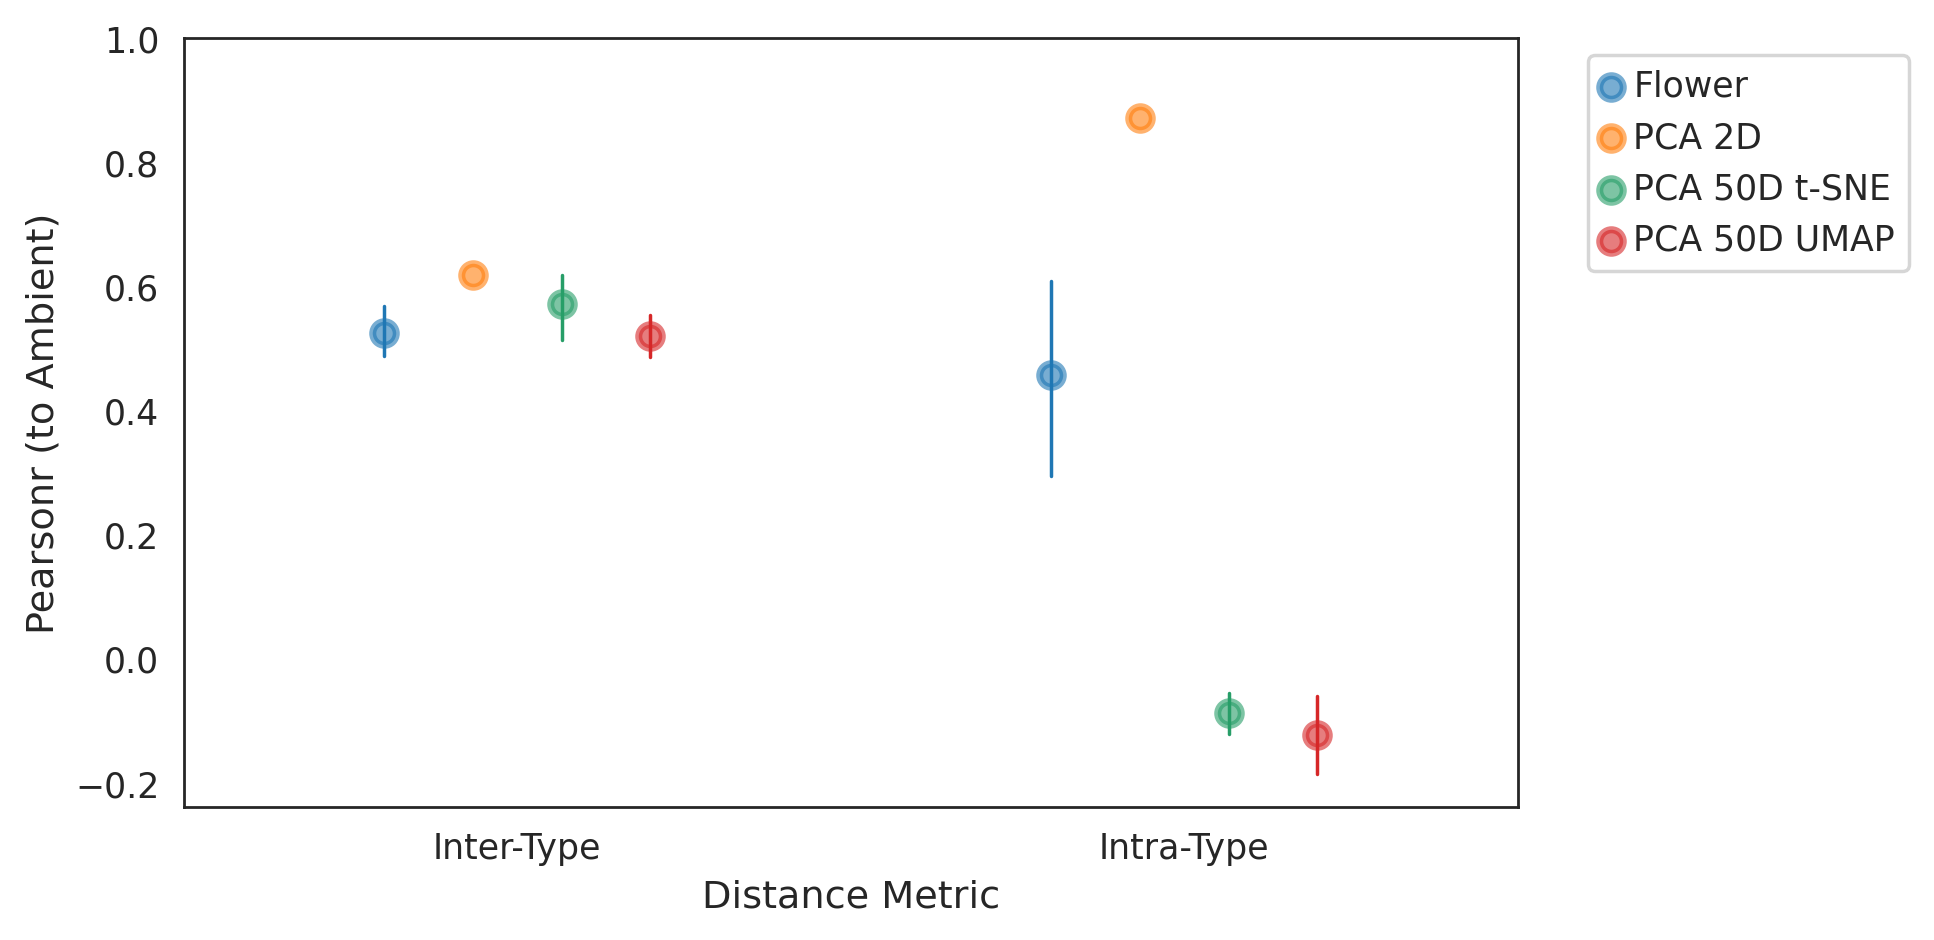

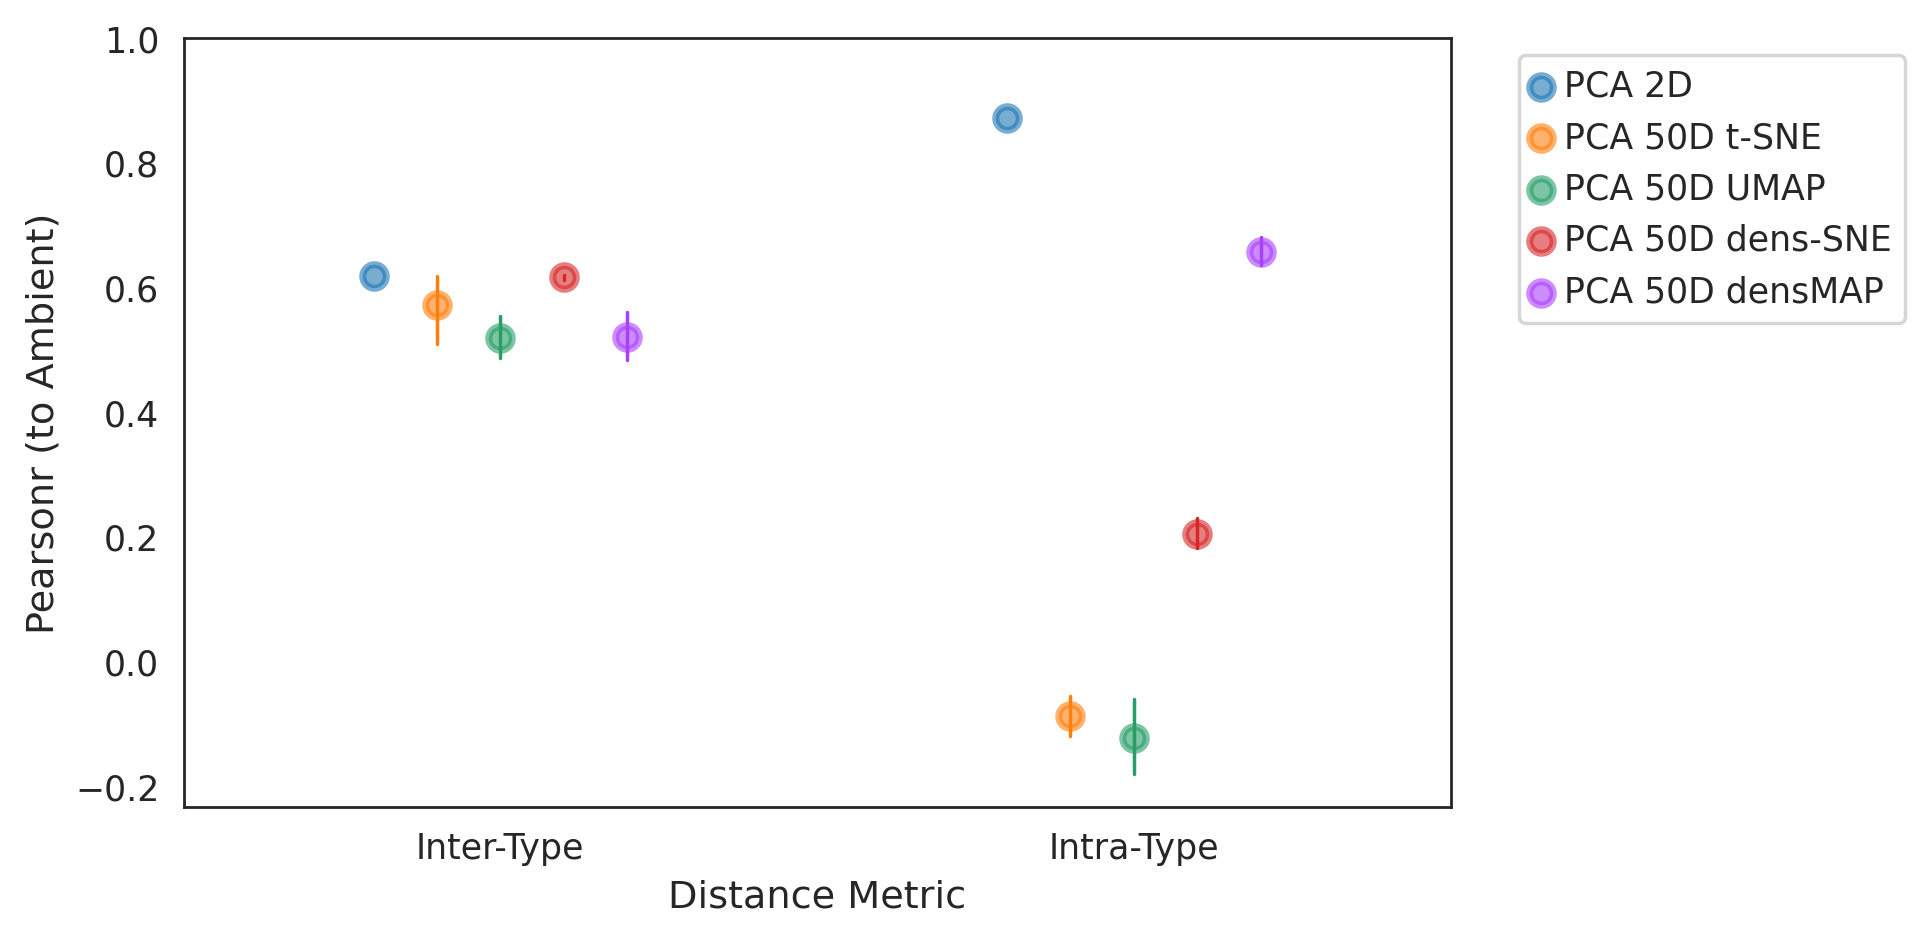

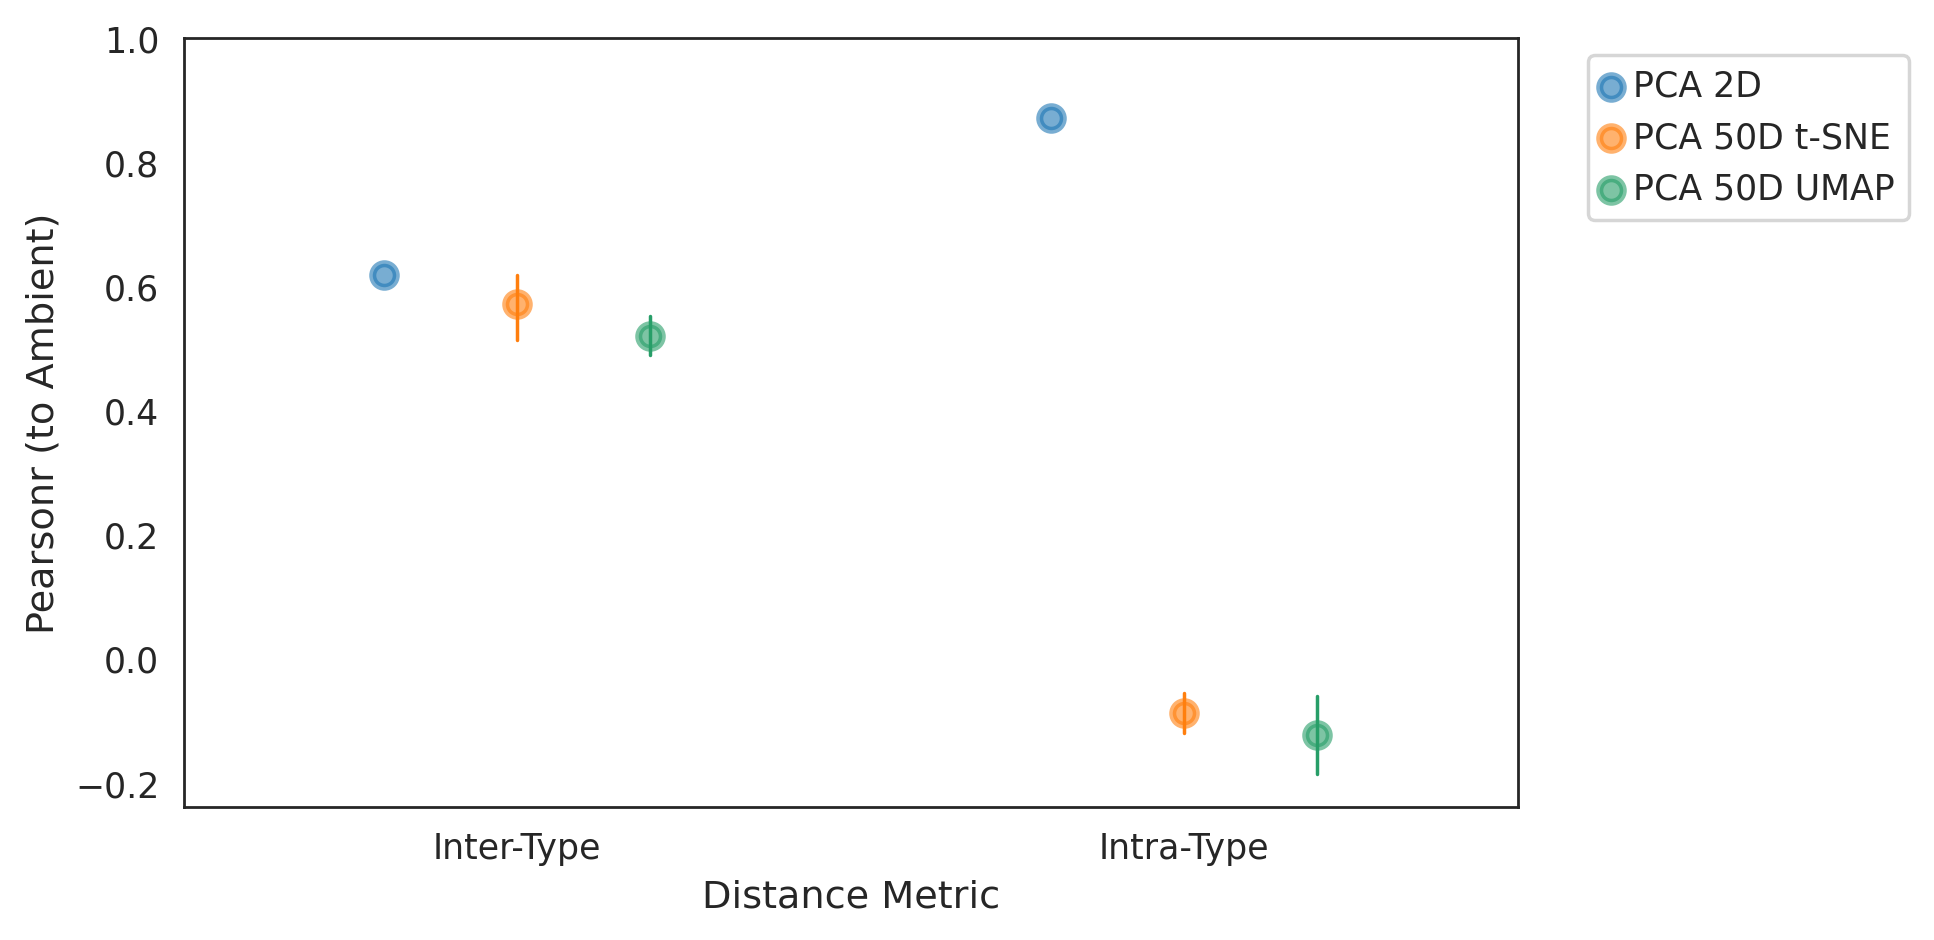

In [ ]:
#merfish

vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Flower','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Flower','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Map','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Map','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Flower','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)
vis.plotLatentStats(merCorrs[~merCorrs['Latent'].isin(['Elephant','Flower','PCA 50D dens-SNE','PCA 50D densMAP','PCA 50D'])], axisFontSize = 11, tickFontSize = 10,ymax=1)

### **Distortion Plots in High and Low Dimensions**
Coupled and non-coupled PCA/t-SNE/UMAP

#### **Equidistant Distortion Metrics**

In [ ]:
def printInfo(res):
  all = np.unique(res.Embed)
  sub = res[res['Embed'].isin(['Integrated-Scaled Ambient'])]
  ambVars = [sub['Vars'],sub['Ratio'],sub['RatioKNN']]
  for i in all:
    #Max var / ambient var
    calc = res[res['Embed'].isin([i])]
    max = np.max(calc['Vars'])/ambVars[0]
    print(i+' var max: '+str(max))
    #Min var / ambient var
    min = np.min(calc['Vars'])/ambVars[0]
    print(i+' var min: '+str(min))


    #Max ratio / ambient ratio
    calc = res[res['Embed'].isin([i])]
    max = np.max(calc['Ratio'])/ambVars[1]
    print(i+' ratio max: '+str(max))
    #Min ratio / ambient ratio
    min = np.min(calc['Ratio'])/ambVars[1]
    print(i+' ratio min: '+str(min))


    #Max ratio / ambient ratio
    calc = res[res['Embed'].isin([i])]
    max = np.max(calc['RatioKNN'])/ambVars[2]
    print(i+' ratio knn max: '+str(max))
    #Min ratio / ambient ratio
    min = np.min(calc['RatioKNN'])/ambVars[2]
    print(i+' ratio knn min: '+str(min))
      

In [ ]:
tenxEq = pd.read_csv(data_path+'/distort10x.csv')
tenxEq.head()

Unnamed: 0      Vars          Embed   LogVars       Ratio   RatioKNN
0           0  0.520093        PCA 15D -0.653747    3.052037   2.347171
1           1  6.896855  PCA 15D t-SNE  1.931066  168.707474  58.069157
2           2  1.194494   PCA 15D UMAP  0.177722   64.328323  24.159710
3           3  0.490751        PCA 50D -0.711819    2.210660   1.758959
4           4  7.283585  PCA 50D t-SNE  1.985623  267.815613  50.184299

In [ ]:
printInfo(tenxEq)

Integrated-Scaled Ambient var max: 36    1.0
Name: Vars, dtype: float64
Integrated-Scaled Ambient var min: 36    1.0
Name: Vars, dtype: float64
Integrated-Scaled Ambient ratio max: 36    1.0
Name: Ratio, dtype: float64
Integrated-Scaled Ambient ratio min: 36    1.0
Name: Ratio, dtype: float64
Integrated-Scaled Ambient ratio knn max: 36    1.0
Name: RatioKNN, dtype: float64
Integrated-Scaled Ambient ratio knn min: 36    1.0
Name: RatioKNN, dtype: float64
PCA 100D var max: 36    53.010008
Name: Vars, dtype: float64
PCA 100D var min: 36    47.373412
Name: Vars, dtype: float64
PCA 100D ratio max: 36    2.106364
Name: Ratio, dtype: float64
PCA 100D ratio min: 36    2.062468
Name: Ratio, dtype: float64
PCA 100D ratio knn max: 36    1.432634
Name: RatioKNN, dtype: float64
PCA 100D ratio knn min: 36    1.395028
Name: RatioKNN, dtype: float64
PCA 100D UMAP var max: 36    95.808806
Name: Vars, dtype: float64
PCA 100D UMAP var min: 36    36.290619
Name: Vars, dtype: float64
PCA 100D UMAP ratio ma

In [ ]:
tenxEq['Embed'] = [i.replace('Integrated-Scaled Ambient','Ambient') for i in tenxEq['Embed']]

Utero E10.5 data

In [ ]:
uteroEq = pd.read_csv(data_path+'/distortUtE105.csv')
uteroEq.head()

Unnamed: 0       Vars          Embed   LogVars      Ratio   RatioKNN
0           0   0.925687        PCA 15D -0.077220   4.548433   2.829278
1           1  10.702757  PCA 15D t-SNE  2.370501  34.443367  24.944498
2           2   0.564349   PCA 15D UMAP -0.572082  23.493973  20.979410
3           3   0.644038        PCA 50D -0.439997   2.512758   2.560746
4           4   2.847382  PCA 50D t-SNE  1.046400  17.828094  23.102537

In [ ]:
printInfo(uteroEq)

Integrated-Scaled Ambient var max: 36    1.0
Name: Vars, dtype: float64
Integrated-Scaled Ambient var min: 36    1.0
Name: Vars, dtype: float64
Integrated-Scaled Ambient ratio max: 36    1.0
Name: Ratio, dtype: float64
Integrated-Scaled Ambient ratio min: 36    1.0
Name: Ratio, dtype: float64
Integrated-Scaled Ambient ratio knn max: 36    1.0
Name: RatioKNN, dtype: float64
Integrated-Scaled Ambient ratio knn min: 36    1.0
Name: RatioKNN, dtype: float64
PCA 100D var max: 36    128.696118
Name: Vars, dtype: float64
PCA 100D var min: 36    126.713819
Name: Vars, dtype: float64
PCA 100D ratio max: 36    1.860791
Name: Ratio, dtype: float64
PCA 100D ratio min: 36    1.849065
Name: Ratio, dtype: float64
PCA 100D ratio knn max: 36    0.856094
Name: RatioKNN, dtype: float64
PCA 100D ratio knn min: 36    0.849575
Name: RatioKNN, dtype: float64
PCA 100D UMAP var max: 36    469.98487
Name: Vars, dtype: float64
PCA 100D UMAP var min: 36    161.091842
Name: Vars, dtype: float64
PCA 100D UMAP ratio

In [ ]:
uteroEq['Embed'] = [i.replace('Integrated-Scaled Ambient','Ambient') for i in uteroEq['Embed']]

In [ ]:
def plotLatentDistorts(ax,allVals, x ,y,hue, xlab='',ylab='',title='', axisFontSize = 11, tickFontSize = 10, errwidth=1, figsize =(8,4), dodge=0.4, fname = None, ymin = 0):
  """ Plot equidstant distortion plots """

  #plt.figure(figsize=figsize)
  g=sns.pointplot(x=x, y=y, data=allVals, hue=hue, err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=errwidth, dodge=dodge,ax=ax)
  plt.setp(g.collections, alpha=.6) #for the markers
  g.legend(prop={"size":8})

  g.set_xlabel(xlab,fontsize=axisFontSize)
  g.set_ylabel(ylab,fontsize=axisFontSize)
  g.set_title(title,fontsize=axisFontSize)

  g.tick_params(labelsize=tickFontSize)


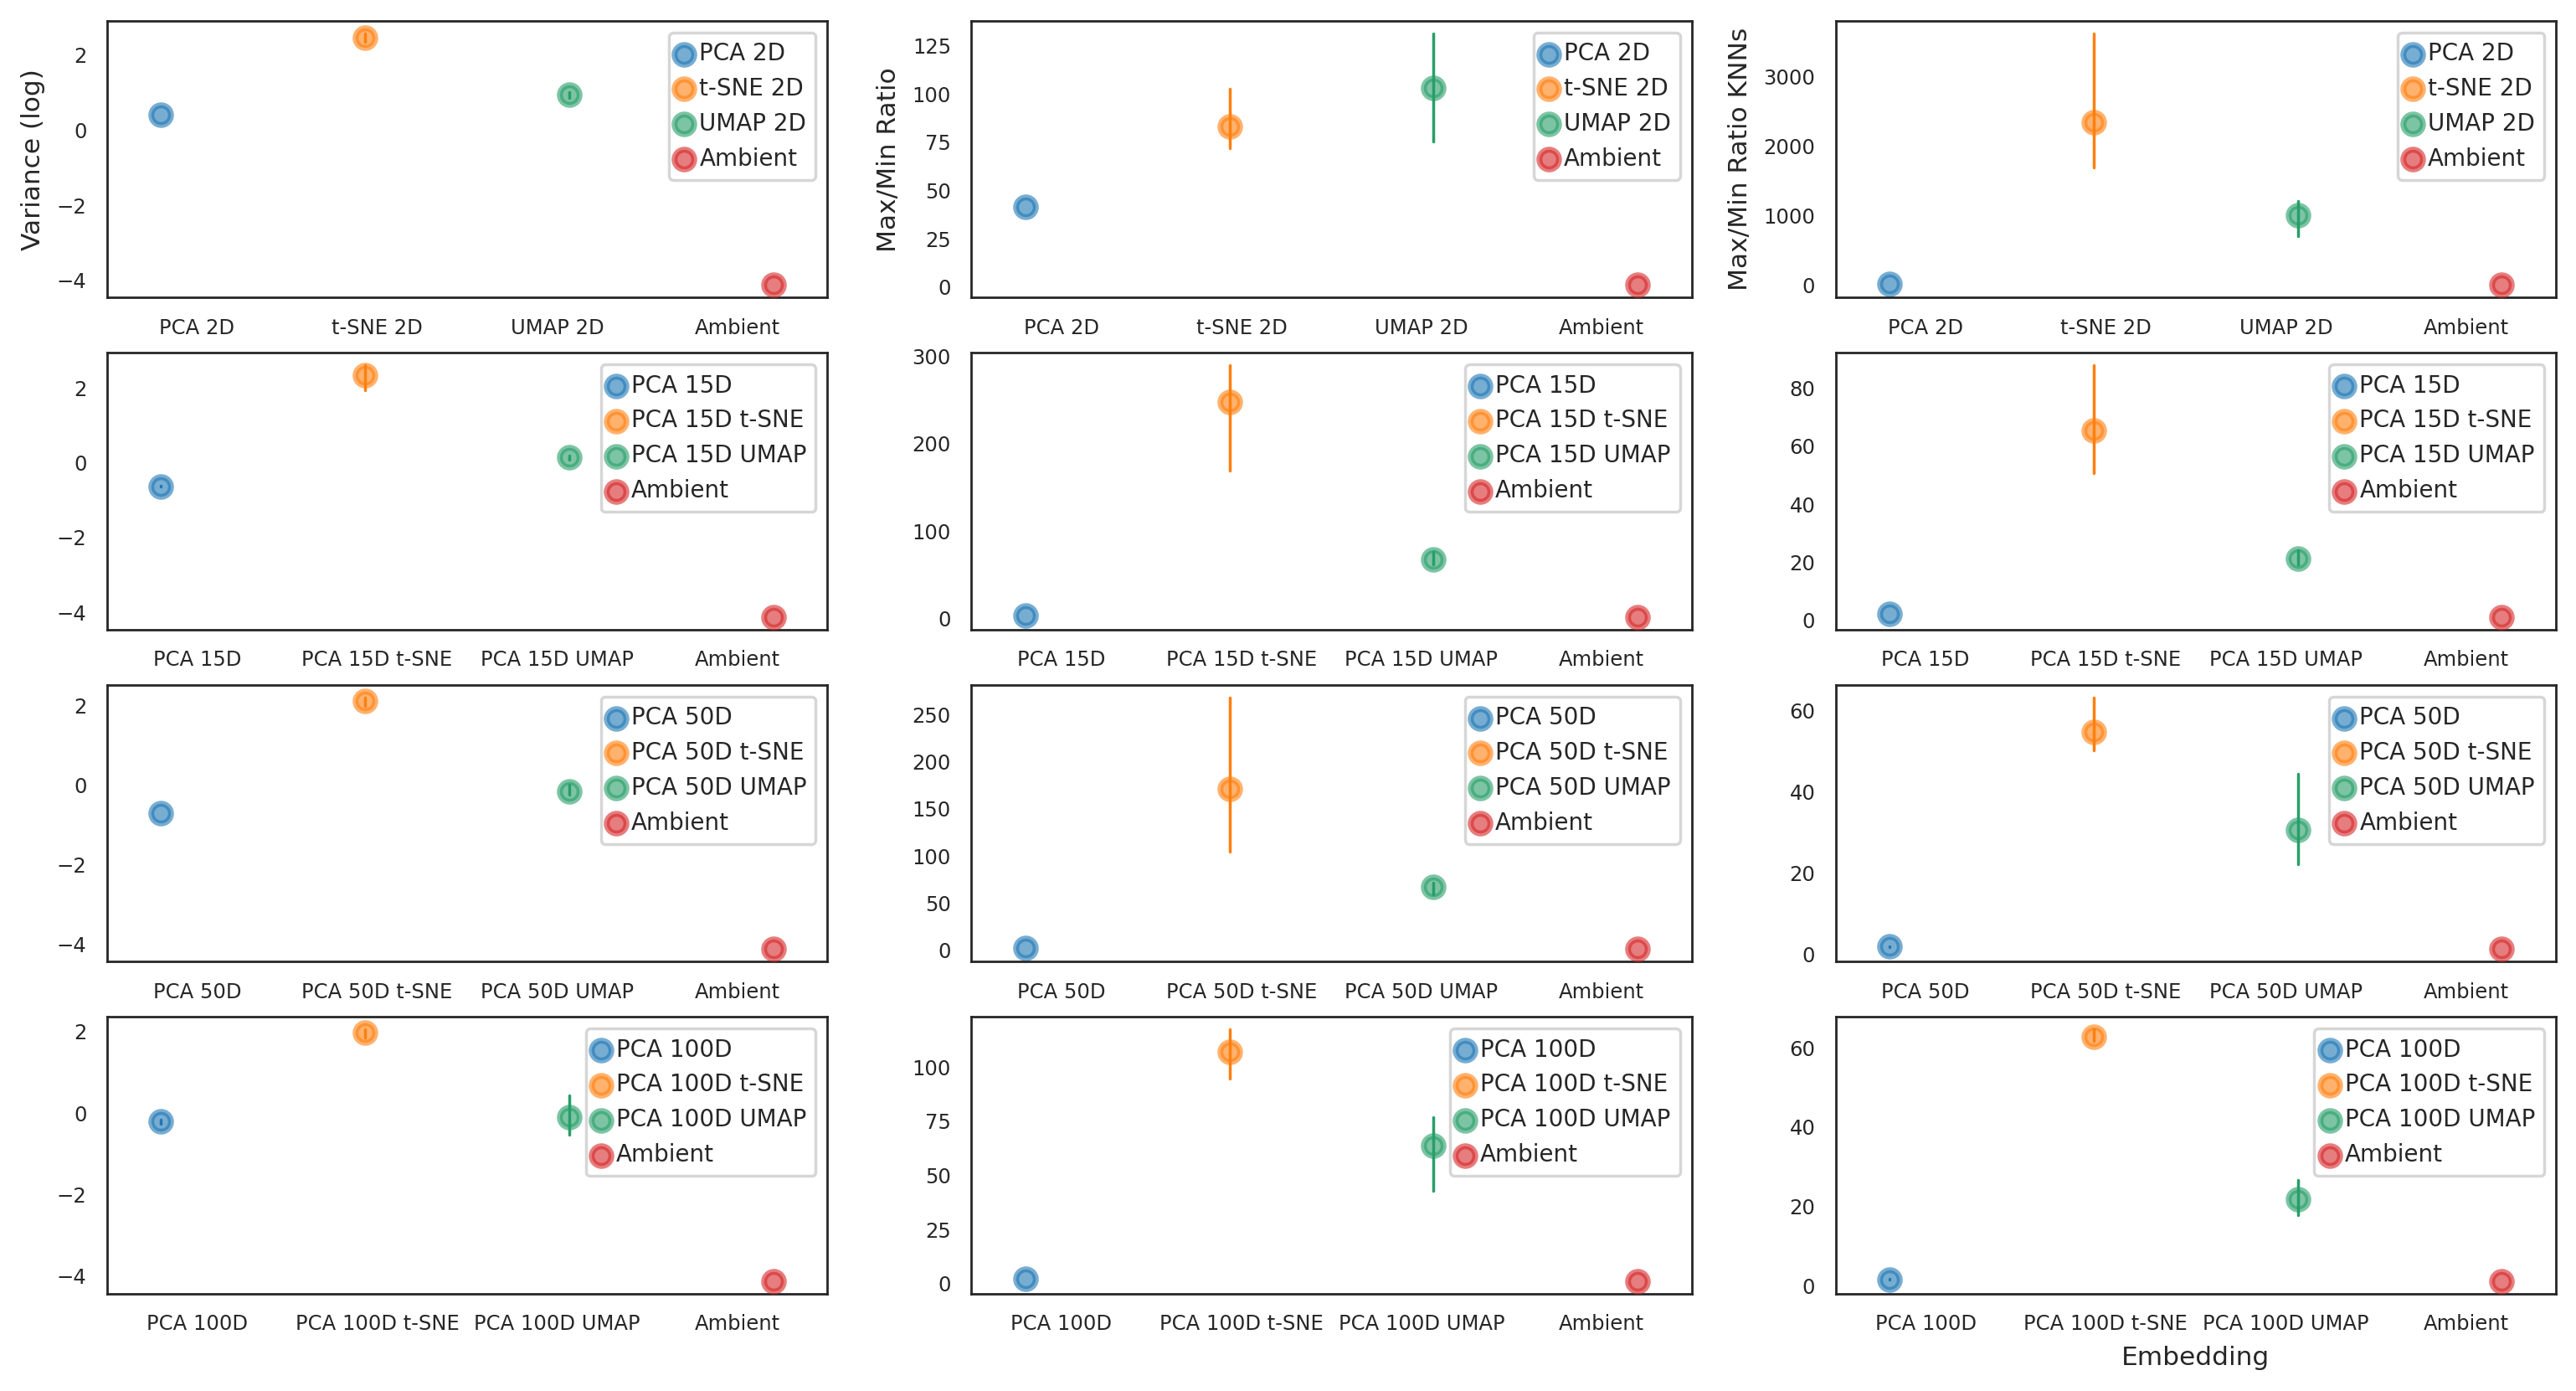

In [ ]:
#tenx plots

fig, ax = plt.subplots(nrows=4, ncols=3,figsize=(15,8))
rows = ['LogVars','Ratio','RatioKNN']
rowNames = ['Variance (log)','Max/Min Ratio','Max/Min Ratio KNNs']
cols = ['2D','15D','50D','100D']

for i in range(len(rows)):

  for j in range(len(cols)):

    colInds = [cols[j] in i or 'Ambient' in i for i in tenxEq['Embed']]
    sub = tenxEq[colInds]


    if j == 0 :
      title = rowNames[i]
    else:
      title = ''

    if j == 3  and i == 2:
      xlab = 'Embedding'
    else:
      xlab = ''
    plotLatentDistorts(ax[j,i],sub,'Embed' ,rows[i],'Embed',xlab = xlab,ylab=title,axisFontSize = 9,tickFontSize = 7)




#plt.xticks(fontsize=5)
plt.show()

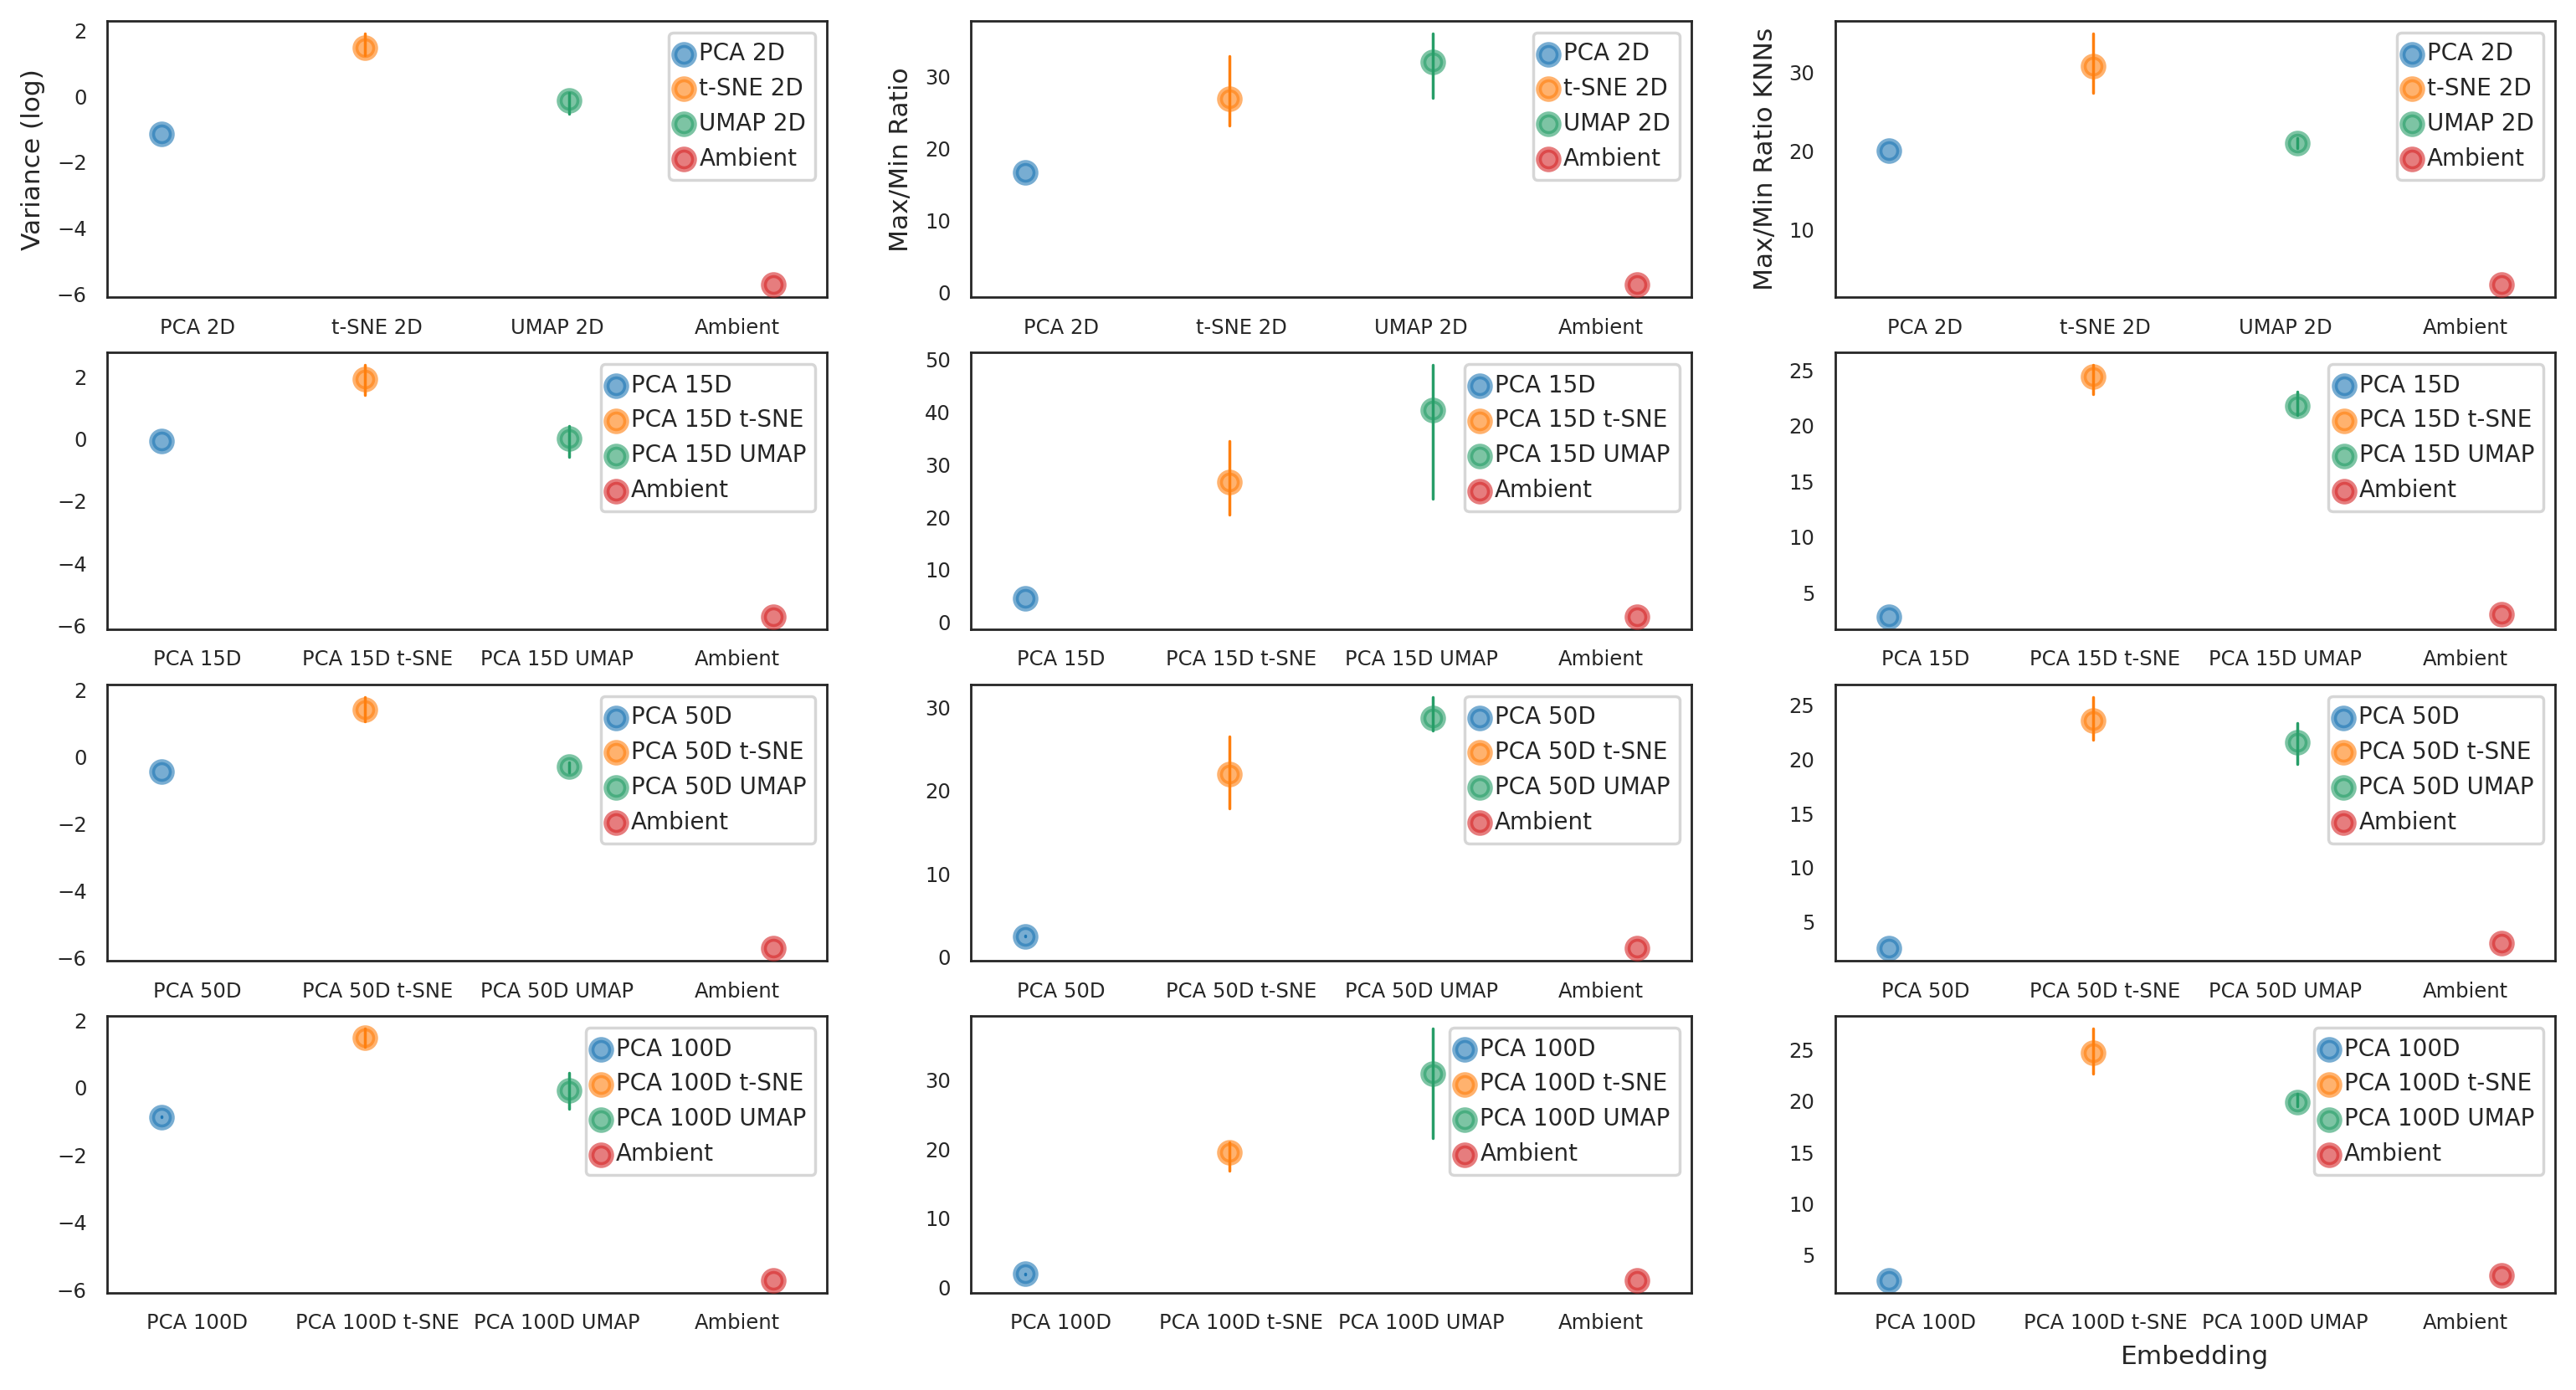

In [ ]:
#utero plots

fig, ax = plt.subplots(nrows=4, ncols=3,figsize=(15,8))
rows = ['LogVars','Ratio','RatioKNN']
rowNames = ['Variance (log)','Max/Min Ratio','Max/Min Ratio KNNs']
cols = ['2D','15D','50D','100D']

for i in range(len(rows)):

  for j in range(len(cols)):

    colInds = [cols[j] in i or 'Ambient' in i for i in uteroEq['Embed']]
    sub = uteroEq[colInds]


    if j == 0 :
      title = rowNames[i]
    else:
      title = ''

    if j == 3  and i == 2:
      xlab = 'Embedding'
    else:
      xlab = ''
    plotLatentDistorts(ax[j,i],sub,'Embed' ,rows[i],'Embed',xlab = xlab,ylab=title,axisFontSize = 9,tickFontSize = 7)




#plt.xticks(fontsize=5)
plt.show()

#### **KNN Jaccard Distances for Latent Spaces**

For each datasets plot jaccard distance histograms for 30 NNs (with respect to ambient)

In [8]:
exAmb = pd.read_csv(data_path+'/exAmb.csv')
exPCAAmb = pd.read_csv(data_path+'/exPCAAmb.csv')

merAmb = pd.read_csv(data_path+'/merAmb.csv')
merPCAAmb = pd.read_csv(data_path+'/merPCAAmb.csv')

tenxAmb = pd.read_csv(data_path+'/tenxAmb.csv')
tenxPCAAmb = pd.read_csv(data_path+'/tenxPCAAmb.csv')

smartAmb = pd.read_csv(data_path+'/smartAmb.csv')
smartPCAAmb = pd.read_csv(data_path+'/smartPCAAmb.csv')

tenxAmb.head()

Unnamed: 0         x   latent
0           0  0.909091  PCA 15D
1           1  0.867925  PCA 15D
2           2  0.947368  PCA 15D
3           3  0.846154  PCA 15D
4           4  0.983051  PCA 15D

In [9]:
exPicAmb = pd.read_csv(data_path+'/uteroPicAmb.csv')


merPicAmb = pd.read_csv(data_path+'/merPicAmb.csv')


#tenxPicAmb = pd.read_csv(data_path+'/tenxAmb.csv')


smartPicAmb = pd.read_csv(data_path+'/smartPicAmb.csv')

In [10]:
exPicAmb.head()

Unnamed: 0         x  latent
0           0  0.965517  Flower
1           1  0.983051  Flower
2           2  0.947368  Flower
3           3  0.983051  Flower
4           4  0.928571  Flower

In [11]:
exAmb = pd.concat([exAmb,exPicAmb])
merAmb = pd.concat([merAmb,merPicAmb])
smartAmb = pd.concat([smartAmb,smartPicAmb])


In [12]:
tenxAmb.head()

Unnamed: 0         x   latent
0           0  0.909091  PCA 15D
1           1  0.867925  PCA 15D
2           2  0.947368  PCA 15D
3           3  0.846154  PCA 15D
4           4  0.983051  PCA 15D

In [13]:
np.unique(tenxAmb.latent)

array(['PCA 100D', 'PCA 100D UMAP', 'PCA 100D t-SNE', 'PCA 15D',
       'PCA 15D UMAP', 'PCA 15D t-SNE', 'PCA 2D', 'PCA 50D',
       'PCA 50D UMAP', 'PCA 50D t-SNE', 'UMAP 2D', 't-SNE 2D'],
      dtype=object)

In [14]:
def plotHists(ax,allVals, x ,hue, xlab='',ylab='',title='', axisFontSize = 11, tickFontSize = 10):
  """ Plot histograms for jaccard distances of nearest neighbors """

  #plt.figure(figsize=figsize)
  #g=sns.ecdfplot(data=allVals, x=x, hue=hue,legend=True,ax=ax) #stat='probability', kde=True,edgecolor="white"
  g=sns.kdeplot(data=allVals, x=x, hue=hue,fill=True,alpha=.5,legend=True,ax=ax)

# sns.kdeplot(
#    data=tips, x="total_bill", hue="size",
#    fill=True, common_norm=False, palette="crest",
#    alpha=.5, linewidth=0,
# )
  #g=sns.displot(data=allVals, x=x, kde=True, hue=hue,edgecolor="white",legend=True,ax=ax) #legend=False

  g.legend(handles=ax.legend_.legendHandles, labels=[t.get_text() for t in ax.legend_.texts],prop={"size":9},loc='upper left')

  g.set_xlim(xmin=0,xmax=1)

  g.set_xlabel(xlab,fontsize=axisFontSize)
  g.set_ylabel(ylab,fontsize=axisFontSize)
  g.set_title(title,fontsize=axisFontSize)

  g.tick_params(labelsize=tickFontSize)

  g.spines['right'].set_visible(False)
  g.spines['top'].set_visible(False)


In [15]:
#utero plots

def plotAmb(amb,ambPCA):
  fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(6,8))
  rows = ['2D','15D','50D','100D']
  #colNames = ['Variance (log)','Max/Min Ratio','Max/Min Ratio KNNs']
  #cols = ['LogVars','Ratio','RatioKNN']


  for i in range(len(rows)):
    if rows[i] == '2D':
      rowInds = [rows[i] in x or 'Elephant' in x or 'Flower' in x for x in amb['latent']]
      sub = amb[rowInds]
    else:
      rowInds = [rows[i] in x for x in amb['latent']]
      sub = amb[rowInds]

    rowInds = [rows[i] in x for x in ambPCA['latent']]
    subPCA = ambPCA[rowInds]


    if i == 0:
      ylab = 'eCDF'
    else:
      ylab= ''

    if i == 3:
      xlab = 'Jaccard Distance (n=30 NNs)'
    else:
      xlab = ''
    
    plotHists(ax[i,0],sub,'x' ,'latent',ylab=ylab,axisFontSize = 9,tickFontSize = 8)
    if i != 0:
      plotHists(ax[i,1],subPCA,'x' ,'latent',xlab=xlab,axisFontSize = 9,tickFontSize = 8)
    else:
      plotHists(ax[i,1],sub,'x' ,'latent',axisFontSize = 9,tickFontSize = 8)




  #plt.xticks(fontsize=5)
  plt.show()

In [16]:
def printAvgs(amb):
  '''Print avgs of all latent spaces for each dataset'''
  l = np.unique(amb.latent)
  d = {}
  for i in l:
    sub = amb[amb['latent'].isin([i])]
    avg = np.mean(sub['x'])
    d[i] = avg

  return d

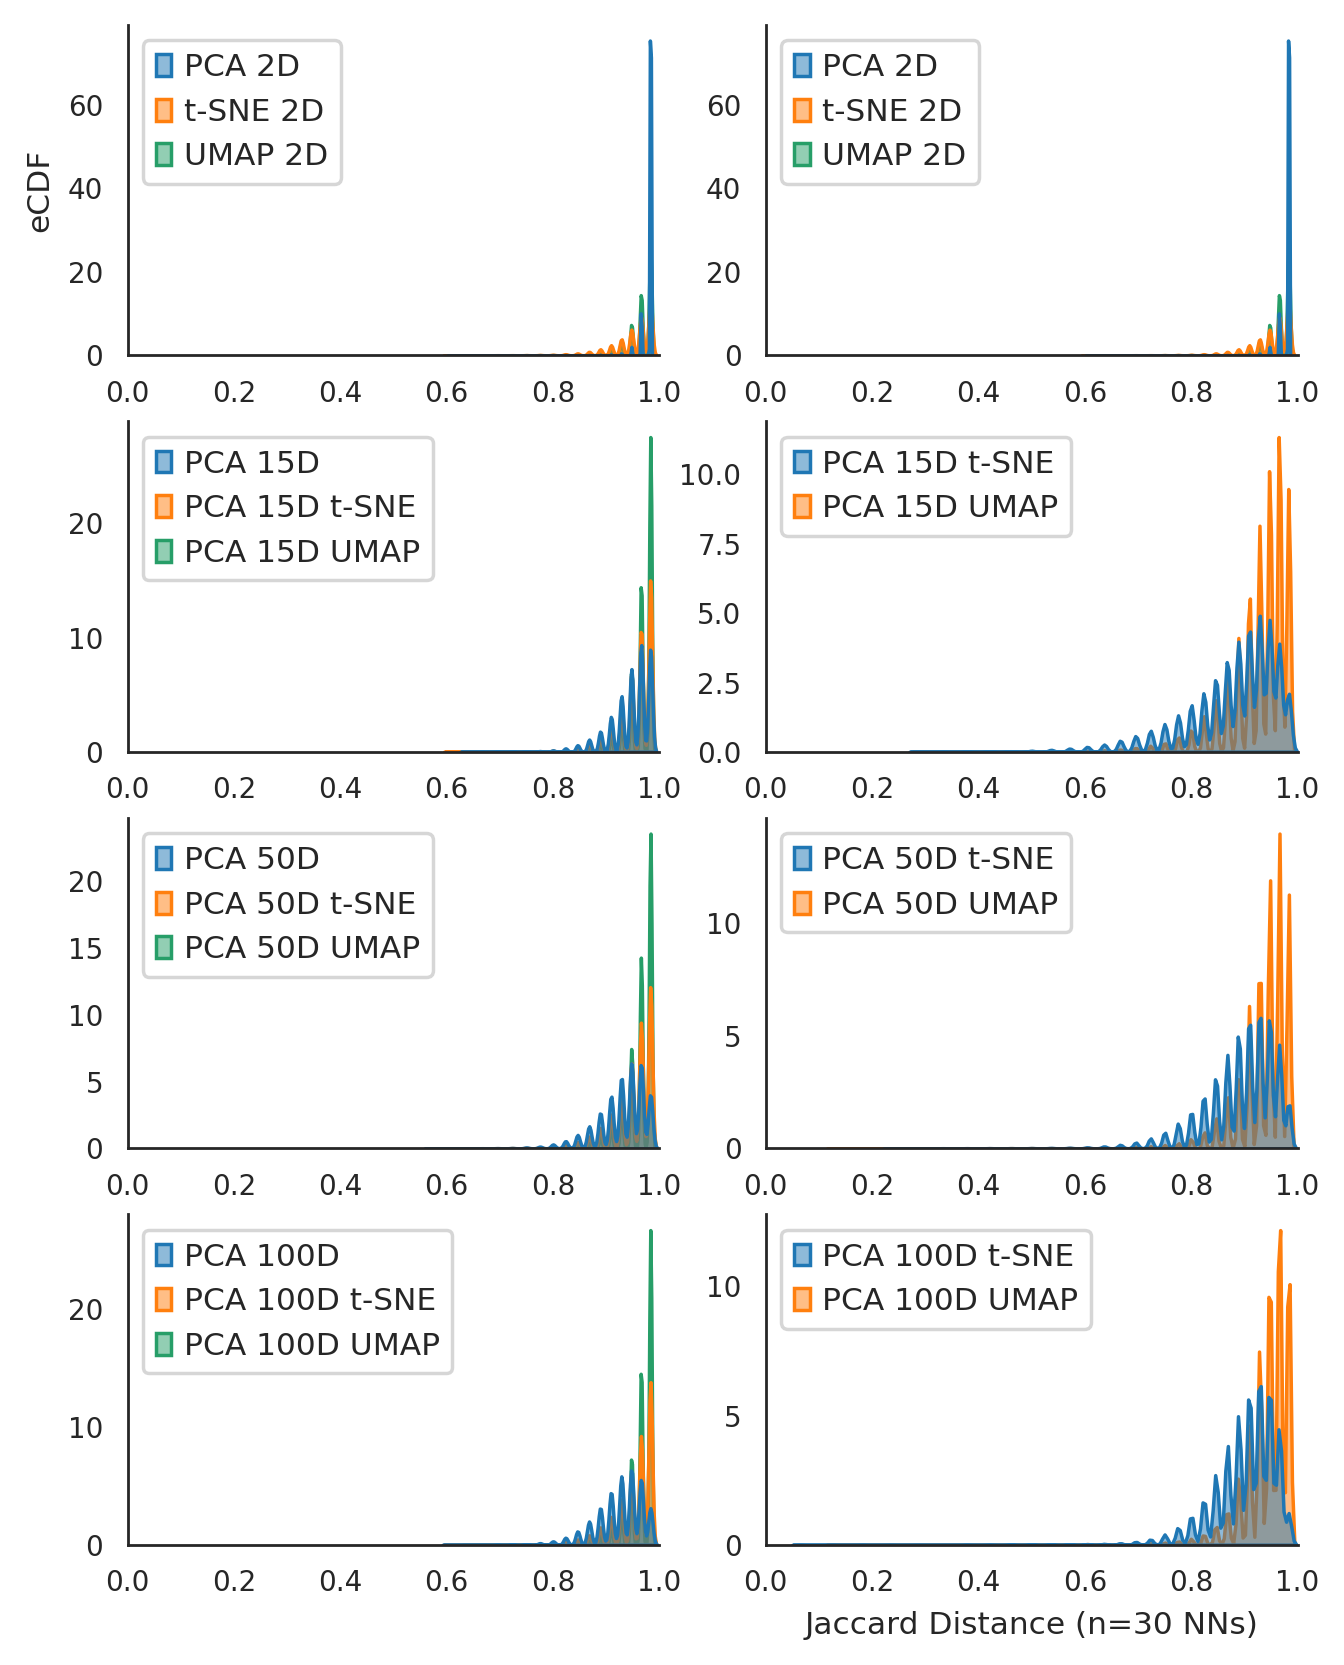

In [19]:
#tenx data
plotAmb(tenxAmb,tenxPCAAmb)


In [ ]:
print(printAvgs(tenxAmb))
print(printAvgs(tenxPCAAmb))

{'PCA 100D': 0.9263511770208019, 'PCA 100D UMAP': 0.9650419307477938, 'PCA 100D t-SNE': 0.9532356570883572, 'PCA 15D': 0.9461652634863537, 'PCA 15D UMAP': 0.9656520871790255, 'PCA 15D t-SNE': 0.9556768218158441, 'PCA 2D': 0.9801586197346489, 'PCA 50D': 0.9308952265886912, 'PCA 50D UMAP': 0.9633310926900074, 'PCA 50D t-SNE': 0.9511600190995163, 'UMAP 2D': 0.9646146730262796, 't-SNE 2D': 0.9532483557675093}
{'PCA 100D UMAP': 0.9433650605650264, 'PCA 100D t-SNE': 0.902394075429988, 'PCA 15D UMAP': 0.9289745082178577, 'PCA 15D t-SNE': 0.8826832793461341, 'PCA 50D UMAP': 0.9373950438671322, 'PCA 50D t-SNE': 0.8953476640332102}


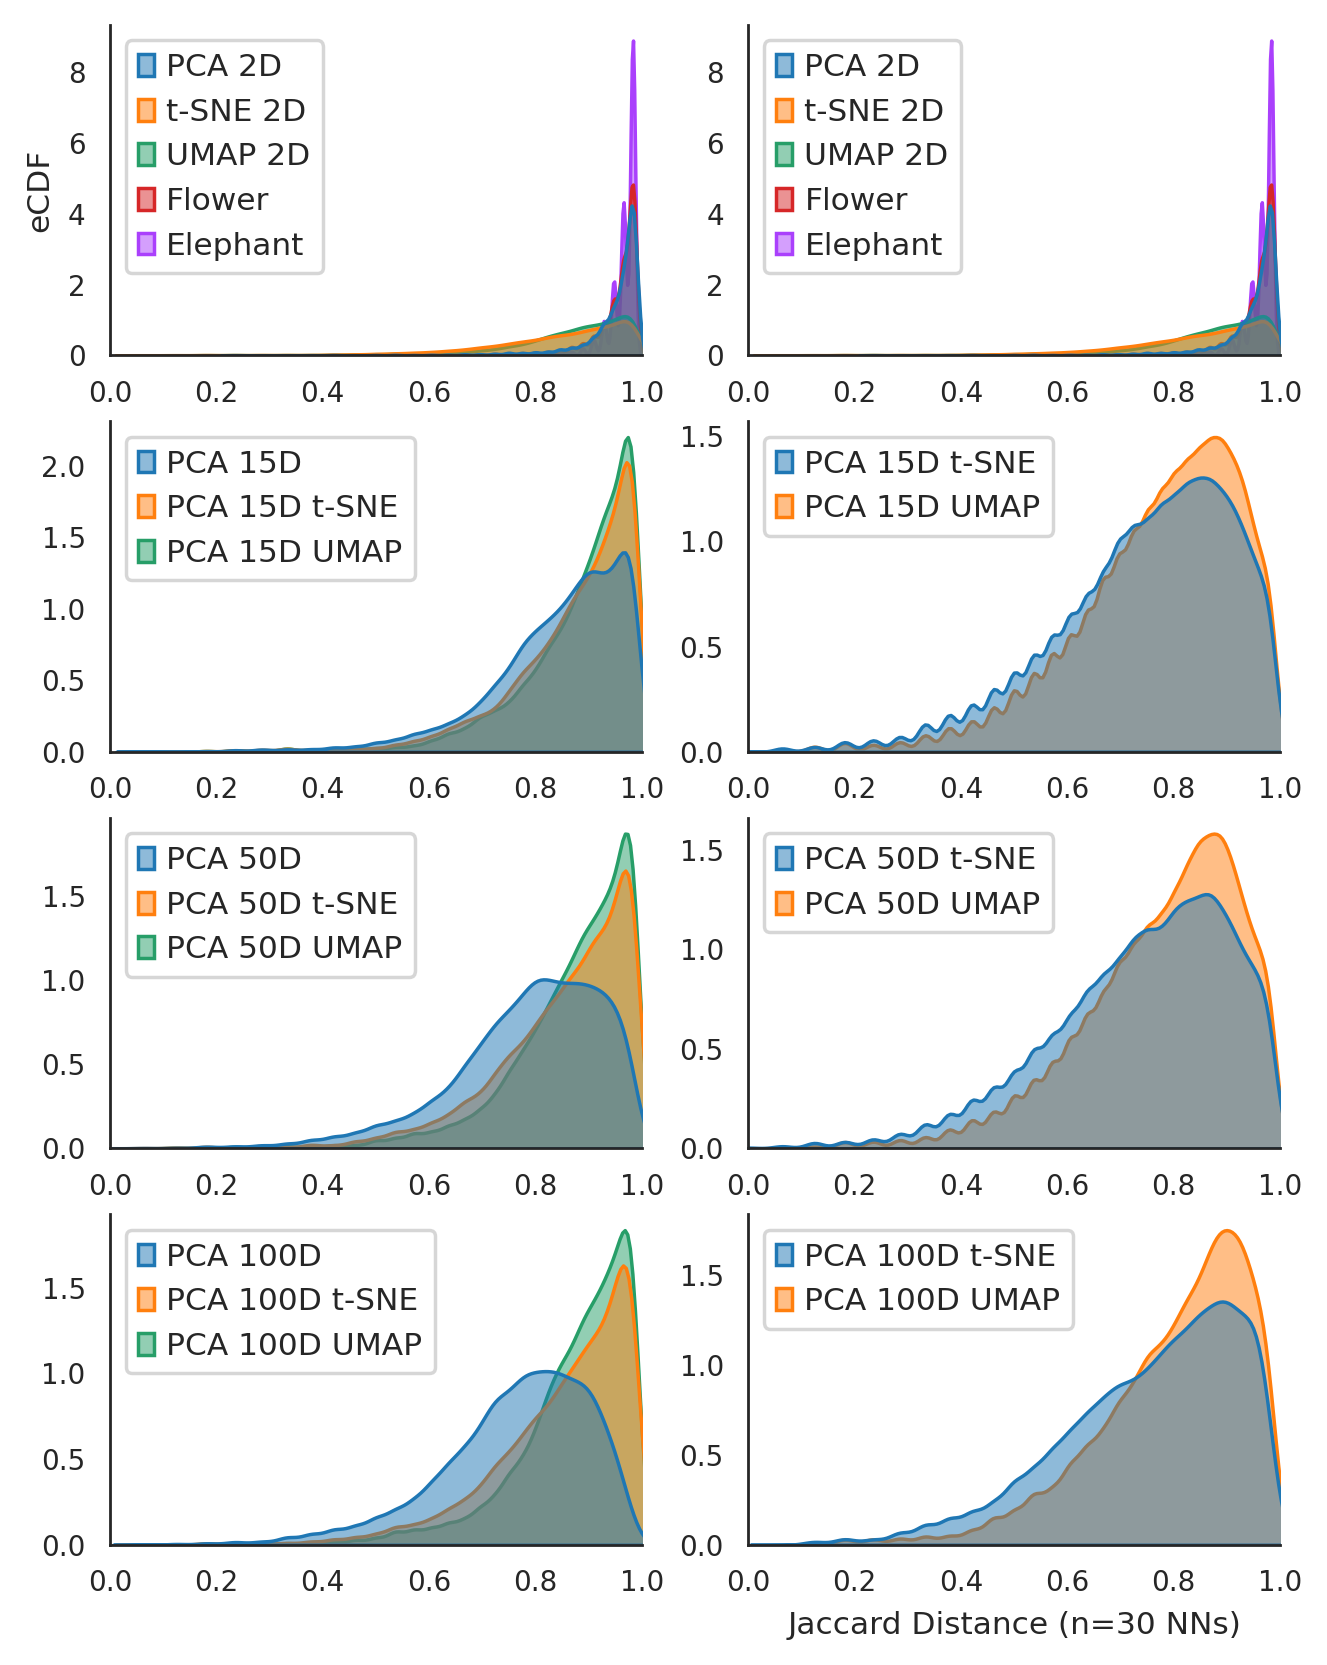

In [ ]:
#ex utero E8.5 data
plotAmb(exAmb,exPCAAmb)

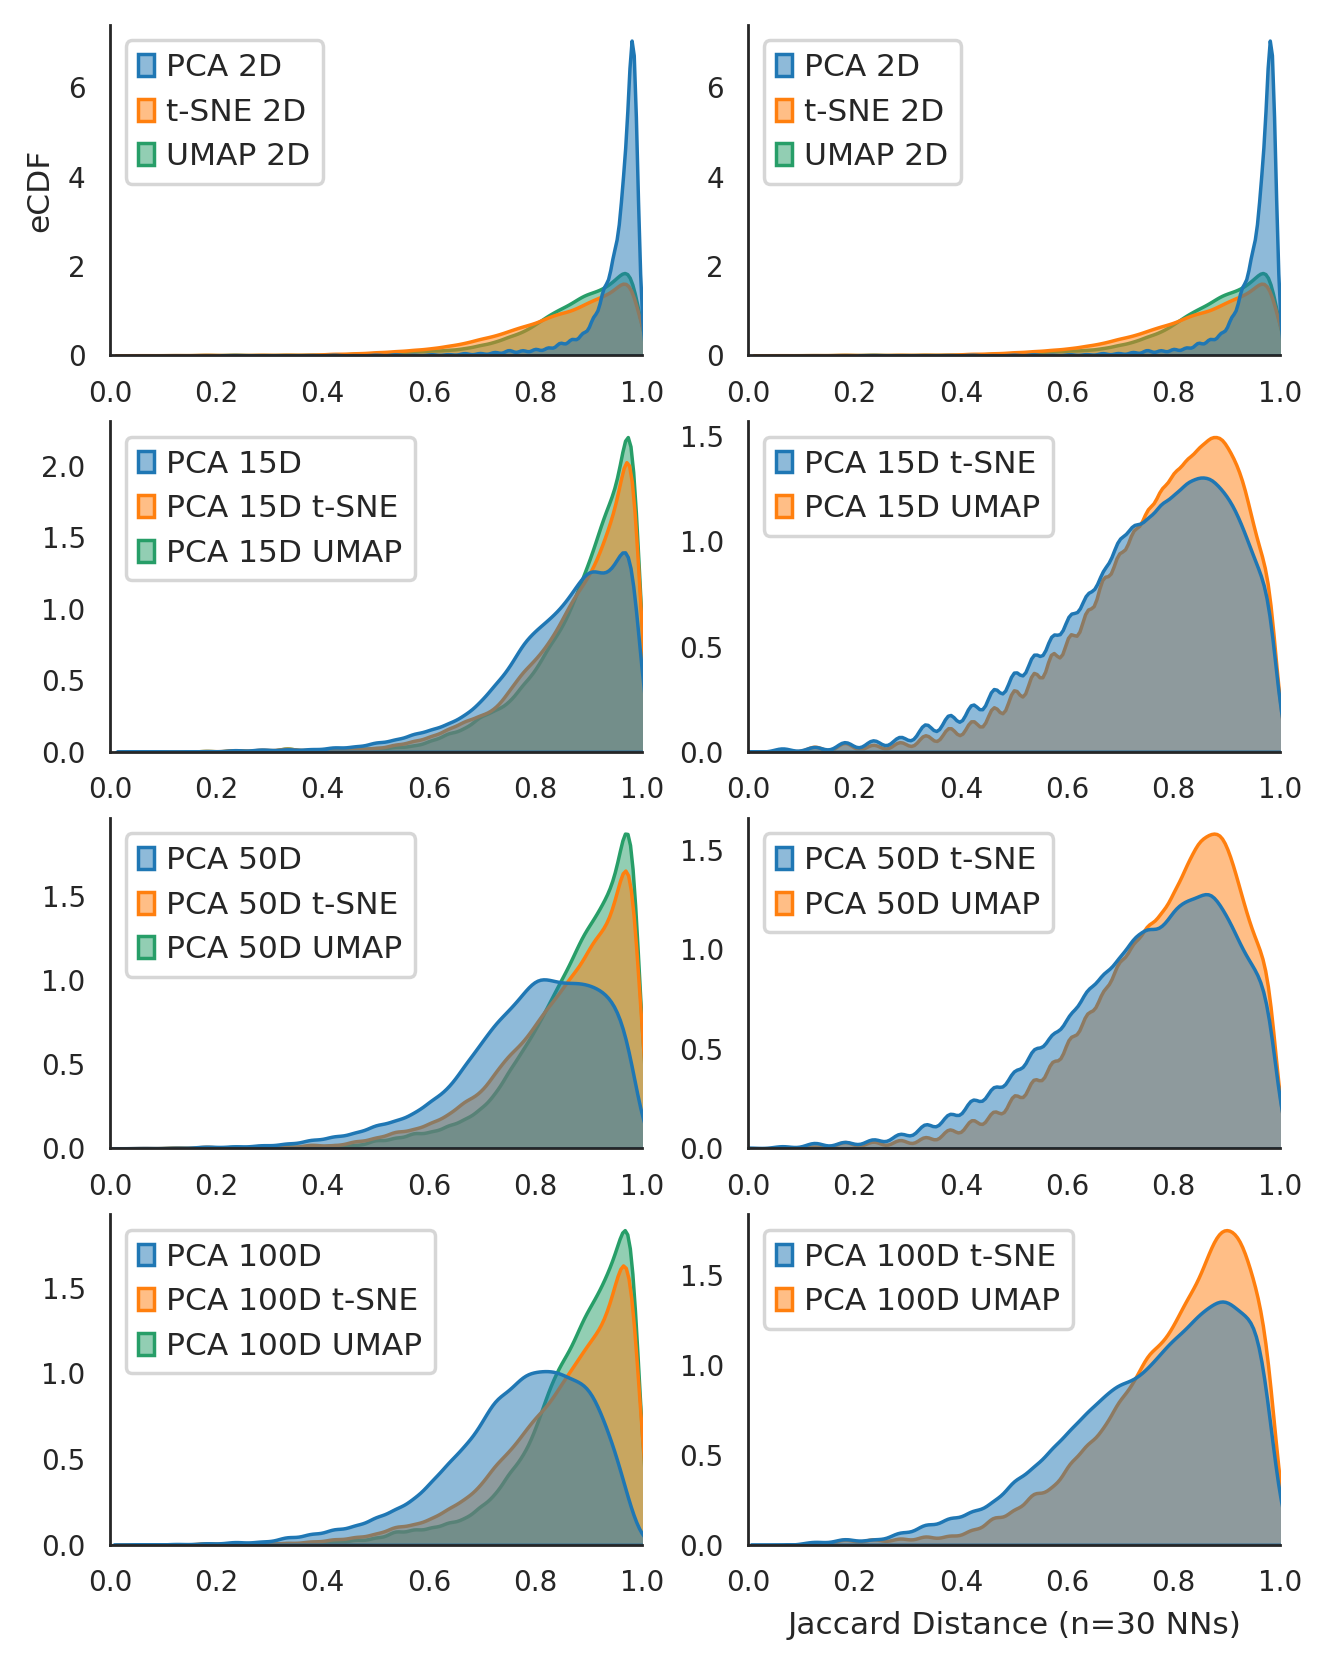

In [ ]:
plotAmb(exAmb[~exAmb.latent.isin(['Flower','Elephant'])],exPCAAmb[~exPCAAmb.latent.isin(['Flower','Elephant'])] ) 

In [ ]:
print(printAvgs(exAmb))
print(printAvgs(exPCAAmb))

{'Elephant': 0.9642969419475594, 'Flower': 0.9511561568220626, 'PCA 100D': 0.761142110135855, 'PCA 100D UMAP': 0.8679239173446025, 'PCA 100D t-SNE': 0.8464615382879859, 'PCA 15D': 0.8417286359158213, 'PCA 15D UMAP': 0.8799134111000806, 'PCA 15D t-SNE': 0.8698326687946615, 'PCA 2D': 0.9470200829707064, 'PCA 50D': 0.7864324947489758, 'PCA 50D UMAP': 0.8671790438070608, 'PCA 50D t-SNE': 0.8493378989486555, 'UMAP 2D': 0.8678109485168292, 't-SNE 2D': 0.8467203768491429}
{'PCA 100D UMAP': 0.7971241618263106, 'PCA 100D t-SNE': 0.7547226868564937, 'PCA 15D UMAP': 0.770424330159429, 'PCA 15D t-SNE': 0.7440923685525767, 'PCA 50D UMAP': 0.7755672884252244, 'PCA 50D t-SNE': 0.738974796996989}


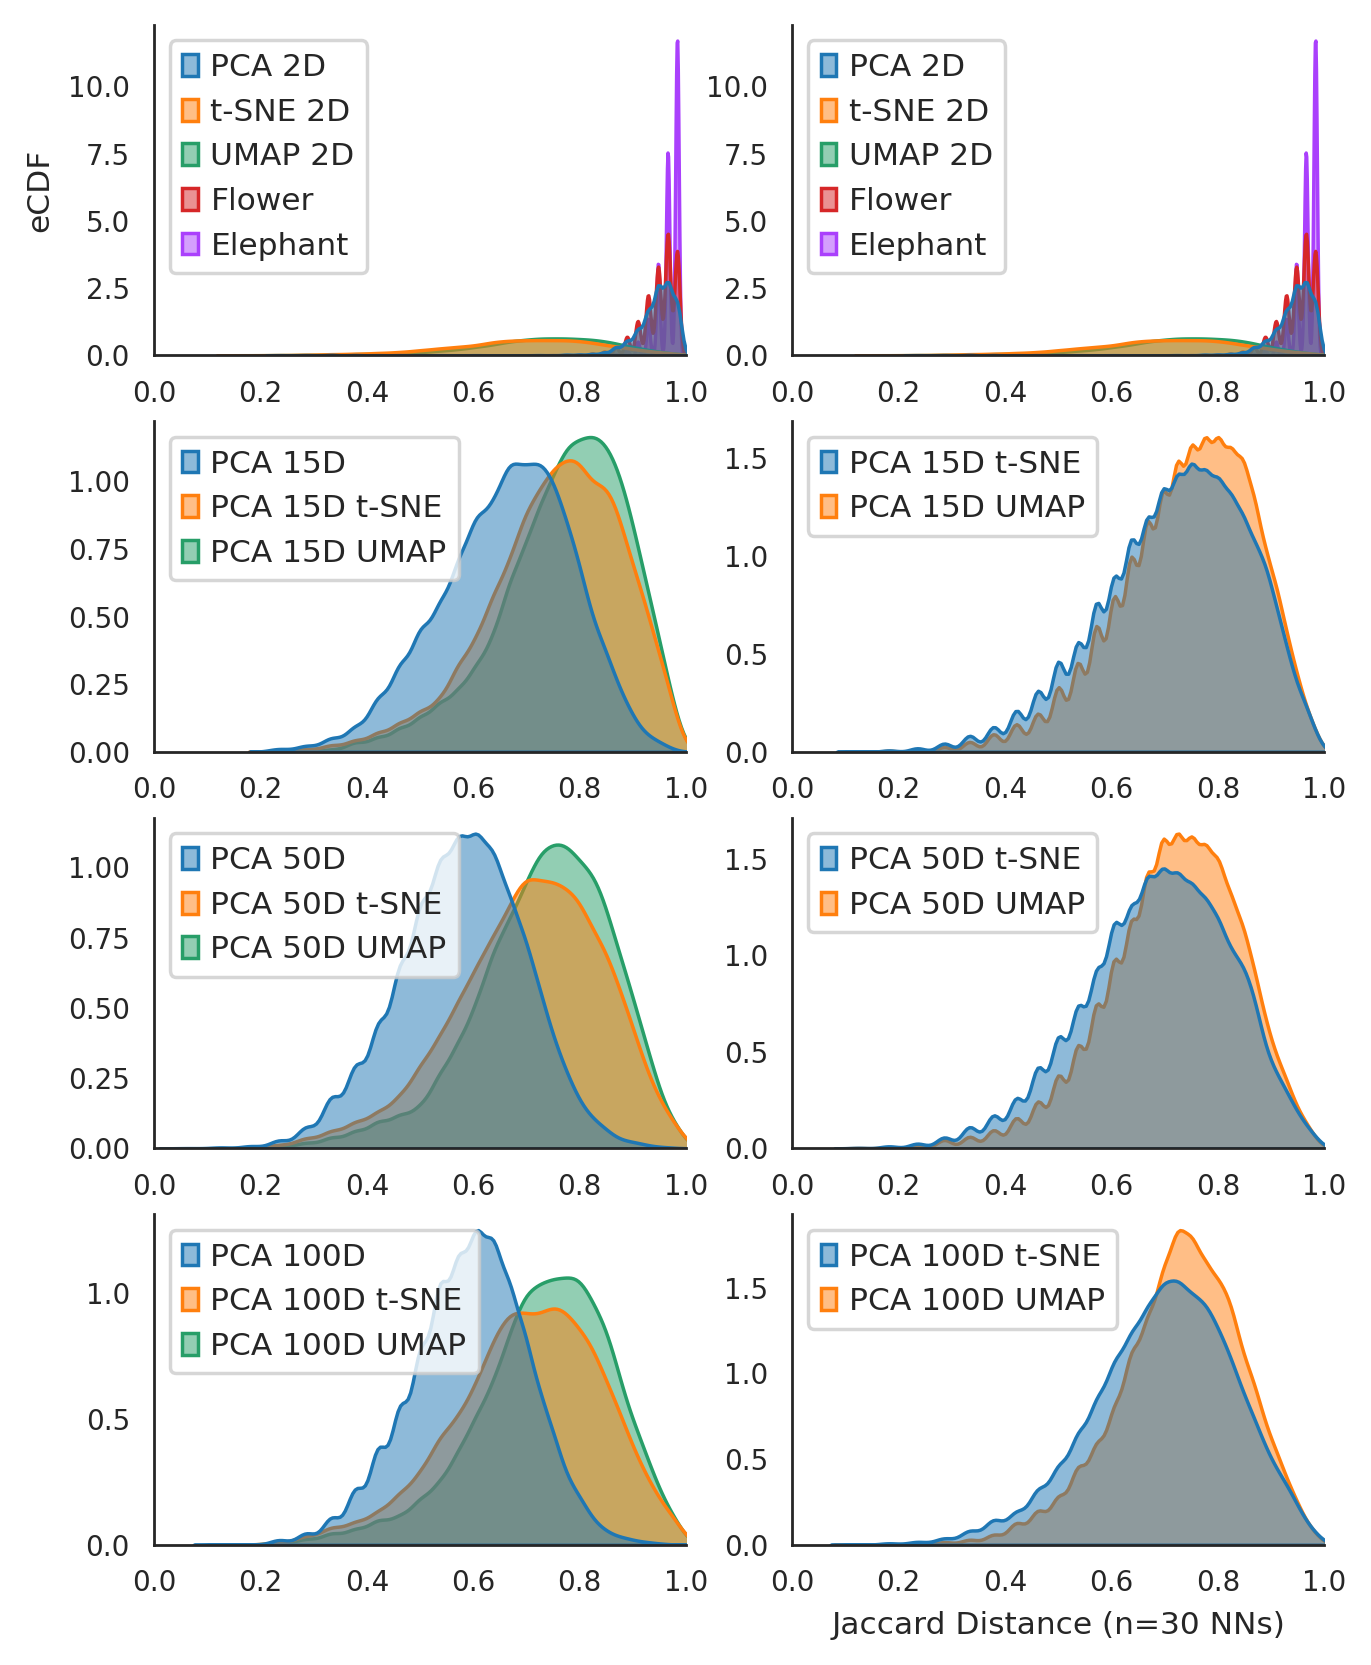

In [ ]:
#smartseq data
plotAmb(smartAmb,smartPCAAmb)

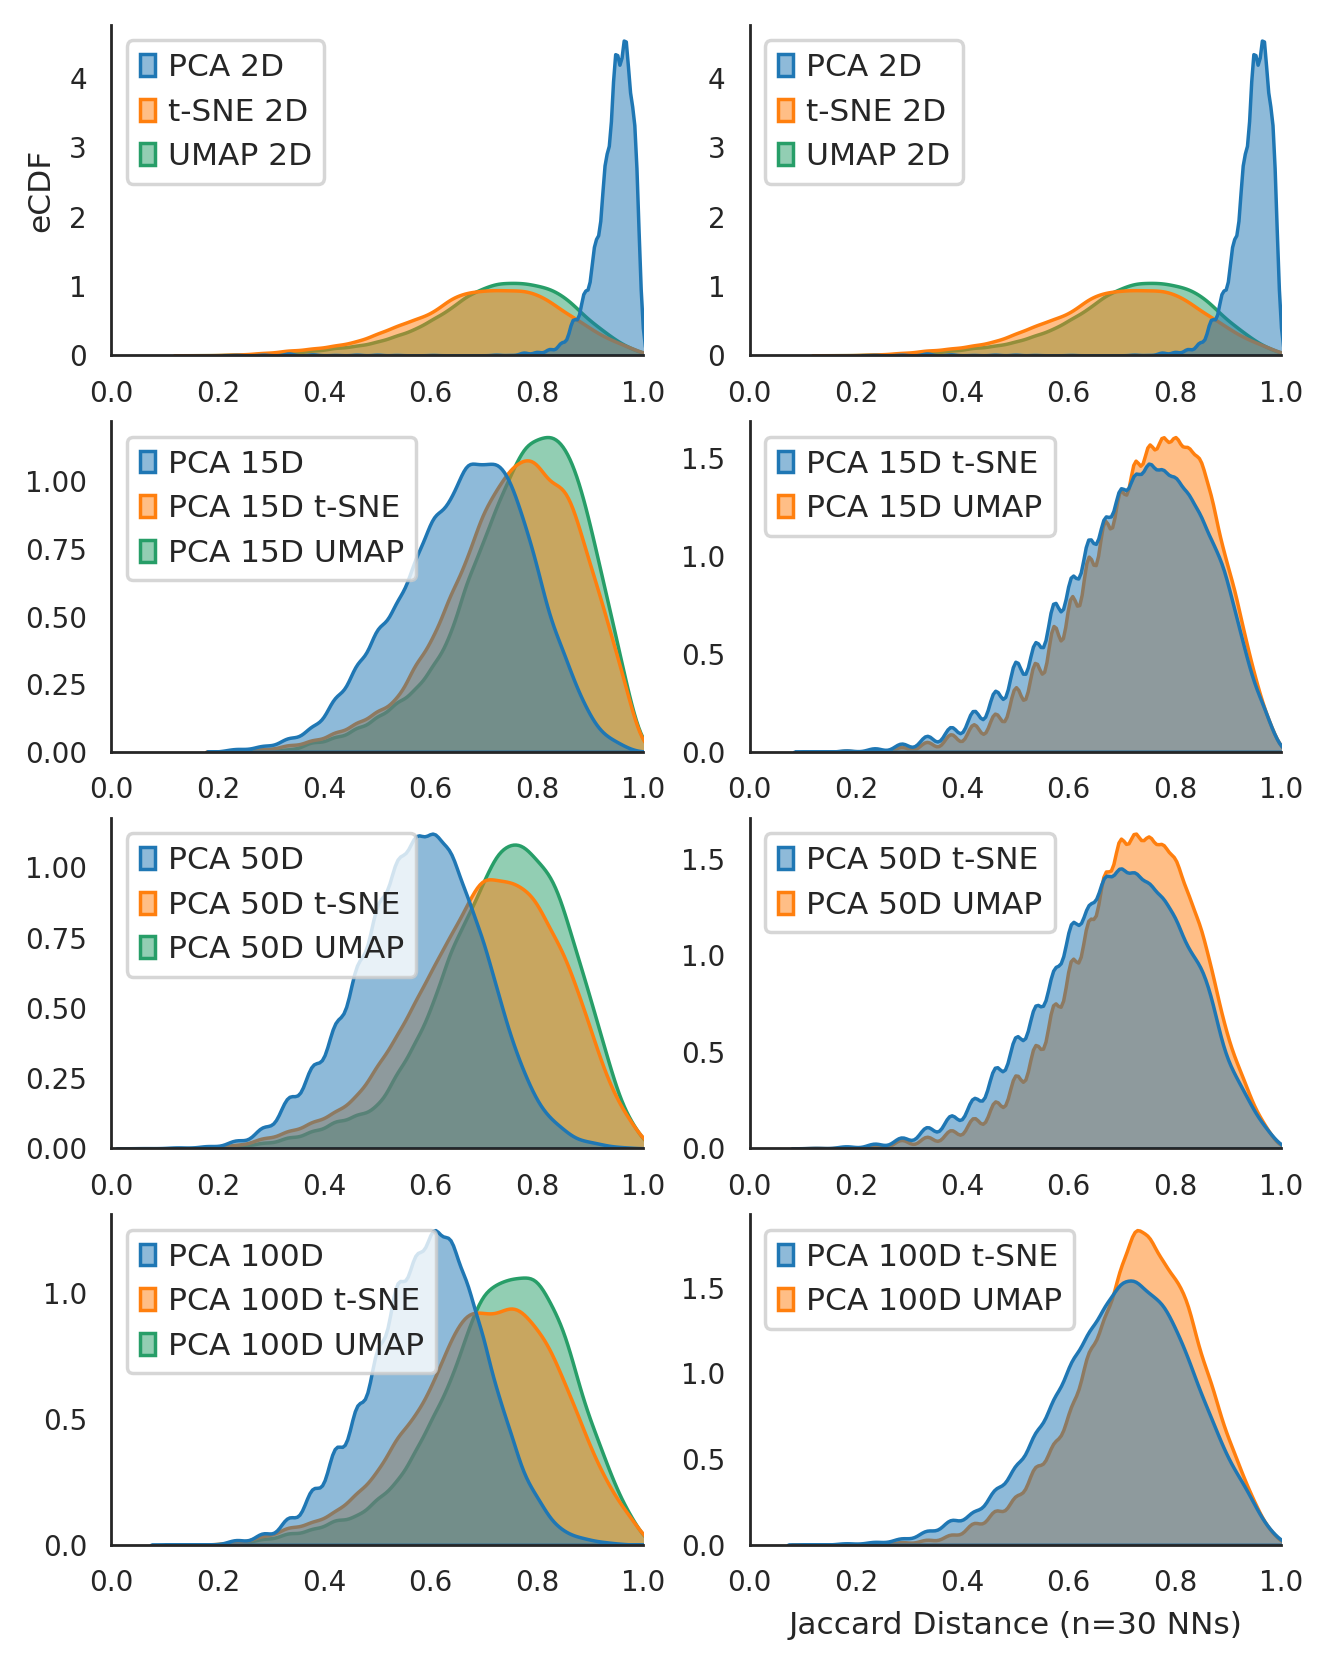

In [20]:
plotAmb(smartAmb[~smartAmb.latent.isin(['Flower','Elephant'])],smartPCAAmb[~smartPCAAmb.latent.isin(['Flower','Elephant'])] ) 

In [ ]:
print(printAvgs(smartAmb))
print(printAvgs(smartPCAAmb))

{'Elephant': 0.967114160881738, 'Flower': 0.9497217201420651, 'PCA 100D': 0.5929367998004084, 'PCA 100D UMAP': 0.7298735712398234, 'PCA 100D t-SNE': 0.7007668694831052, 'PCA 15D': 0.6622100850444703, 'PCA 15D UMAP': 0.7700340393660681, 'PCA 15D t-SNE': 0.7523485730377257, 'PCA 2D': 0.9412209073735639, 'PCA 50D': 0.5782632106175883, 'PCA 50D UMAP': 0.7310704992242927, 'PCA 50D t-SNE': 0.7035615931731318, 'UMAP 2D': 0.727320169805289, 't-SNE 2D': 0.6999788351079331}
{'PCA 100D UMAP': 0.7255422976217395, 'PCA 100D t-SNE': 0.6954630816929293, 'PCA 15D UMAP': 0.7415082603285714, 'PCA 15D t-SNE': 0.7202359031292279, 'PCA 50D UMAP': 0.7152662111601585, 'PCA 50D t-SNE': 0.6861752614571319}


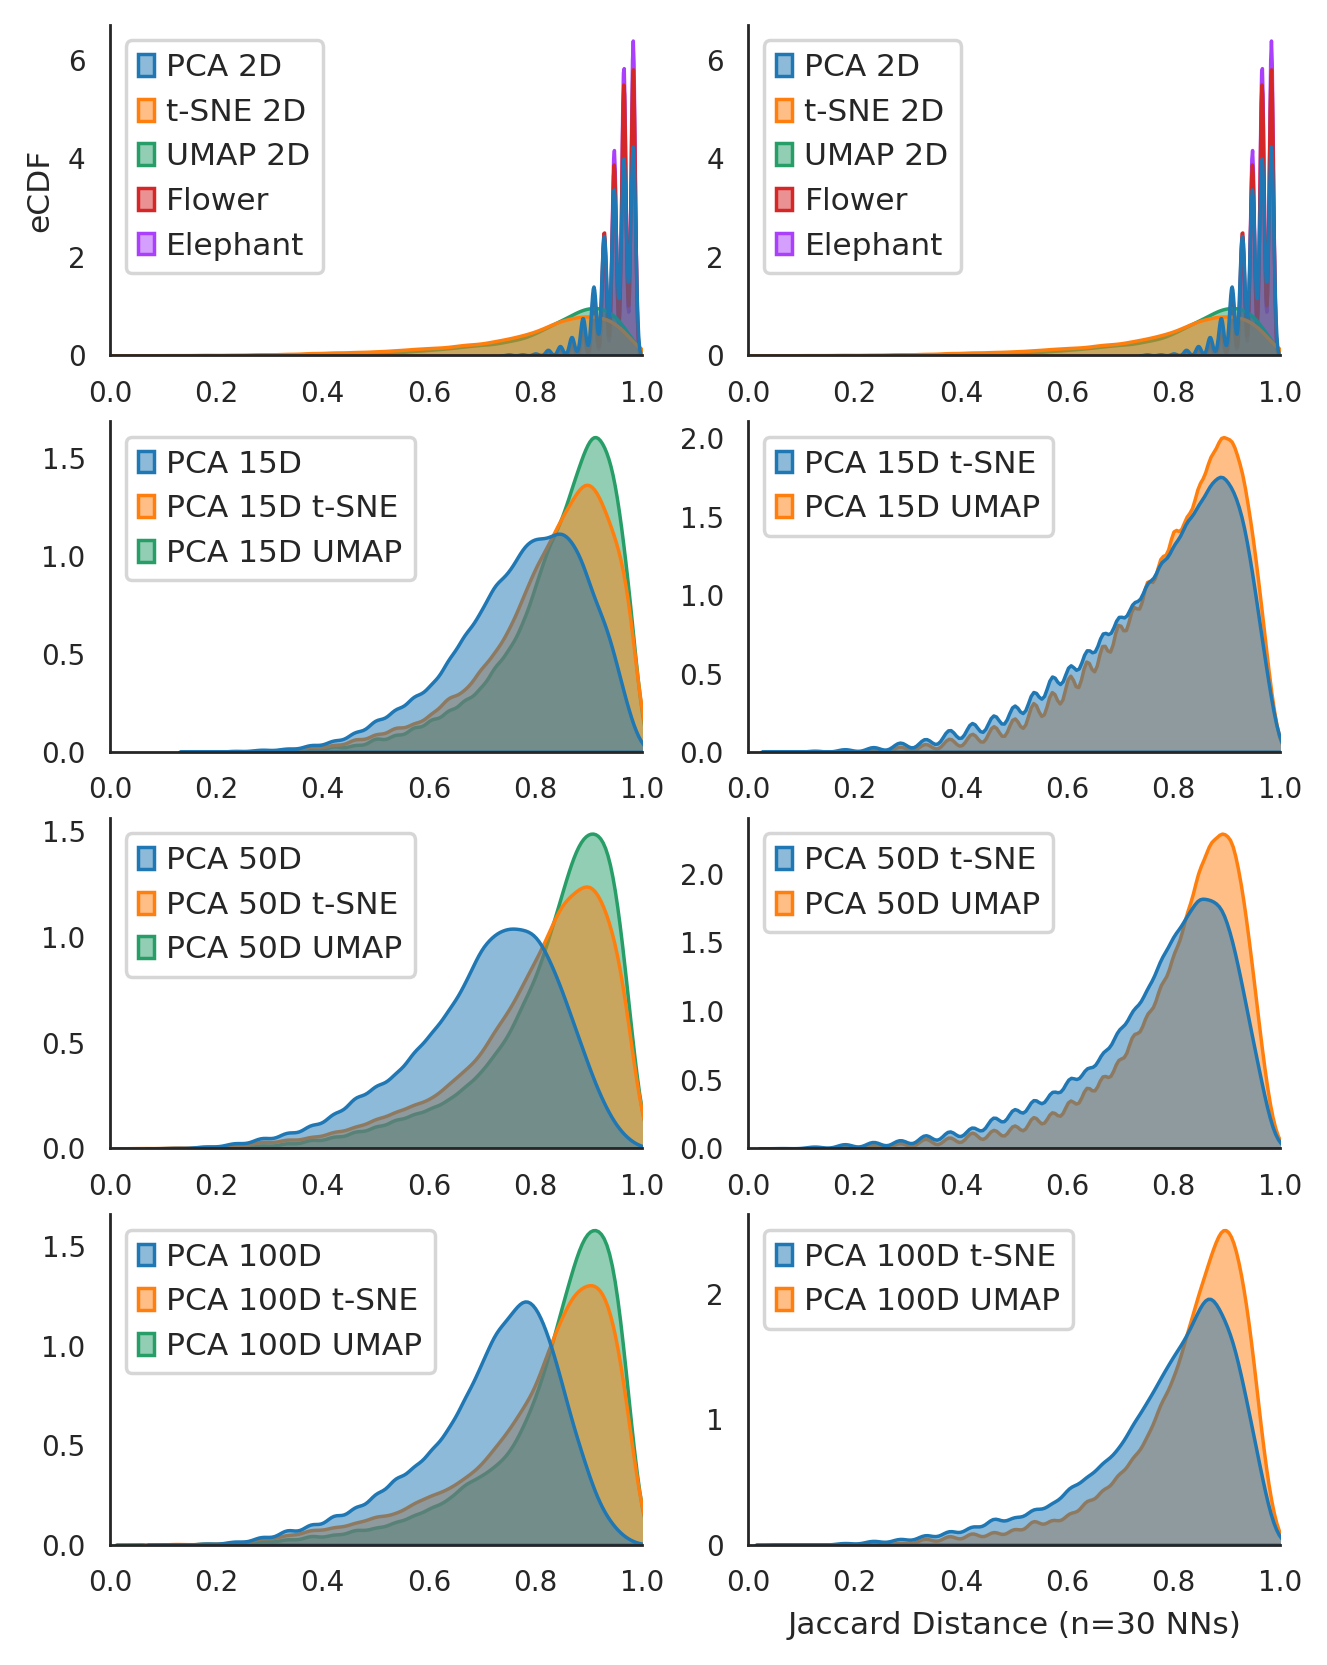

In [ ]:
#merfish data
plotAmb(merAmb,merPCAAmb)

In [ ]:
print(printAvgs(merAmb))
print(printAvgs(merPCAAmb))

{'Elephant': 0.9559041910952245, 'Flower': 0.9542132317046663, 'PCA 100D': 0.7111724239629912, 'PCA 100D UMAP': 0.8281598063189761, 'PCA 100D t-SNE': 0.8014711015580581, 'PCA 15D': 0.7683518913215605, 'PCA 15D UMAP': 0.8414802650399155, 'PCA 15D t-SNE': 0.8228963221338833, 'PCA 2D': 0.9477493024445052, 'PCA 50D': 0.7012991017237619, 'PCA 50D UMAP': 0.8233743183320963, 'PCA 50D t-SNE': 0.7980189175260284, 'UMAP 2D': 0.8276923336140246, 't-SNE 2D': 0.8025145530277004}
{'PCA 100D UMAP': 0.821126771674439, 'PCA 100D t-SNE': 0.7770925222050094, 'PCA 15D UMAP': 0.7984137476526347, 'PCA 15D t-SNE': 0.7733763424104148, 'PCA 50D UMAP': 0.8076987671806775, 'PCA 50D t-SNE': 0.7670194047181272}


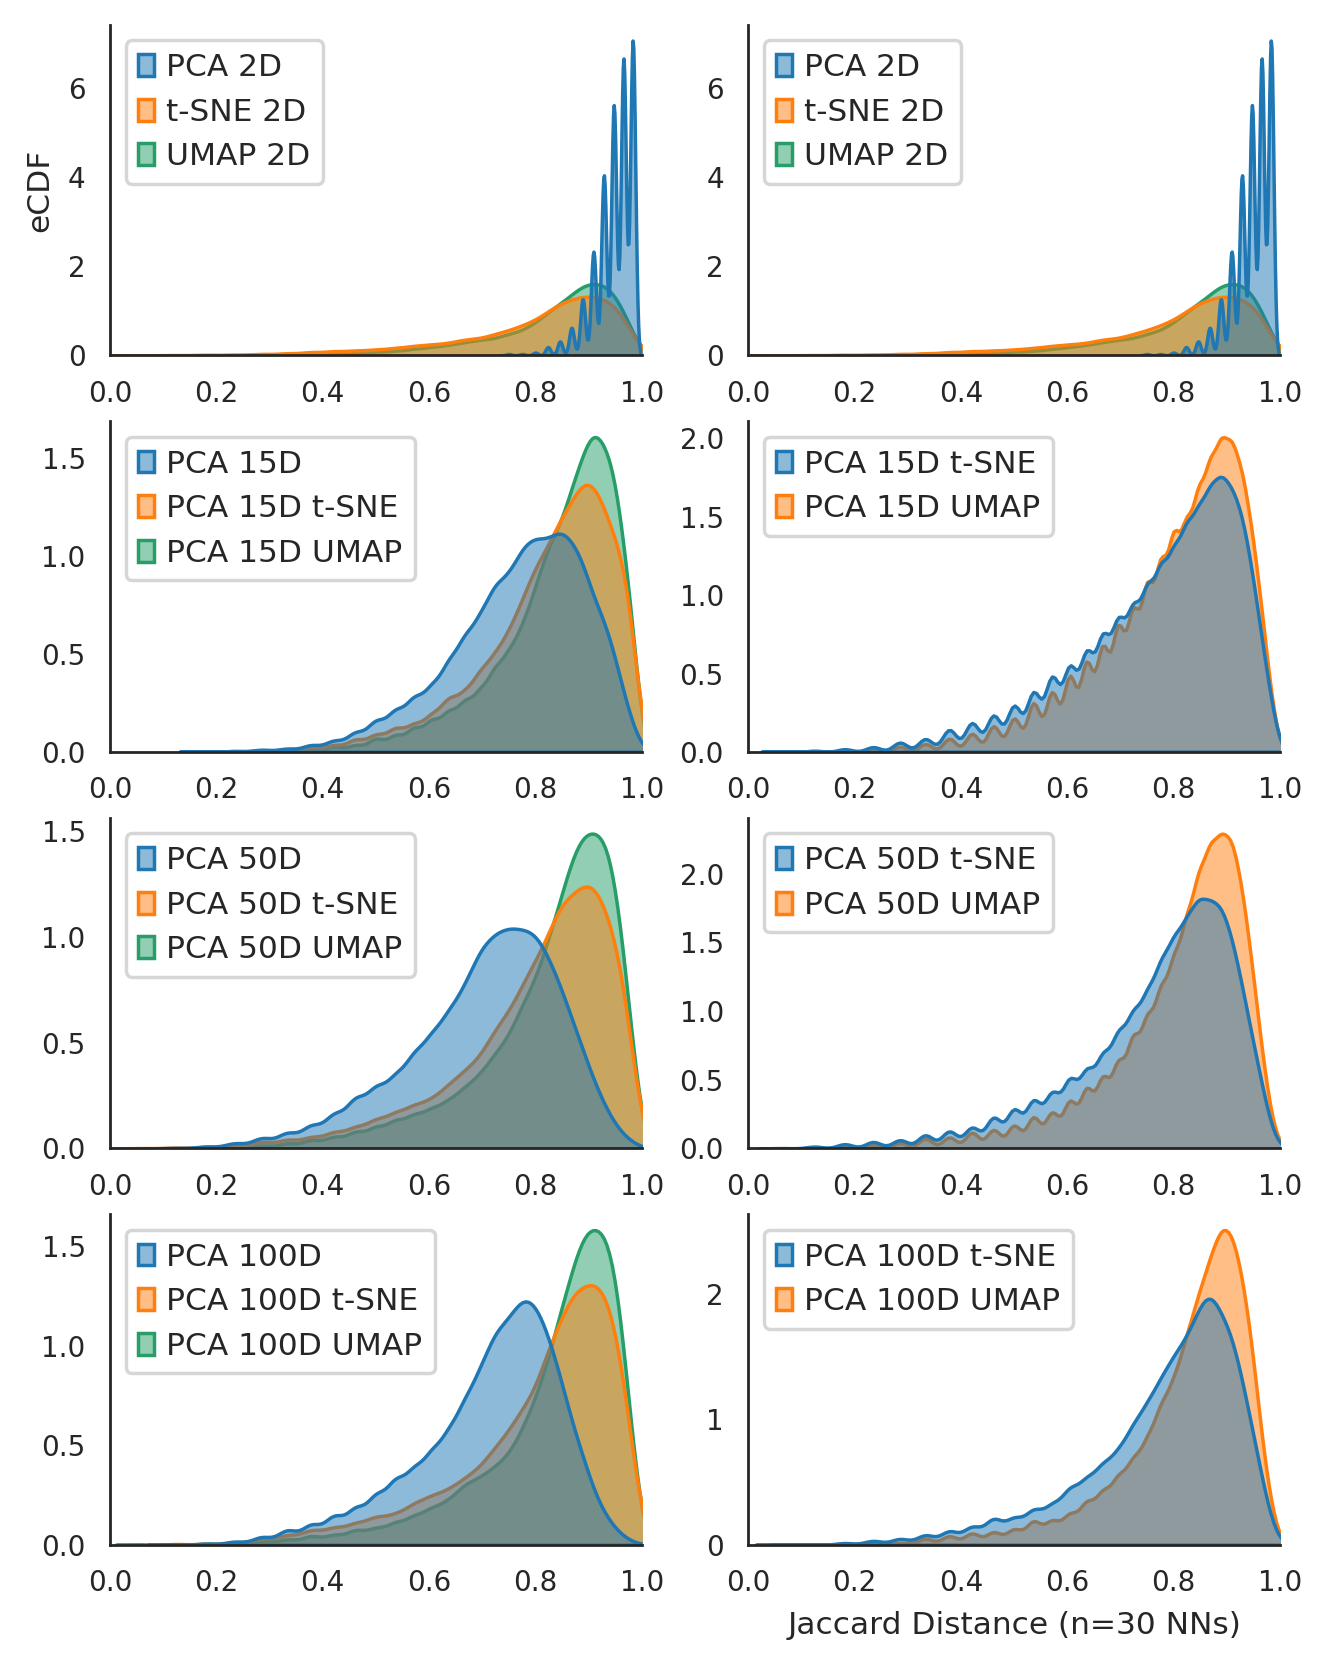

In [22]:
plotAmb(merAmb[~merAmb.latent.isin(['Flower','Elephant'])],merPCAAmb[~merPCAAmb.latent.isin(['Flower','Elephant'])] ) 

### **Prediction**

In [ ]:
smartPreds = pd.read_csv(data_path+'/allSmartSeqPreds_22.csv')
#netAEpreds = pd.read_csv(data_path+'/netAESmartSeqPreds.csv')
tenxpreds = pd.read_csv(data_path+'/all10XPreds_22.csv')
matlaspreds = pd.read_csv(data_path+'/allLaMannoPreds_22.csv')

tenxpreds.head()

Unnamed: 0  Accuracy   Embed      Label
0           0  0.794132   LDVAE  CellType1
1           1  0.791727   LDVAE  CellType1
2           2  0.791406   LDVAE  CellType1
3           3  0.791727  SCANVI  CellType1
4           4  0.797739  SCANVI  CellType1

In [ ]:
matlaspreds.head()

Unnamed: 0  Accuracy     Embed
0           0  0.504986   PCA 50D
1           1  0.504264   PCA 50D
2           2  0.504721   PCA 50D
3           3  0.537546  PCA 100D
4           4  0.539339  PCA 100D

In [ ]:
allPreds = pd.concat([smartPreds, tenxpreds,matlaspreds])

In [ ]:
dataset = ['SmartSeq Mouse VMH Neurons']*(len(smartPreds)) + ['10X Mouse VMH Neurons']*len(tenxpreds) + ['10X Developing Mouse Brain']*len(matlaspreds)
allPreds['Dataset'] = dataset

In [ ]:
subAllPreds = allPreds[~allPreds.Label.isin(['CellType2','Gender2'])]
subAllPreds = subAllPreds[~(subAllPreds.Embed == 'NCA 100% MCML')]

In [ ]:
subAllPreds['Embed'] = [i.replace('NCA-Recon MCML','Cell Type MCML 50D') for i in subAllPreds['Embed']]
subAllPreds['Embed'] = [i.replace('Recon MCML','Recon MCML 50D') for i in subAllPreds['Embed']]

In [ ]:
subAllPreds['Embed'] = [i.replace('PCA UMAP','PCA 50D UMAP') for i in subAllPreds['Embed']]
subAllPreds['Embed'] = [i.replace('PCA t-SNE','PCA 50D t-SNE') for i in subAllPreds['Embed']]
subAllPreds['Embed'] = [i.replace('PCA UMAP Sup.','PCA 50D UMAP Sup.') for i in subAllPreds['Embed']]

In [ ]:
subAllPreds['Dataset'] = [i.replace('SmartSeq Mouse VMH Neurons','SMART-seq Mouse VMH Neurons\n(3,850 cells)') for i in subAllPreds['Dataset']] 
subAllPreds['Dataset'] = [i.replace('10X Mouse VMH Neurons','10x Mouse VMH Neurons\n(41,580 cells)') for i in subAllPreds['Dataset']] 
subAllPreds['Dataset'] = [i.replace('10X Developing Mouse Brain','10x Developing Mouse Brain\n(292,495 cells)') for i in subAllPreds['Dataset']]

In [ ]:
subAllPreds = subAllPreds[~(subAllPreds.Embed.isin(['NCA 100% MCML','Cell Type MCML 50D','Recon MCML 50D','LDVAE','SCANVI']))]

In [ ]:
axisFontSize = 9
tickFontSize = 7
errwidth=1
figsize =(7,3)
dodge=0.4

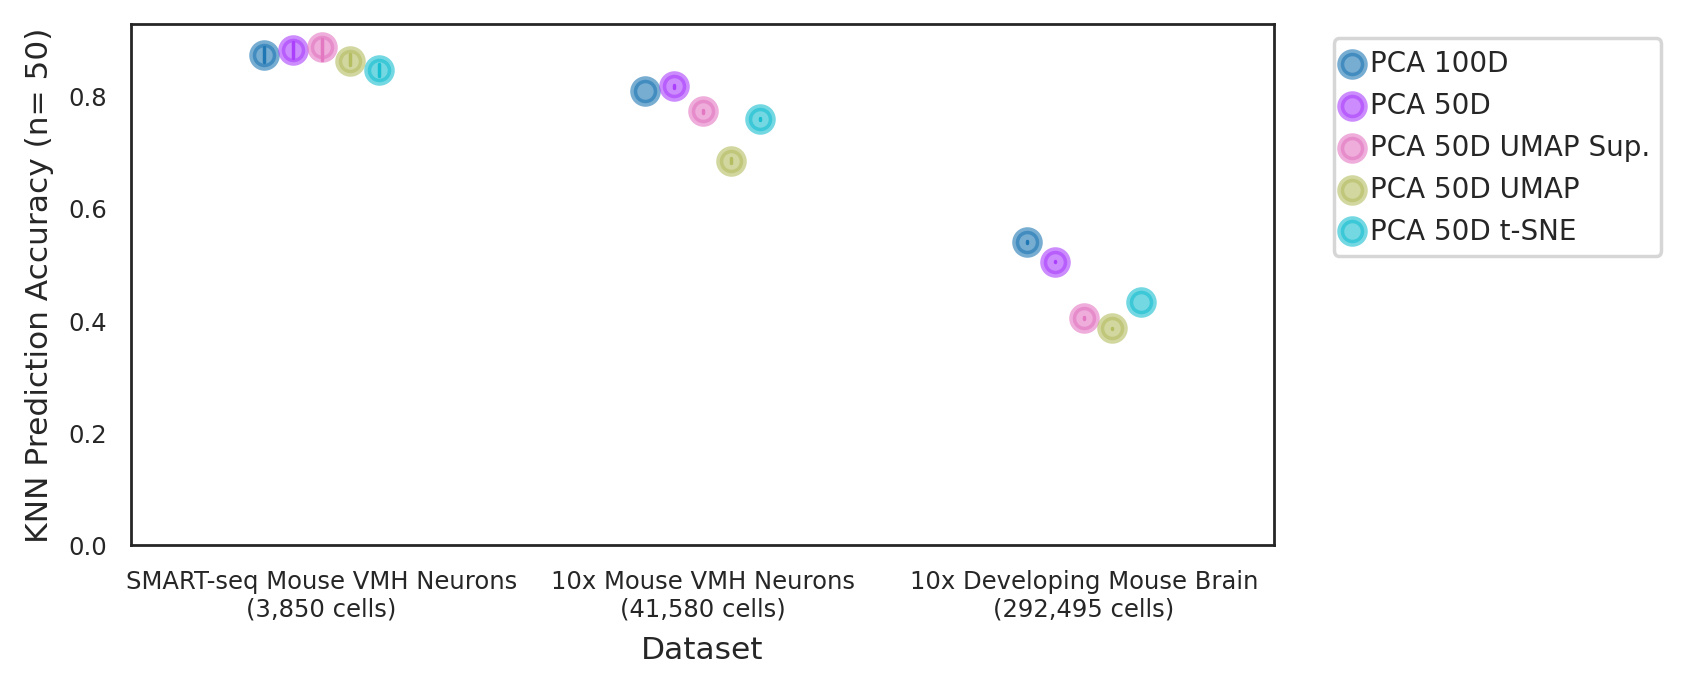

In [ ]:
#Maybe add number of cells below
palette={"PCA 100D":sns.color_palette()[0],"SCANVI":sns.color_palette()[1],
                  "Recon MCML 50D":sns.color_palette()[2],"Cell Type MCML 50D":sns.color_palette()[3],"PCA 50D":sns.color_palette()[4],"netAE":sns.color_palette()[5],
                  "PCA 50D UMAP Sup.":sns.color_palette()[6],"PCA 50D UMAP":sns.color_palette()[7],
                  "PCA 50D t-SNE":sns.color_palette()[8]}

plt.figure(figsize=figsize)
hue_order=['PCA 100D','PCA 50D','PCA 50D UMAP Sup.','PCA 50D UMAP','PCA 50D t-SNE']
g=sns.pointplot(x='Dataset', y='Accuracy', data=subAllPreds, hue='Embed',palette= palette,hue_order=hue_order, err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=errwidth, dodge=0.3)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":8})

plt.ylim(ymin=0)

plt.xlabel("Dataset",fontsize=axisFontSize)
plt.ylabel("KNN Prediction Accuracy (n= 50)",fontsize=axisFontSize)
plt.xticks(fontsize=tickFontSize)
plt.yticks(fontsize=tickFontSize)
plt.tight_layout()
plt.show()

In [ ]:
mcmlPreds = pd.read_csv(data_path+'/all10XPreds_mcml.csv')

In [ ]:
mcmlPreds.head()

Unnamed: 0  Accuracy      Embed      Label
0           0  0.384680  LDVAE 50D  Condition
1           1  0.390813  LDVAE 50D  Condition
2           2  0.388528  LDVAE 50D  Condition
3           3  0.927369  LDVAE 50D        Sex
4           4  0.924122  LDVAE 50D        Sex

In [ ]:
axisFontSize = 9
tickFontSize = 7
errwidth=1
figsize =(6,3)
dodge=0.4

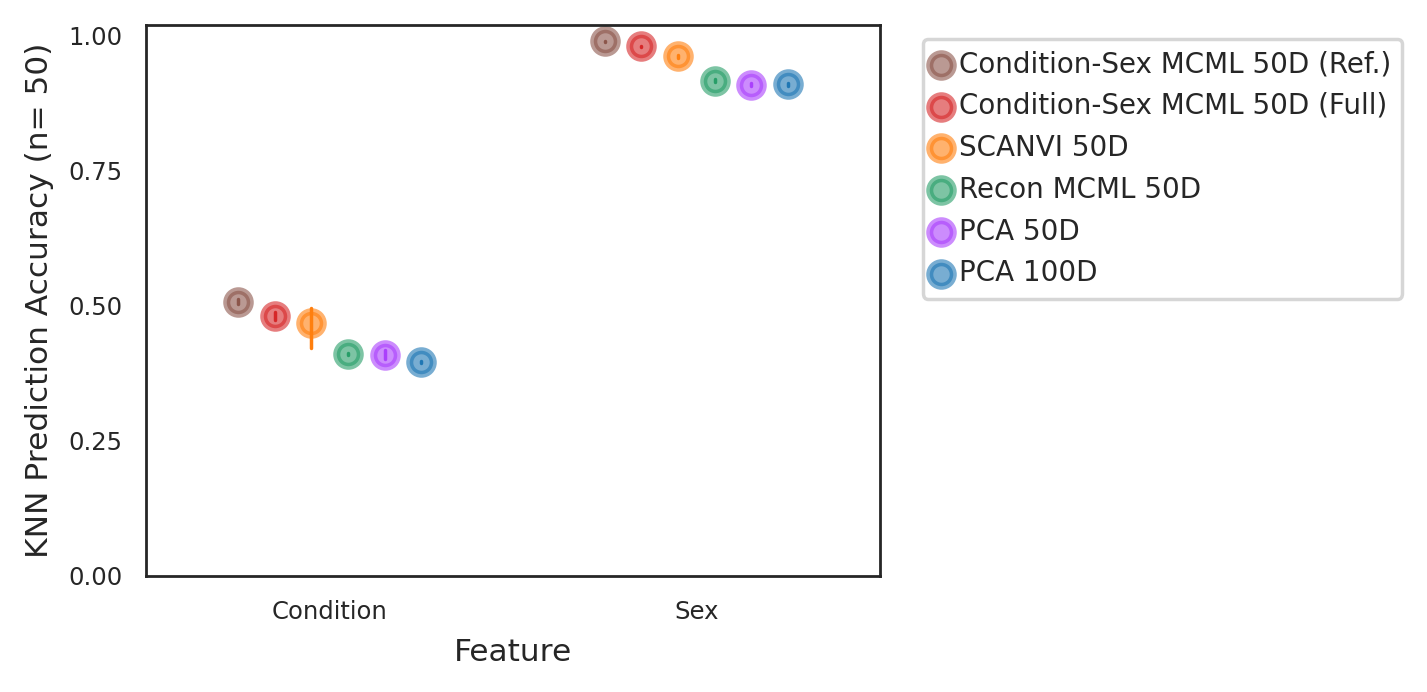

In [ ]:
#Maybe add number of cells below
palette={"PCA 100D":sns.color_palette()[0],"SCANVI 50D":sns.color_palette()[1],
                  "Recon MCML 50D":sns.color_palette()[2],"Condition-Sex MCML 50D (Full)":sns.color_palette()[3],"PCA 50D":sns.color_palette()[4],"Condition-Sex MCML 50D (Ref.)":sns.color_palette()[5],
                  "LDVAE 50D":sns.color_palette()[6],"PCA 50D UMAP":sns.color_palette()[7],
                  "PCA 50D t-SNE":sns.color_palette()[8]}

plt.figure(figsize=figsize)
hue_order=["Condition-Sex MCML 50D (Ref.)","Condition-Sex MCML 50D (Full)","SCANVI 50D","Recon MCML 50D","PCA 50D","PCA 100D"] #hue_order=hue_order
g=sns.pointplot(x='Label', y='Accuracy', data=mcmlPreds, hue='Embed',palette=palette, hue_order=hue_order,err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=errwidth, dodge=0.5)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":8})

plt.ylim(ymin=0)

plt.xlabel("Feature",fontsize=axisFontSize)
plt.ylabel("KNN Prediction Accuracy (n= 50)",fontsize=axisFontSize)
plt.xticks(fontsize=tickFontSize)
plt.yticks(fontsize=tickFontSize)
plt.tight_layout()
plt.show()

In [ ]:
cond = mcmlPreds[mcmlPreds['Label'].isin(['Condition'])]

In [ ]:
ref = cond[cond['Embed'].isin(['Condition-Sex MCML 50D (Ref.)'])]
scanvi = cond[cond['Embed'].isin(['SCANVI 50D'])]

In [ ]:
(np.mean(ref['Accuracy'])-np.mean(scanvi['Accuracy']))/np.mean(scanvi['Accuracy'])

0.08070175438596507

In [ ]:
sex = mcmlPreds[mcmlPreds['Label'].isin(['Sex'])]

In [ ]:
ref = sex[sex['Embed'].isin(['Condition-Sex MCML 50D (Ref.)'])]
scanvi = sex[sex['Embed'].isin(['SCANVI 50D'])]

In [ ]:
(np.mean(ref['Accuracy'])-np.mean(scanvi['Accuracy']))/np.mean(scanvi['Accuracy'])

0.028665609613619282